In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [5]:
df=pd.read_csv('car_prediction_data.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
todays_date=date.today()
todays_date
todays_date.year

2021

In [14]:
final_dataset['Current_Year']=todays_date.year

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [16]:
final_dataset['no_year']=final_dataset['Current_Year']- final_dataset['Year']

In [17]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [18]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [20]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [21]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [22]:
final_dataset=final_dataset.drop(['Current_Year'],axis=1)

In [23]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [24]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [25]:
import seaborn as sns

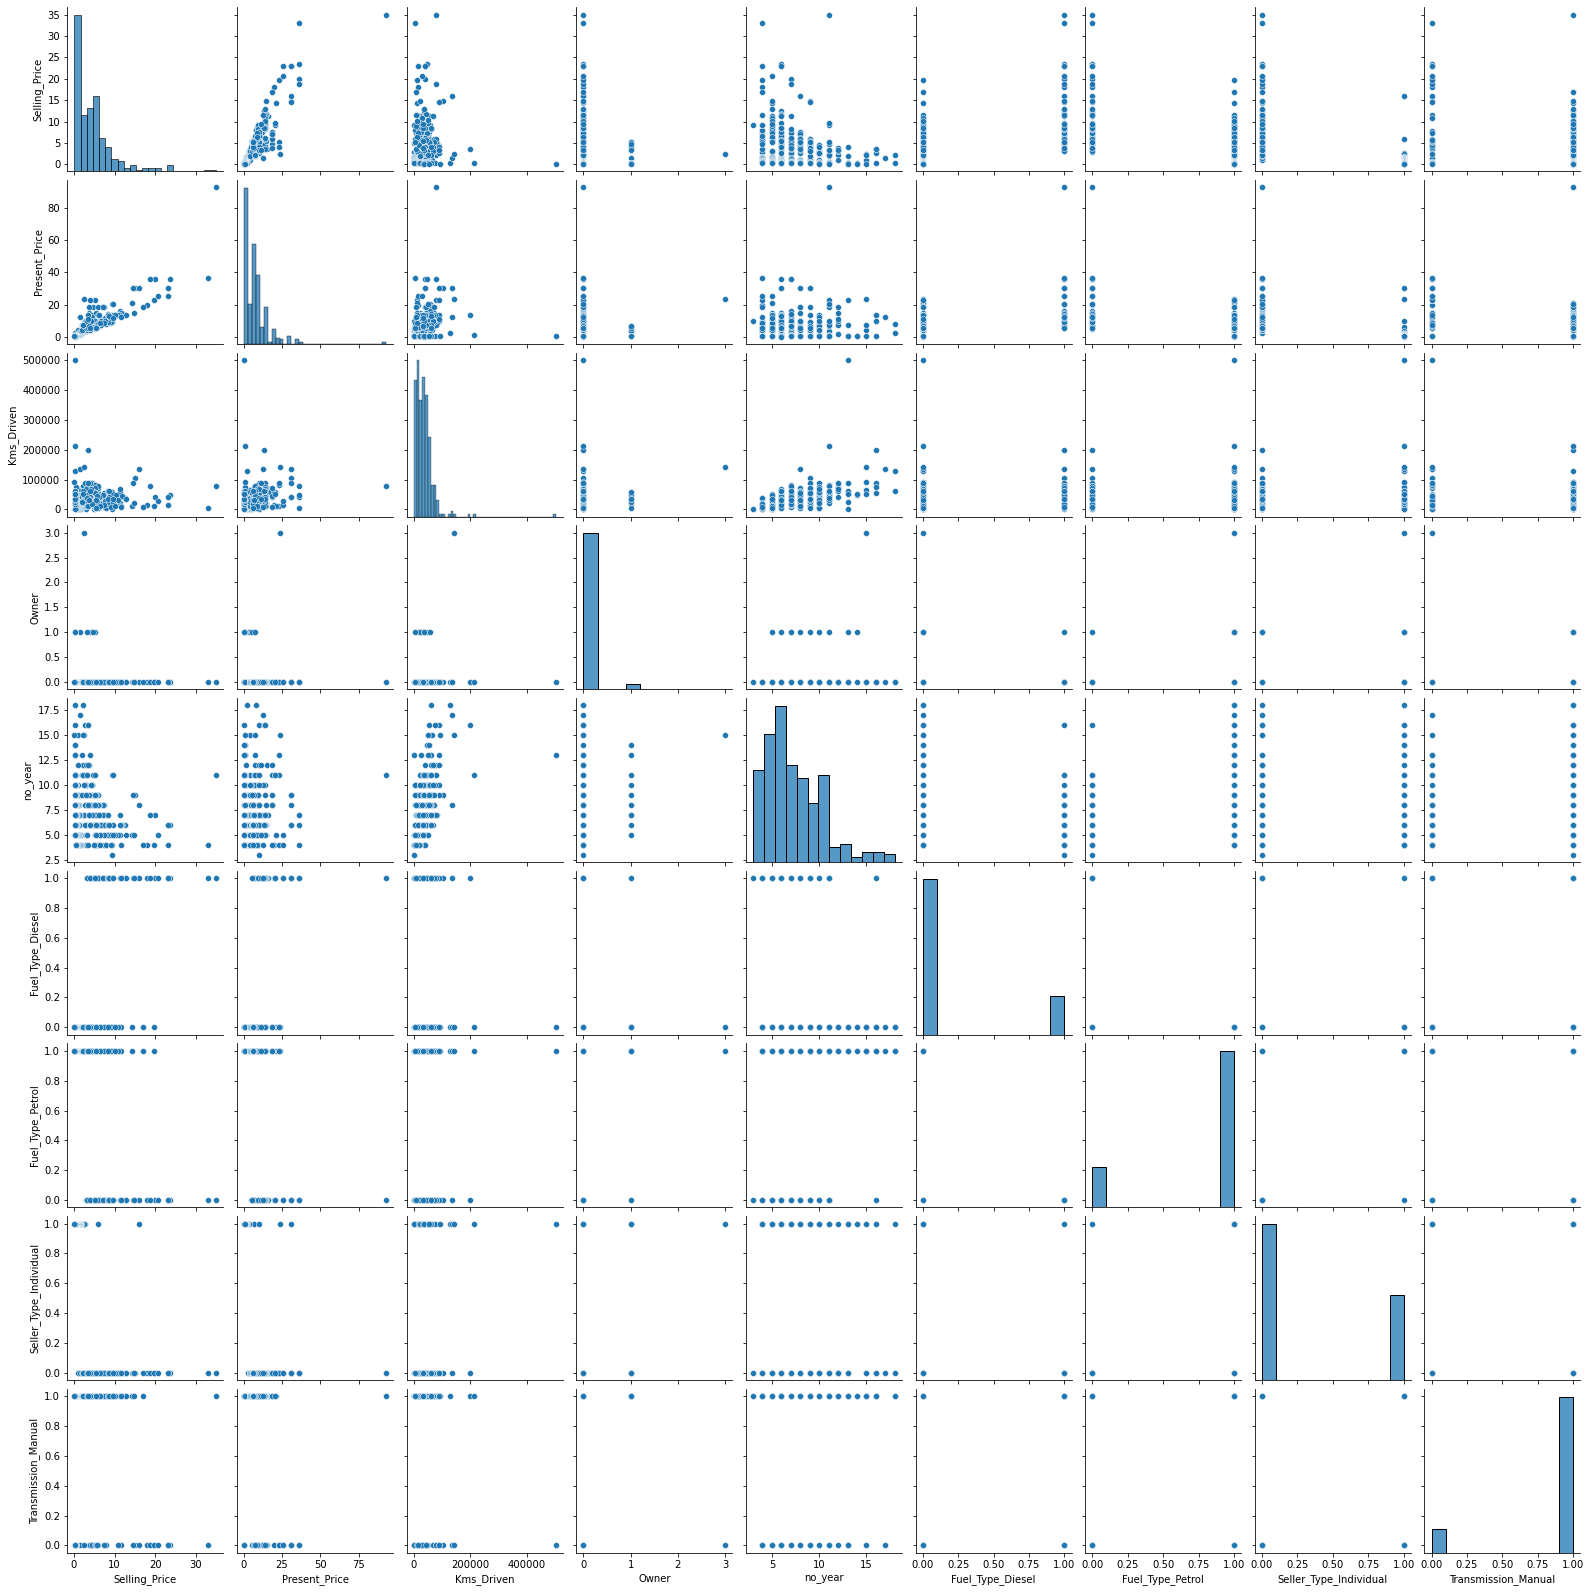

In [26]:
sns.pairplot(final_dataset)

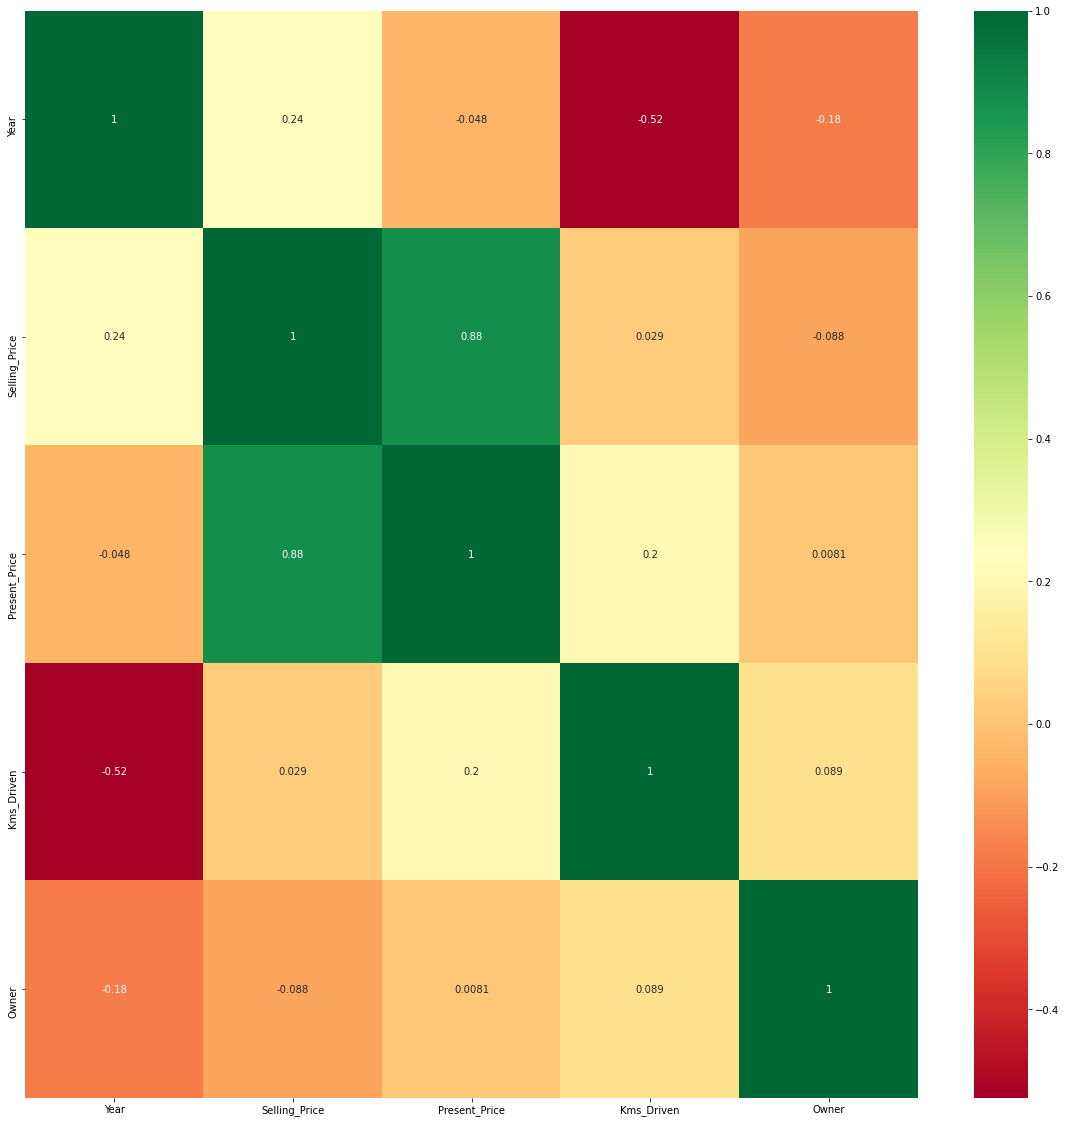

In [27]:
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [31]:
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [34]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [35]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Feature Importance

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [37]:
print(model.feature_importances_)

[0.37184907 0.04293075 0.00077852 0.0753045  0.23410008 0.01188287
 0.1287732  0.13438101]


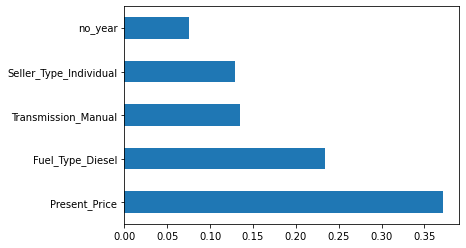

In [38]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Using Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
regressor=RandomForestRegressor()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
 #Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [44]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
rf = RandomForestRegressor()

In [46]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [47]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [49]:
rf.best_score_

-4.015261431820438

In [50]:
predictions=rf.predict(X_test)

C:\Users\Shaddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

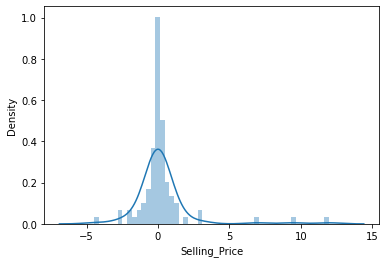

In [51]:
sns.distplot(y_test-predictions)

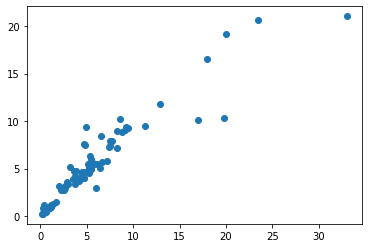

In [52]:
plt.scatter(y_test,predictions)

In [53]:
from sklearn import metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.901356263736266
MSE: 4.046075746463744
RMSE: 2.0114859548263677


## Using XGBoost Regressor

In [56]:
!pip install xgboost
import xgboost as xgb
from scipy.stats import uniform, randint

In [57]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [58]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [59]:
xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [60]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[10:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[10:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[10:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[10:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=

[CV]  gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556, total=   0.1s
[CV] gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216 
[10:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216, total=   0.1s
[CV] gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216 
[10:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsa

[CV]  gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873, total=   0.0s
[CV] gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873 
[10:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873, total=   0.0s
[CV] gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873 
[10:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsa

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.9s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018434DF7E80>,
                                        'max_depth': <sci

In [61]:
xgb.best_score_

-2.583737926844992

In [62]:
xgb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 3,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [63]:
predictions=xgb.predict(X_test)

C:\Users\Shaddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

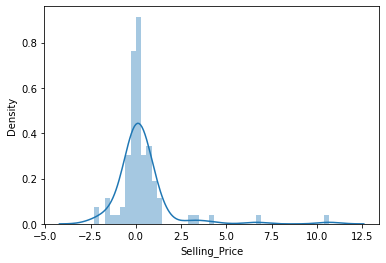

In [64]:
sns.distplot(y_test-predictions)

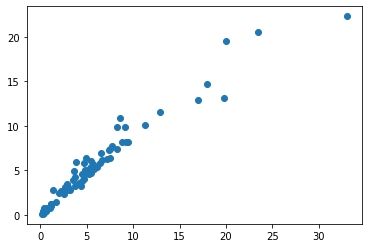

In [57]:
plt.scatter(y_test,predictions)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7469348757378347
MSE: 2.568463396783795
RMSE: 1.6026426291546707


## Using Catboost Regresssor

In [69]:
from catboost import CatBoostRegressor

In [68]:
!pip install catboost

In [70]:
cb=CatBoostRegressor()

In [71]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [72]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [73]:
cb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=10 ......................
0:	learn: 4.9398622	total: 139ms	remaining: 2m 19s
1:	learn: 4.7805986	total: 149ms	remaining: 1m 14s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2:	learn: 4.5730251	total: 156ms	remaining: 51.9s
3:	learn: 4.4161829	total: 160ms	remaining: 39.9s
4:	learn: 4.2856056	total: 171ms	remaining: 34.1s
5:	learn: 4.1268798	total: 173ms	remaining: 28.6s
6:	learn: 3.9895888	total: 175ms	remaining: 24.8s
7:	learn: 3.8391546	total: 178ms	remaining: 22.1s
8:	learn: 3.7310291	total: 189ms	remaining: 20.8s
9:	learn: 3.6173828	total: 190ms	remaining: 18.8s
10:	learn: 3.4712492	total: 191ms	remaining: 17.2s
11:	learn: 3.3483253	total: 193ms	remaining: 15.9s
12:	learn: 3.2450271	total: 198ms	remaining: 15.1s
13:	learn: 3.1400164	total: 199ms	remaining: 14s
14:	learn: 3.0260343	total: 200ms	remaining: 13.1s
15:	learn: 2.9346526	total: 201ms	remaining: 12.4s
16:	learn: 2.8376114	total: 210ms	remaining: 12.1s
17:	learn: 2.7572800	total: 211ms	remaining: 11.5s
18:	learn: 2.6724960	total: 221ms	remaining: 11.4s
19:	learn: 2.6150300	total: 231ms	remaining: 11.3s
20:	learn: 2.5479388	total: 234ms	remaining: 10.9s
21:	learn: 2.4920401	total: 237ms	remaini

166:	learn: 0.5467338	total: 1.12s	remaining: 5.58s
167:	learn: 0.5391360	total: 1.13s	remaining: 5.58s
168:	learn: 0.5317713	total: 1.13s	remaining: 5.58s
169:	learn: 0.5249970	total: 1.14s	remaining: 5.58s
170:	learn: 0.5189295	total: 1.15s	remaining: 5.57s
171:	learn: 0.5153785	total: 1.16s	remaining: 5.57s
172:	learn: 0.5085283	total: 1.16s	remaining: 5.57s
173:	learn: 0.5045853	total: 1.17s	remaining: 5.57s
174:	learn: 0.5017860	total: 1.18s	remaining: 5.56s
175:	learn: 0.4984070	total: 1.19s	remaining: 5.57s
176:	learn: 0.4931573	total: 1.2s	remaining: 5.57s
177:	learn: 0.4864045	total: 1.21s	remaining: 5.57s
178:	learn: 0.4838580	total: 1.21s	remaining: 5.57s
179:	learn: 0.4789519	total: 1.22s	remaining: 5.57s
180:	learn: 0.4744396	total: 1.23s	remaining: 5.56s
181:	learn: 0.4683524	total: 1.24s	remaining: 5.56s
182:	learn: 0.4659290	total: 1.25s	remaining: 5.56s
183:	learn: 0.4635230	total: 1.25s	remaining: 5.56s
184:	learn: 0.4587105	total: 1.26s	remaining: 5.56s
185:	learn: 0

328:	learn: 0.2224358	total: 2.22s	remaining: 4.53s
329:	learn: 0.2203834	total: 2.23s	remaining: 4.52s
330:	learn: 0.2202279	total: 2.23s	remaining: 4.51s
331:	learn: 0.2200916	total: 2.23s	remaining: 4.49s
332:	learn: 0.2178787	total: 2.24s	remaining: 4.48s
333:	learn: 0.2177338	total: 2.24s	remaining: 4.47s
334:	learn: 0.2158892	total: 2.25s	remaining: 4.46s
335:	learn: 0.2157404	total: 2.25s	remaining: 4.45s
336:	learn: 0.2156311	total: 2.26s	remaining: 4.45s
337:	learn: 0.2137604	total: 2.27s	remaining: 4.44s
338:	learn: 0.2118700	total: 2.27s	remaining: 4.43s
339:	learn: 0.2110620	total: 2.28s	remaining: 4.43s
340:	learn: 0.2109263	total: 2.28s	remaining: 4.41s
341:	learn: 0.2108140	total: 2.29s	remaining: 4.41s
342:	learn: 0.2102765	total: 2.3s	remaining: 4.4s
343:	learn: 0.2101721	total: 2.3s	remaining: 4.39s
344:	learn: 0.2078591	total: 2.31s	remaining: 4.39s
345:	learn: 0.2055664	total: 2.32s	remaining: 4.38s
346:	learn: 0.2034126	total: 2.33s	remaining: 4.38s
347:	learn: 0.2

494:	learn: 0.1082297	total: 3.3s	remaining: 3.37s
495:	learn: 0.1081608	total: 3.31s	remaining: 3.36s
496:	learn: 0.1073432	total: 3.31s	remaining: 3.35s
497:	learn: 0.1072889	total: 3.32s	remaining: 3.35s
498:	learn: 0.1063585	total: 3.33s	remaining: 3.34s
499:	learn: 0.1060468	total: 3.33s	remaining: 3.33s
500:	learn: 0.1058091	total: 3.34s	remaining: 3.32s
501:	learn: 0.1057657	total: 3.34s	remaining: 3.32s
502:	learn: 0.1048395	total: 3.35s	remaining: 3.31s
503:	learn: 0.1047743	total: 3.36s	remaining: 3.3s
504:	learn: 0.1043626	total: 3.36s	remaining: 3.3s
505:	learn: 0.1040369	total: 3.37s	remaining: 3.29s
506:	learn: 0.1031328	total: 3.38s	remaining: 3.29s
507:	learn: 0.1026404	total: 3.39s	remaining: 3.28s
508:	learn: 0.1021714	total: 3.39s	remaining: 3.27s
509:	learn: 0.1018703	total: 3.4s	remaining: 3.27s
510:	learn: 0.1018222	total: 3.41s	remaining: 3.26s
511:	learn: 0.1017970	total: 3.41s	remaining: 3.25s
512:	learn: 0.1015646	total: 3.42s	remaining: 3.25s
513:	learn: 0.10

661:	learn: 0.0607103	total: 4.41s	remaining: 2.25s
662:	learn: 0.0605603	total: 4.42s	remaining: 2.25s
663:	learn: 0.0600851	total: 4.42s	remaining: 2.24s
664:	learn: 0.0597650	total: 4.43s	remaining: 2.23s
665:	learn: 0.0597277	total: 4.44s	remaining: 2.23s
666:	learn: 0.0593929	total: 4.45s	remaining: 2.22s
667:	learn: 0.0591960	total: 4.45s	remaining: 2.21s
668:	learn: 0.0590127	total: 4.46s	remaining: 2.21s
669:	learn: 0.0587395	total: 4.47s	remaining: 2.2s
670:	learn: 0.0584562	total: 4.47s	remaining: 2.19s
671:	learn: 0.0583385	total: 4.48s	remaining: 2.19s
672:	learn: 0.0581818	total: 4.49s	remaining: 2.18s
673:	learn: 0.0580008	total: 4.5s	remaining: 2.17s
674:	learn: 0.0577602	total: 4.5s	remaining: 2.17s
675:	learn: 0.0577206	total: 4.51s	remaining: 2.16s
676:	learn: 0.0577008	total: 4.52s	remaining: 2.15s
677:	learn: 0.0575039	total: 4.52s	remaining: 2.15s
678:	learn: 0.0573265	total: 4.53s	remaining: 2.14s
679:	learn: 0.0570712	total: 4.54s	remaining: 2.13s
680:	learn: 0.0

822:	learn: 0.0368511	total: 5.47s	remaining: 1.18s
823:	learn: 0.0367658	total: 5.47s	remaining: 1.17s
824:	learn: 0.0367228	total: 5.48s	remaining: 1.16s
825:	learn: 0.0364036	total: 5.49s	remaining: 1.16s
826:	learn: 0.0361686	total: 5.5s	remaining: 1.15s
827:	learn: 0.0360300	total: 5.5s	remaining: 1.14s
828:	learn: 0.0359359	total: 5.51s	remaining: 1.14s
829:	learn: 0.0358607	total: 5.51s	remaining: 1.13s
830:	learn: 0.0357438	total: 5.52s	remaining: 1.12s
831:	learn: 0.0355538	total: 5.53s	remaining: 1.12s
832:	learn: 0.0355125	total: 5.54s	remaining: 1.11s
833:	learn: 0.0353019	total: 5.54s	remaining: 1.1s
834:	learn: 0.0351427	total: 5.55s	remaining: 1.1s
835:	learn: 0.0350721	total: 5.56s	remaining: 1.09s
836:	learn: 0.0349256	total: 5.56s	remaining: 1.08s
837:	learn: 0.0347442	total: 5.57s	remaining: 1.08s
838:	learn: 0.0347291	total: 5.57s	remaining: 1.07s
839:	learn: 0.0347139	total: 5.58s	remaining: 1.06s
840:	learn: 0.0344552	total: 5.59s	remaining: 1.06s
841:	learn: 0.03

986:	learn: 0.0222686	total: 6.57s	remaining: 86.5ms
987:	learn: 0.0222240	total: 6.58s	remaining: 79.9ms
988:	learn: 0.0220633	total: 6.58s	remaining: 73.2ms
989:	learn: 0.0219748	total: 6.59s	remaining: 66.6ms
990:	learn: 0.0219603	total: 6.6s	remaining: 59.9ms
991:	learn: 0.0218716	total: 6.6s	remaining: 53.3ms
992:	learn: 0.0218636	total: 6.61s	remaining: 46.6ms
993:	learn: 0.0217997	total: 6.62s	remaining: 39.9ms
994:	learn: 0.0216698	total: 6.63s	remaining: 33.3ms
995:	learn: 0.0216467	total: 6.63s	remaining: 26.6ms
996:	learn: 0.0215787	total: 6.64s	remaining: 20ms
997:	learn: 0.0215650	total: 6.64s	remaining: 13.3ms
998:	learn: 0.0213741	total: 6.65s	remaining: 6.66ms
999:	learn: 0.0212581	total: 6.66s	remaining: 0us
[CV] ....... learning_rate=0.1, l2_leaf_reg=7, depth=10, total=   7.5s
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=10 ......................
0:	learn: 4.0986498	total: 2.44ms	remaining: 2.44s
1:	learn: 3.8965109	total: 3.48ms	remaining: 1.74s
2:	learn: 3.7398303	t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


31:	learn: 1.4274622	total: 170ms	remaining: 5.14s
32:	learn: 1.3870419	total: 181ms	remaining: 5.3s
33:	learn: 1.3577771	total: 192ms	remaining: 5.44s
34:	learn: 1.3262386	total: 195ms	remaining: 5.38s
35:	learn: 1.3032825	total: 198ms	remaining: 5.31s
36:	learn: 1.2719983	total: 210ms	remaining: 5.46s
37:	learn: 1.2431705	total: 221ms	remaining: 5.59s
38:	learn: 1.2184299	total: 222ms	remaining: 5.48s
39:	learn: 1.1926575	total: 234ms	remaining: 5.61s
40:	learn: 1.1673424	total: 246ms	remaining: 5.76s
41:	learn: 1.1340000	total: 258ms	remaining: 5.88s
42:	learn: 1.1029510	total: 269ms	remaining: 6s
43:	learn: 1.0777582	total: 281ms	remaining: 6.09s
44:	learn: 1.0516787	total: 282ms	remaining: 5.98s
45:	learn: 1.0286715	total: 288ms	remaining: 5.97s
46:	learn: 1.0032586	total: 300ms	remaining: 6.07s
47:	learn: 0.9846294	total: 311ms	remaining: 6.18s
48:	learn: 0.9693835	total: 312ms	remaining: 6.06s
49:	learn: 0.9411448	total: 324ms	remaining: 6.15s
50:	learn: 0.9152934	total: 335ms	r

209:	learn: 0.1878774	total: 1.89s	remaining: 7.12s
210:	learn: 0.1872763	total: 1.9s	remaining: 7.11s
211:	learn: 0.1863154	total: 1.91s	remaining: 7.11s
212:	learn: 0.1855499	total: 1.92s	remaining: 7.11s
213:	learn: 0.1836749	total: 1.94s	remaining: 7.11s
214:	learn: 0.1831694	total: 1.95s	remaining: 7.11s
215:	learn: 0.1819250	total: 1.96s	remaining: 7.11s
216:	learn: 0.1804659	total: 1.97s	remaining: 7.1s
217:	learn: 0.1793340	total: 1.98s	remaining: 7.1s
218:	learn: 0.1781242	total: 1.99s	remaining: 7.1s
219:	learn: 0.1771279	total: 2s	remaining: 7.1s
220:	learn: 0.1760783	total: 2.01s	remaining: 7.09s
221:	learn: 0.1750958	total: 2.02s	remaining: 7.09s
222:	learn: 0.1742271	total: 2.03s	remaining: 7.09s
223:	learn: 0.1736016	total: 2.04s	remaining: 7.08s
224:	learn: 0.1727052	total: 2.06s	remaining: 7.08s
225:	learn: 0.1722717	total: 2.07s	remaining: 7.08s
226:	learn: 0.1707792	total: 2.08s	remaining: 7.08s
227:	learn: 0.1704011	total: 2.09s	remaining: 7.08s
228:	learn: 0.169292

384:	learn: 0.0864665	total: 3.39s	remaining: 5.41s
385:	learn: 0.0863981	total: 3.39s	remaining: 5.4s
386:	learn: 0.0860308	total: 3.4s	remaining: 5.39s
387:	learn: 0.0858508	total: 3.41s	remaining: 5.37s
388:	learn: 0.0852957	total: 3.41s	remaining: 5.36s
389:	learn: 0.0851293	total: 3.42s	remaining: 5.35s
390:	learn: 0.0848790	total: 3.43s	remaining: 5.34s
391:	learn: 0.0846114	total: 3.44s	remaining: 5.33s
392:	learn: 0.0845657	total: 3.44s	remaining: 5.32s
393:	learn: 0.0840867	total: 3.45s	remaining: 5.31s
394:	learn: 0.0835795	total: 3.46s	remaining: 5.3s
395:	learn: 0.0831604	total: 3.46s	remaining: 5.29s
396:	learn: 0.0826950	total: 3.47s	remaining: 5.27s
397:	learn: 0.0826487	total: 3.48s	remaining: 5.26s
398:	learn: 0.0821767	total: 3.49s	remaining: 5.25s
399:	learn: 0.0818425	total: 3.49s	remaining: 5.24s
400:	learn: 0.0813068	total: 3.5s	remaining: 5.23s
401:	learn: 0.0812445	total: 3.51s	remaining: 5.22s
402:	learn: 0.0809403	total: 3.51s	remaining: 5.21s
403:	learn: 0.08

559:	learn: 0.0488258	total: 4.67s	remaining: 3.67s
560:	learn: 0.0486541	total: 4.68s	remaining: 3.66s
561:	learn: 0.0484488	total: 4.68s	remaining: 3.65s
562:	learn: 0.0482244	total: 4.69s	remaining: 3.64s
563:	learn: 0.0480122	total: 4.7s	remaining: 3.63s
564:	learn: 0.0478787	total: 4.71s	remaining: 3.62s
565:	learn: 0.0477390	total: 4.71s	remaining: 3.61s
566:	learn: 0.0475589	total: 4.72s	remaining: 3.6s
567:	learn: 0.0474980	total: 4.73s	remaining: 3.6s
568:	learn: 0.0473258	total: 4.73s	remaining: 3.58s
569:	learn: 0.0472703	total: 4.74s	remaining: 3.58s
570:	learn: 0.0472058	total: 4.75s	remaining: 3.57s
571:	learn: 0.0470941	total: 4.75s	remaining: 3.56s
572:	learn: 0.0470631	total: 4.76s	remaining: 3.55s
573:	learn: 0.0470145	total: 4.77s	remaining: 3.54s
574:	learn: 0.0467063	total: 4.77s	remaining: 3.53s
575:	learn: 0.0466248	total: 4.78s	remaining: 3.52s
576:	learn: 0.0463781	total: 4.79s	remaining: 3.51s
577:	learn: 0.0461736	total: 4.79s	remaining: 3.5s
578:	learn: 0.04

740:	learn: 0.0295950	total: 5.76s	remaining: 2.01s
741:	learn: 0.0295171	total: 5.76s	remaining: 2s
742:	learn: 0.0294855	total: 5.77s	remaining: 2s
743:	learn: 0.0294408	total: 5.78s	remaining: 1.99s
744:	learn: 0.0294201	total: 5.78s	remaining: 1.98s
745:	learn: 0.0293459	total: 5.78s	remaining: 1.97s
746:	learn: 0.0293406	total: 5.79s	remaining: 1.96s
747:	learn: 0.0292507	total: 5.79s	remaining: 1.95s
748:	learn: 0.0290572	total: 5.8s	remaining: 1.94s
749:	learn: 0.0289881	total: 5.81s	remaining: 1.94s
750:	learn: 0.0289075	total: 5.81s	remaining: 1.93s
751:	learn: 0.0287933	total: 5.82s	remaining: 1.92s
752:	learn: 0.0287733	total: 5.82s	remaining: 1.91s
753:	learn: 0.0287112	total: 5.82s	remaining: 1.9s
754:	learn: 0.0285929	total: 5.83s	remaining: 1.89s
755:	learn: 0.0284302	total: 5.84s	remaining: 1.88s
756:	learn: 0.0283648	total: 5.84s	remaining: 1.88s
757:	learn: 0.0283049	total: 5.85s	remaining: 1.87s
758:	learn: 0.0282462	total: 5.85s	remaining: 1.86s
759:	learn: 0.028143

918:	learn: 0.0190231	total: 6.65s	remaining: 586ms
919:	learn: 0.0189474	total: 6.66s	remaining: 579ms
920:	learn: 0.0188957	total: 6.66s	remaining: 571ms
921:	learn: 0.0188104	total: 6.67s	remaining: 564ms
922:	learn: 0.0188033	total: 6.67s	remaining: 557ms
923:	learn: 0.0187663	total: 6.68s	remaining: 549ms
924:	learn: 0.0187526	total: 6.68s	remaining: 542ms
925:	learn: 0.0187045	total: 6.68s	remaining: 534ms
926:	learn: 0.0186090	total: 6.69s	remaining: 527ms
927:	learn: 0.0185495	total: 6.69s	remaining: 519ms
928:	learn: 0.0184759	total: 6.7s	remaining: 512ms
929:	learn: 0.0184401	total: 6.7s	remaining: 505ms
930:	learn: 0.0183233	total: 6.71s	remaining: 497ms
931:	learn: 0.0182565	total: 6.71s	remaining: 490ms
932:	learn: 0.0181980	total: 6.72s	remaining: 483ms
933:	learn: 0.0181825	total: 6.72s	remaining: 475ms
934:	learn: 0.0181694	total: 6.73s	remaining: 468ms
935:	learn: 0.0181322	total: 6.73s	remaining: 460ms
936:	learn: 0.0180557	total: 6.74s	remaining: 453ms
937:	learn: 0.

86:	learn: 1.2565809	total: 274ms	remaining: 2.88s
87:	learn: 1.2346020	total: 281ms	remaining: 2.91s
88:	learn: 1.2146904	total: 291ms	remaining: 2.97s
89:	learn: 1.2063440	total: 302ms	remaining: 3.05s
90:	learn: 1.2012123	total: 303ms	remaining: 3.02s
91:	learn: 1.1954878	total: 304ms	remaining: 3s
92:	learn: 1.1774990	total: 313ms	remaining: 3.05s
93:	learn: 1.1726017	total: 314ms	remaining: 3.03s
94:	learn: 1.1484861	total: 322ms	remaining: 3.06s
95:	learn: 1.1302749	total: 330ms	remaining: 3.11s
96:	learn: 1.1226547	total: 334ms	remaining: 3.1s
97:	learn: 1.1035171	total: 339ms	remaining: 3.12s
98:	learn: 1.0961369	total: 341ms	remaining: 3.11s
99:	learn: 1.0758629	total: 347ms	remaining: 3.12s
100:	learn: 1.0688600	total: 352ms	remaining: 3.13s
101:	learn: 1.0638103	total: 353ms	remaining: 3.1s
102:	learn: 1.0566549	total: 359ms	remaining: 3.13s
103:	learn: 1.0498780	total: 367ms	remaining: 3.16s
104:	learn: 1.0445434	total: 373ms	remaining: 3.18s
105:	learn: 1.0380059	total: 37

271:	learn: 0.2827633	total: 1.16s	remaining: 3.09s
272:	learn: 0.2789199	total: 1.16s	remaining: 3.09s
273:	learn: 0.2784896	total: 1.16s	remaining: 3.09s
274:	learn: 0.2778610	total: 1.17s	remaining: 3.09s
275:	learn: 0.2737502	total: 1.18s	remaining: 3.09s
276:	learn: 0.2733767	total: 1.18s	remaining: 3.08s
277:	learn: 0.2730431	total: 1.19s	remaining: 3.08s
278:	learn: 0.2727232	total: 1.19s	remaining: 3.08s
279:	learn: 0.2724004	total: 1.2s	remaining: 3.07s
280:	learn: 0.2721407	total: 1.2s	remaining: 3.06s
281:	learn: 0.2718323	total: 1.2s	remaining: 3.06s
282:	learn: 0.2715504	total: 1.21s	remaining: 3.06s
283:	learn: 0.2712181	total: 1.21s	remaining: 3.05s
284:	learn: 0.2706768	total: 1.22s	remaining: 3.05s
285:	learn: 0.2702431	total: 1.22s	remaining: 3.05s
286:	learn: 0.2659482	total: 1.23s	remaining: 3.05s
287:	learn: 0.2656635	total: 1.23s	remaining: 3.05s
288:	learn: 0.2625113	total: 1.24s	remaining: 3.04s
289:	learn: 0.2619853	total: 1.24s	remaining: 3.04s
290:	learn: 0.2

456:	learn: 0.1313149	total: 2.02s	remaining: 2.4s
457:	learn: 0.1302718	total: 2.03s	remaining: 2.4s
458:	learn: 0.1301153	total: 2.03s	remaining: 2.4s
459:	learn: 0.1298453	total: 2.04s	remaining: 2.39s
460:	learn: 0.1295497	total: 2.04s	remaining: 2.39s
461:	learn: 0.1285359	total: 2.05s	remaining: 2.38s
462:	learn: 0.1274306	total: 2.05s	remaining: 2.38s
463:	learn: 0.1263321	total: 2.06s	remaining: 2.38s
464:	learn: 0.1261641	total: 2.06s	remaining: 2.37s
465:	learn: 0.1255040	total: 2.07s	remaining: 2.37s
466:	learn: 0.1245785	total: 2.07s	remaining: 2.36s
467:	learn: 0.1241638	total: 2.08s	remaining: 2.36s
468:	learn: 0.1237865	total: 2.08s	remaining: 2.36s
469:	learn: 0.1234208	total: 2.09s	remaining: 2.35s
470:	learn: 0.1231700	total: 2.09s	remaining: 2.35s
471:	learn: 0.1222700	total: 2.1s	remaining: 2.35s
472:	learn: 0.1214929	total: 2.1s	remaining: 2.34s
473:	learn: 0.1205965	total: 2.11s	remaining: 2.34s
474:	learn: 0.1203547	total: 2.11s	remaining: 2.34s
475:	learn: 0.119

628:	learn: 0.0667680	total: 2.88s	remaining: 1.7s
629:	learn: 0.0667507	total: 2.88s	remaining: 1.69s
630:	learn: 0.0664586	total: 2.89s	remaining: 1.69s
631:	learn: 0.0662414	total: 2.89s	remaining: 1.68s
632:	learn: 0.0660174	total: 2.9s	remaining: 1.68s
633:	learn: 0.0657168	total: 2.9s	remaining: 1.68s
634:	learn: 0.0652025	total: 2.91s	remaining: 1.67s
635:	learn: 0.0649054	total: 2.92s	remaining: 1.67s
636:	learn: 0.0644371	total: 2.92s	remaining: 1.66s
637:	learn: 0.0639925	total: 2.93s	remaining: 1.66s
638:	learn: 0.0639806	total: 2.93s	remaining: 1.65s
639:	learn: 0.0636474	total: 2.93s	remaining: 1.65s
640:	learn: 0.0635312	total: 2.94s	remaining: 1.64s
641:	learn: 0.0632708	total: 2.94s	remaining: 1.64s
642:	learn: 0.0630016	total: 2.95s	remaining: 1.64s
643:	learn: 0.0628251	total: 2.95s	remaining: 1.63s
644:	learn: 0.0626336	total: 2.96s	remaining: 1.63s
645:	learn: 0.0625060	total: 2.96s	remaining: 1.62s
646:	learn: 0.0624186	total: 2.97s	remaining: 1.62s
647:	learn: 0.0

807:	learn: 0.0383592	total: 3.76s	remaining: 894ms
808:	learn: 0.0382061	total: 3.77s	remaining: 890ms
809:	learn: 0.0381049	total: 3.77s	remaining: 885ms
810:	learn: 0.0379876	total: 3.78s	remaining: 880ms
811:	learn: 0.0377740	total: 3.78s	remaining: 876ms
812:	learn: 0.0376026	total: 3.79s	remaining: 871ms
813:	learn: 0.0375047	total: 3.79s	remaining: 867ms
814:	learn: 0.0373565	total: 3.8s	remaining: 862ms
815:	learn: 0.0372802	total: 3.8s	remaining: 858ms
816:	learn: 0.0371935	total: 3.81s	remaining: 854ms
817:	learn: 0.0370997	total: 3.81s	remaining: 849ms
818:	learn: 0.0368846	total: 3.82s	remaining: 844ms
819:	learn: 0.0366856	total: 3.83s	remaining: 840ms
820:	learn: 0.0366230	total: 3.83s	remaining: 835ms
821:	learn: 0.0364409	total: 3.83s	remaining: 831ms
822:	learn: 0.0363366	total: 3.84s	remaining: 826ms
823:	learn: 0.0362255	total: 3.85s	remaining: 821ms
824:	learn: 0.0361114	total: 3.85s	remaining: 817ms
825:	learn: 0.0360508	total: 3.85s	remaining: 812ms
826:	learn: 0.

[CV] ....... learning_rate=0.1, l2_leaf_reg=7, depth=10, total=   5.5s
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=10 ......................
0:	learn: 4.7274012	total: 610us	remaining: 609ms
1:	learn: 4.5229055	total: 12.8ms	remaining: 6.38s
2:	learn: 4.3036445	total: 19.5ms	remaining: 6.47s
3:	learn: 4.1369695	total: 22.1ms	remaining: 5.5s
4:	learn: 4.0112291	total: 33.6ms	remaining: 6.69s
5:	learn: 3.8562118	total: 36.2ms	remaining: 5.99s
6:	learn: 3.6883768	total: 37.8ms	remaining: 5.37s
7:	learn: 3.5704367	total: 39.4ms	remaining: 4.89s
8:	learn: 3.4360771	total: 41.1ms	remaining: 4.53s
9:	learn: 3.2939082	total: 42.5ms	remaining: 4.21s
10:	learn: 3.2133997	total: 53.6ms	remaining: 4.82s
11:	learn: 3.1029637	total: 54.4ms	remaining: 4.48s
12:	learn: 3.0032570	total: 55.9ms	remaining: 4.24s
13:	learn: 2.8964699	total: 61.7ms	remaining: 4.34s
14:	learn: 2.8070695	total: 72.3ms	remaining: 4.75s
15:	learn: 2.7422581	total: 73.4ms	remaining: 4.52s
16:	learn: 2.6640391	total: 74.3ms	rem

162:	learn: 0.5734584	total: 859ms	remaining: 4.41s
163:	learn: 0.5706328	total: 869ms	remaining: 4.43s
164:	learn: 0.5684453	total: 873ms	remaining: 4.42s
165:	learn: 0.5589317	total: 883ms	remaining: 4.43s
166:	learn: 0.5480490	total: 892ms	remaining: 4.45s
167:	learn: 0.5384580	total: 901ms	remaining: 4.46s
168:	learn: 0.5363673	total: 904ms	remaining: 4.44s
169:	learn: 0.5341856	total: 909ms	remaining: 4.44s
170:	learn: 0.5272418	total: 917ms	remaining: 4.45s
171:	learn: 0.5253059	total: 919ms	remaining: 4.42s
172:	learn: 0.5233744	total: 929ms	remaining: 4.44s
173:	learn: 0.5214740	total: 939ms	remaining: 4.46s
174:	learn: 0.5140987	total: 948ms	remaining: 4.47s
175:	learn: 0.5118385	total: 957ms	remaining: 4.48s
176:	learn: 0.5103514	total: 959ms	remaining: 4.46s
177:	learn: 0.5085784	total: 968ms	remaining: 4.47s
178:	learn: 0.5068631	total: 976ms	remaining: 4.47s
179:	learn: 0.4988225	total: 984ms	remaining: 4.48s
180:	learn: 0.4971543	total: 993ms	remaining: 4.49s
181:	learn: 

326:	learn: 0.2216179	total: 2.17s	remaining: 4.47s
327:	learn: 0.2214065	total: 2.18s	remaining: 4.46s
328:	learn: 0.2211847	total: 2.18s	remaining: 4.46s
329:	learn: 0.2210929	total: 2.19s	remaining: 4.44s
330:	learn: 0.2199782	total: 2.19s	remaining: 4.43s
331:	learn: 0.2194965	total: 2.2s	remaining: 4.42s
332:	learn: 0.2192875	total: 2.2s	remaining: 4.41s
333:	learn: 0.2183898	total: 2.21s	remaining: 4.4s
334:	learn: 0.2170903	total: 2.21s	remaining: 4.39s
335:	learn: 0.2152645	total: 2.22s	remaining: 4.39s
336:	learn: 0.2132918	total: 2.23s	remaining: 4.38s
337:	learn: 0.2120443	total: 2.23s	remaining: 4.37s
338:	learn: 0.2104624	total: 2.24s	remaining: 4.36s
339:	learn: 0.2086027	total: 2.24s	remaining: 4.35s
340:	learn: 0.2085065	total: 2.25s	remaining: 4.35s
341:	learn: 0.2073664	total: 2.25s	remaining: 4.34s
342:	learn: 0.2072391	total: 2.26s	remaining: 4.33s
343:	learn: 0.2062339	total: 2.27s	remaining: 4.32s
344:	learn: 0.2047919	total: 2.27s	remaining: 4.32s
345:	learn: 0.2

504:	learn: 0.1186232	total: 3.23s	remaining: 3.17s
505:	learn: 0.1181727	total: 3.24s	remaining: 3.16s
506:	learn: 0.1176998	total: 3.24s	remaining: 3.15s
507:	learn: 0.1167099	total: 3.25s	remaining: 3.15s
508:	learn: 0.1165003	total: 3.26s	remaining: 3.14s
509:	learn: 0.1159352	total: 3.26s	remaining: 3.13s
510:	learn: 0.1148982	total: 3.27s	remaining: 3.13s
511:	learn: 0.1140491	total: 3.27s	remaining: 3.12s
512:	learn: 0.1137072	total: 3.28s	remaining: 3.12s
513:	learn: 0.1129654	total: 3.29s	remaining: 3.11s
514:	learn: 0.1125961	total: 3.29s	remaining: 3.1s
515:	learn: 0.1120591	total: 3.3s	remaining: 3.1s
516:	learn: 0.1120250	total: 3.31s	remaining: 3.09s
517:	learn: 0.1114828	total: 3.31s	remaining: 3.08s
518:	learn: 0.1109579	total: 3.32s	remaining: 3.08s
519:	learn: 0.1106500	total: 3.33s	remaining: 3.07s
520:	learn: 0.1098592	total: 3.33s	remaining: 3.06s
521:	learn: 0.1098015	total: 3.34s	remaining: 3.06s
522:	learn: 0.1093796	total: 3.34s	remaining: 3.05s
523:	learn: 0.1

677:	learn: 0.0606444	total: 4.26s	remaining: 2.02s
678:	learn: 0.0606189	total: 4.27s	remaining: 2.02s
679:	learn: 0.0604195	total: 4.28s	remaining: 2.01s
680:	learn: 0.0602530	total: 4.28s	remaining: 2s
681:	learn: 0.0602421	total: 4.29s	remaining: 2s
682:	learn: 0.0600425	total: 4.29s	remaining: 1.99s
683:	learn: 0.0598788	total: 4.3s	remaining: 1.99s
684:	learn: 0.0596994	total: 4.3s	remaining: 1.98s
685:	learn: 0.0593579	total: 4.31s	remaining: 1.97s
686:	learn: 0.0590958	total: 4.31s	remaining: 1.97s
687:	learn: 0.0590172	total: 4.32s	remaining: 1.96s
688:	learn: 0.0589457	total: 4.32s	remaining: 1.95s
689:	learn: 0.0586398	total: 4.33s	remaining: 1.94s
690:	learn: 0.0585120	total: 4.33s	remaining: 1.94s
691:	learn: 0.0584857	total: 4.34s	remaining: 1.93s
692:	learn: 0.0582056	total: 4.34s	remaining: 1.92s
693:	learn: 0.0581648	total: 4.35s	remaining: 1.92s
694:	learn: 0.0580052	total: 4.35s	remaining: 1.91s
695:	learn: 0.0576944	total: 4.36s	remaining: 1.9s
696:	learn: 0.0575275

856:	learn: 0.0330137	total: 5.3s	remaining: 885ms
857:	learn: 0.0329949	total: 5.31s	remaining: 879ms
858:	learn: 0.0329847	total: 5.32s	remaining: 873ms
859:	learn: 0.0328578	total: 5.33s	remaining: 868ms
860:	learn: 0.0328481	total: 5.34s	remaining: 862ms
861:	learn: 0.0327546	total: 5.34s	remaining: 856ms
862:	learn: 0.0325493	total: 5.35s	remaining: 850ms
863:	learn: 0.0323835	total: 5.36s	remaining: 843ms
864:	learn: 0.0323689	total: 5.37s	remaining: 838ms
865:	learn: 0.0322808	total: 5.37s	remaining: 831ms
866:	learn: 0.0321092	total: 5.38s	remaining: 826ms
867:	learn: 0.0320952	total: 5.39s	remaining: 820ms
868:	learn: 0.0319157	total: 5.39s	remaining: 813ms
869:	learn: 0.0318347	total: 5.4s	remaining: 807ms
870:	learn: 0.0317406	total: 5.41s	remaining: 801ms
871:	learn: 0.0316338	total: 5.42s	remaining: 795ms
872:	learn: 0.0315130	total: 5.42s	remaining: 789ms
873:	learn: 0.0314961	total: 5.43s	remaining: 782ms
874:	learn: 0.0313353	total: 5.43s	remaining: 776ms
875:	learn: 0.

77:	learn: 1.3431836	total: 167ms	remaining: 1.97s
78:	learn: 1.3371628	total: 167ms	remaining: 1.95s
79:	learn: 1.3306546	total: 172ms	remaining: 1.98s
80:	learn: 1.3248747	total: 173ms	remaining: 1.97s
81:	learn: 1.3015918	total: 179ms	remaining: 2.01s
82:	learn: 1.2960789	total: 180ms	remaining: 1.99s
83:	learn: 1.2905132	total: 180ms	remaining: 1.97s
84:	learn: 1.2677532	total: 185ms	remaining: 2s
85:	learn: 1.2482299	total: 191ms	remaining: 2.03s
86:	learn: 1.2429782	total: 191ms	remaining: 2s
87:	learn: 1.2375980	total: 192ms	remaining: 1.99s
88:	learn: 1.2150352	total: 197ms	remaining: 2.01s
89:	learn: 1.2101116	total: 197ms	remaining: 1.99s
90:	learn: 1.1893980	total: 202ms	remaining: 2.01s
91:	learn: 1.1698525	total: 207ms	remaining: 2.04s
92:	learn: 1.1524709	total: 211ms	remaining: 2.06s
93:	learn: 1.1329253	total: 216ms	remaining: 2.08s
94:	learn: 1.1127509	total: 221ms	remaining: 2.1s
95:	learn: 1.1079458	total: 222ms	remaining: 2.09s
96:	learn: 1.0900261	total: 226ms	rema

243:	learn: 0.2999256	total: 849ms	remaining: 2.63s
244:	learn: 0.2990112	total: 853ms	remaining: 2.63s
245:	learn: 0.2978804	total: 858ms	remaining: 2.63s
246:	learn: 0.2967158	total: 859ms	remaining: 2.62s
247:	learn: 0.2945116	total: 863ms	remaining: 2.62s
248:	learn: 0.2935818	total: 868ms	remaining: 2.62s
249:	learn: 0.2927172	total: 872ms	remaining: 2.62s
250:	learn: 0.2891751	total: 878ms	remaining: 2.62s
251:	learn: 0.2883612	total: 884ms	remaining: 2.62s
252:	learn: 0.2875719	total: 889ms	remaining: 2.62s
253:	learn: 0.2855979	total: 894ms	remaining: 2.62s
254:	learn: 0.2831513	total: 899ms	remaining: 2.63s
255:	learn: 0.2822751	total: 903ms	remaining: 2.63s
256:	learn: 0.2808202	total: 907ms	remaining: 2.62s
257:	learn: 0.2798501	total: 912ms	remaining: 2.62s
258:	learn: 0.2784974	total: 917ms	remaining: 2.62s
259:	learn: 0.2773881	total: 921ms	remaining: 2.62s
260:	learn: 0.2746879	total: 926ms	remaining: 2.62s
261:	learn: 0.2737649	total: 931ms	remaining: 2.62s
262:	learn: 

410:	learn: 0.1632761	total: 1.54s	remaining: 2.21s
411:	learn: 0.1631823	total: 1.54s	remaining: 2.2s
412:	learn: 0.1620634	total: 1.55s	remaining: 2.2s
413:	learn: 0.1619394	total: 1.55s	remaining: 2.2s
414:	learn: 0.1618693	total: 1.56s	remaining: 2.19s
415:	learn: 0.1605498	total: 1.56s	remaining: 2.19s
416:	learn: 0.1598045	total: 1.57s	remaining: 2.19s
417:	learn: 0.1595167	total: 1.57s	remaining: 2.19s
418:	learn: 0.1581210	total: 1.57s	remaining: 2.18s
419:	learn: 0.1579406	total: 1.58s	remaining: 2.18s
420:	learn: 0.1563053	total: 1.58s	remaining: 2.18s
421:	learn: 0.1554596	total: 1.59s	remaining: 2.18s
422:	learn: 0.1554175	total: 1.59s	remaining: 2.17s
423:	learn: 0.1553429	total: 1.6s	remaining: 2.17s
424:	learn: 0.1550817	total: 1.6s	remaining: 2.17s
425:	learn: 0.1549900	total: 1.61s	remaining: 2.17s
426:	learn: 0.1539093	total: 1.61s	remaining: 2.16s
427:	learn: 0.1538455	total: 1.62s	remaining: 2.16s
428:	learn: 0.1530234	total: 1.62s	remaining: 2.16s
429:	learn: 0.152

610:	learn: 0.0721902	total: 2.42s	remaining: 1.54s
611:	learn: 0.0720847	total: 2.42s	remaining: 1.53s
612:	learn: 0.0714762	total: 2.42s	remaining: 1.53s
613:	learn: 0.0710388	total: 2.43s	remaining: 1.53s
614:	learn: 0.0708224	total: 2.43s	remaining: 1.52s
615:	learn: 0.0704474	total: 2.44s	remaining: 1.52s
616:	learn: 0.0704088	total: 2.44s	remaining: 1.52s
617:	learn: 0.0703279	total: 2.45s	remaining: 1.51s
618:	learn: 0.0700430	total: 2.45s	remaining: 1.51s
619:	learn: 0.0700325	total: 2.45s	remaining: 1.5s
620:	learn: 0.0696717	total: 2.46s	remaining: 1.5s
621:	learn: 0.0693556	total: 2.46s	remaining: 1.5s
622:	learn: 0.0689697	total: 2.47s	remaining: 1.49s
623:	learn: 0.0689203	total: 2.47s	remaining: 1.49s
624:	learn: 0.0687596	total: 2.48s	remaining: 1.49s
625:	learn: 0.0685805	total: 2.48s	remaining: 1.48s
626:	learn: 0.0684060	total: 2.49s	remaining: 1.48s
627:	learn: 0.0683623	total: 2.49s	remaining: 1.47s
628:	learn: 0.0678225	total: 2.49s	remaining: 1.47s
629:	learn: 0.0

806:	learn: 0.0371889	total: 3.28s	remaining: 785ms
807:	learn: 0.0370651	total: 3.29s	remaining: 781ms
808:	learn: 0.0368053	total: 3.29s	remaining: 777ms
809:	learn: 0.0366489	total: 3.29s	remaining: 773ms
810:	learn: 0.0365653	total: 3.3s	remaining: 769ms
811:	learn: 0.0364520	total: 3.31s	remaining: 765ms
812:	learn: 0.0362461	total: 3.31s	remaining: 761ms
813:	learn: 0.0361587	total: 3.31s	remaining: 757ms
814:	learn: 0.0361418	total: 3.31s	remaining: 753ms
815:	learn: 0.0360330	total: 3.32s	remaining: 749ms
816:	learn: 0.0358952	total: 3.32s	remaining: 745ms
817:	learn: 0.0357727	total: 3.33s	remaining: 741ms
818:	learn: 0.0355952	total: 3.33s	remaining: 737ms
819:	learn: 0.0354588	total: 3.34s	remaining: 733ms
820:	learn: 0.0353810	total: 3.34s	remaining: 729ms
821:	learn: 0.0351188	total: 3.35s	remaining: 725ms
822:	learn: 0.0350374	total: 3.35s	remaining: 721ms
823:	learn: 0.0350056	total: 3.35s	remaining: 717ms
824:	learn: 0.0349274	total: 3.36s	remaining: 712ms
825:	learn: 0

969:	learn: 0.0221627	total: 4s	remaining: 124ms
970:	learn: 0.0220670	total: 4.01s	remaining: 120ms
971:	learn: 0.0220474	total: 4.01s	remaining: 116ms
972:	learn: 0.0219750	total: 4.02s	remaining: 111ms
973:	learn: 0.0219334	total: 4.02s	remaining: 107ms
974:	learn: 0.0219179	total: 4.03s	remaining: 103ms
975:	learn: 0.0218791	total: 4.03s	remaining: 99.1ms
976:	learn: 0.0217979	total: 4.04s	remaining: 95ms
977:	learn: 0.0217362	total: 4.04s	remaining: 90.9ms
978:	learn: 0.0216692	total: 4.04s	remaining: 86.8ms
979:	learn: 0.0215895	total: 4.05s	remaining: 82.6ms
980:	learn: 0.0215450	total: 4.05s	remaining: 78.5ms
981:	learn: 0.0214052	total: 4.06s	remaining: 74.4ms
982:	learn: 0.0213210	total: 4.06s	remaining: 70.3ms
983:	learn: 0.0212799	total: 4.07s	remaining: 66.1ms
984:	learn: 0.0212047	total: 4.07s	remaining: 62ms
985:	learn: 0.0210849	total: 4.08s	remaining: 57.9ms
986:	learn: 0.0210307	total: 4.08s	remaining: 53.8ms
987:	learn: 0.0210227	total: 4.09s	remaining: 49.6ms
988:	l

143:	learn: 0.5155428	total: 106ms	remaining: 632ms
144:	learn: 0.5126563	total: 107ms	remaining: 632ms
145:	learn: 0.5078786	total: 108ms	remaining: 631ms
146:	learn: 0.5036245	total: 109ms	remaining: 630ms
147:	learn: 0.4951543	total: 109ms	remaining: 629ms
148:	learn: 0.4925613	total: 110ms	remaining: 627ms
149:	learn: 0.4914055	total: 110ms	remaining: 626ms
150:	learn: 0.4835783	total: 111ms	remaining: 624ms
151:	learn: 0.4813674	total: 112ms	remaining: 623ms
152:	learn: 0.4796695	total: 112ms	remaining: 622ms
153:	learn: 0.4715868	total: 113ms	remaining: 621ms
154:	learn: 0.4693392	total: 114ms	remaining: 620ms
155:	learn: 0.4630545	total: 114ms	remaining: 619ms
156:	learn: 0.4548943	total: 115ms	remaining: 618ms
157:	learn: 0.4528559	total: 116ms	remaining: 617ms
158:	learn: 0.4495816	total: 117ms	remaining: 616ms
159:	learn: 0.4486784	total: 117ms	remaining: 615ms
160:	learn: 0.4472929	total: 118ms	remaining: 614ms
161:	learn: 0.4454177	total: 118ms	remaining: 613ms
162:	learn: 

341:	learn: 0.2112105	total: 232ms	remaining: 447ms
342:	learn: 0.2111280	total: 233ms	remaining: 447ms
343:	learn: 0.2100300	total: 234ms	remaining: 446ms
344:	learn: 0.2099504	total: 235ms	remaining: 446ms
345:	learn: 0.2098199	total: 235ms	remaining: 445ms
346:	learn: 0.2097067	total: 236ms	remaining: 444ms
347:	learn: 0.2083498	total: 237ms	remaining: 443ms
348:	learn: 0.2065321	total: 237ms	remaining: 443ms
349:	learn: 0.2056278	total: 238ms	remaining: 442ms
350:	learn: 0.2047489	total: 238ms	remaining: 441ms
351:	learn: 0.2037492	total: 239ms	remaining: 440ms
352:	learn: 0.2020769	total: 240ms	remaining: 441ms
353:	learn: 0.2019191	total: 241ms	remaining: 440ms
354:	learn: 0.2018713	total: 242ms	remaining: 439ms
355:	learn: 0.2011872	total: 242ms	remaining: 439ms
356:	learn: 0.2000542	total: 243ms	remaining: 438ms
357:	learn: 0.1999241	total: 244ms	remaining: 437ms
358:	learn: 0.1988516	total: 245ms	remaining: 437ms
359:	learn: 0.1977394	total: 245ms	remaining: 436ms
360:	learn: 

525:	learn: 0.1202287	total: 355ms	remaining: 320ms
526:	learn: 0.1200855	total: 356ms	remaining: 319ms
527:	learn: 0.1198140	total: 356ms	remaining: 318ms
528:	learn: 0.1192575	total: 357ms	remaining: 318ms
529:	learn: 0.1192373	total: 358ms	remaining: 317ms
530:	learn: 0.1191180	total: 358ms	remaining: 316ms
531:	learn: 0.1183453	total: 359ms	remaining: 316ms
532:	learn: 0.1178728	total: 359ms	remaining: 315ms
533:	learn: 0.1175430	total: 360ms	remaining: 314ms
534:	learn: 0.1169658	total: 361ms	remaining: 314ms
535:	learn: 0.1169383	total: 361ms	remaining: 313ms
536:	learn: 0.1168760	total: 362ms	remaining: 312ms
537:	learn: 0.1165974	total: 363ms	remaining: 312ms
538:	learn: 0.1165695	total: 364ms	remaining: 311ms
539:	learn: 0.1162058	total: 364ms	remaining: 310ms
540:	learn: 0.1161414	total: 365ms	remaining: 310ms
541:	learn: 0.1160232	total: 366ms	remaining: 309ms
542:	learn: 0.1159426	total: 366ms	remaining: 308ms
543:	learn: 0.1153316	total: 367ms	remaining: 308ms
544:	learn: 

704:	learn: 0.0774119	total: 482ms	remaining: 202ms
705:	learn: 0.0773048	total: 483ms	remaining: 201ms
706:	learn: 0.0772577	total: 484ms	remaining: 200ms
707:	learn: 0.0771189	total: 484ms	remaining: 200ms
708:	learn: 0.0767950	total: 485ms	remaining: 199ms
709:	learn: 0.0765629	total: 486ms	remaining: 198ms
710:	learn: 0.0764923	total: 486ms	remaining: 198ms
711:	learn: 0.0763542	total: 487ms	remaining: 197ms
712:	learn: 0.0762995	total: 488ms	remaining: 196ms
713:	learn: 0.0760325	total: 488ms	remaining: 196ms
714:	learn: 0.0755691	total: 489ms	remaining: 195ms
715:	learn: 0.0754089	total: 490ms	remaining: 194ms
716:	learn: 0.0749602	total: 490ms	remaining: 194ms
717:	learn: 0.0748291	total: 491ms	remaining: 193ms
718:	learn: 0.0748185	total: 492ms	remaining: 192ms
719:	learn: 0.0746607	total: 492ms	remaining: 192ms
720:	learn: 0.0746448	total: 493ms	remaining: 191ms
721:	learn: 0.0745443	total: 494ms	remaining: 190ms
722:	learn: 0.0744327	total: 494ms	remaining: 189ms
723:	learn: 

899:	learn: 0.0505632	total: 608ms	remaining: 67.5ms
900:	learn: 0.0505418	total: 609ms	remaining: 66.9ms
901:	learn: 0.0504088	total: 609ms	remaining: 66.2ms
902:	learn: 0.0502962	total: 610ms	remaining: 65.5ms
903:	learn: 0.0501675	total: 611ms	remaining: 64.9ms
904:	learn: 0.0500885	total: 612ms	remaining: 64.2ms
905:	learn: 0.0500213	total: 612ms	remaining: 63.5ms
906:	learn: 0.0498541	total: 613ms	remaining: 62.9ms
907:	learn: 0.0498453	total: 614ms	remaining: 62.2ms
908:	learn: 0.0497712	total: 615ms	remaining: 61.5ms
909:	learn: 0.0497230	total: 615ms	remaining: 60.9ms
910:	learn: 0.0496122	total: 616ms	remaining: 60.2ms
911:	learn: 0.0495688	total: 617ms	remaining: 59.5ms
912:	learn: 0.0493775	total: 617ms	remaining: 58.8ms
913:	learn: 0.0493706	total: 618ms	remaining: 58.2ms
914:	learn: 0.0492505	total: 619ms	remaining: 57.5ms
915:	learn: 0.0491772	total: 620ms	remaining: 56.8ms
916:	learn: 0.0491693	total: 620ms	remaining: 56.2ms
917:	learn: 0.0491074	total: 621ms	remaining: 

242:	learn: 0.2186216	total: 183ms	remaining: 569ms
243:	learn: 0.2181470	total: 183ms	remaining: 568ms
244:	learn: 0.2174284	total: 184ms	remaining: 567ms
245:	learn: 0.2168050	total: 185ms	remaining: 566ms
246:	learn: 0.2161929	total: 185ms	remaining: 565ms
247:	learn: 0.2149252	total: 186ms	remaining: 563ms
248:	learn: 0.2137901	total: 186ms	remaining: 562ms
249:	learn: 0.2124770	total: 187ms	remaining: 561ms
250:	learn: 0.2117427	total: 188ms	remaining: 560ms
251:	learn: 0.2109667	total: 188ms	remaining: 559ms
252:	learn: 0.2107019	total: 189ms	remaining: 559ms
253:	learn: 0.2104882	total: 190ms	remaining: 558ms
254:	learn: 0.2091189	total: 191ms	remaining: 558ms
255:	learn: 0.2086727	total: 191ms	remaining: 556ms
256:	learn: 0.2077034	total: 192ms	remaining: 555ms
257:	learn: 0.2067150	total: 193ms	remaining: 555ms
258:	learn: 0.2059783	total: 194ms	remaining: 554ms
259:	learn: 0.2049649	total: 194ms	remaining: 553ms
260:	learn: 0.2038541	total: 195ms	remaining: 552ms
261:	learn: 

444:	learn: 0.1102706	total: 323ms	remaining: 403ms
445:	learn: 0.1100938	total: 324ms	remaining: 402ms
446:	learn: 0.1096518	total: 325ms	remaining: 402ms
447:	learn: 0.1094801	total: 325ms	remaining: 401ms
448:	learn: 0.1092786	total: 326ms	remaining: 400ms
449:	learn: 0.1090159	total: 327ms	remaining: 399ms
450:	learn: 0.1087899	total: 328ms	remaining: 399ms
451:	learn: 0.1085087	total: 328ms	remaining: 398ms
452:	learn: 0.1080552	total: 329ms	remaining: 397ms
453:	learn: 0.1077267	total: 330ms	remaining: 396ms
454:	learn: 0.1071985	total: 330ms	remaining: 396ms
455:	learn: 0.1071058	total: 331ms	remaining: 395ms
456:	learn: 0.1069532	total: 332ms	remaining: 395ms
457:	learn: 0.1067711	total: 333ms	remaining: 394ms
458:	learn: 0.1064005	total: 334ms	remaining: 394ms
459:	learn: 0.1063535	total: 335ms	remaining: 393ms
460:	learn: 0.1061483	total: 335ms	remaining: 392ms
461:	learn: 0.1059361	total: 336ms	remaining: 391ms
462:	learn: 0.1058362	total: 337ms	remaining: 391ms
463:	learn: 

613:	learn: 0.0759011	total: 451ms	remaining: 283ms
614:	learn: 0.0758598	total: 451ms	remaining: 283ms
615:	learn: 0.0757490	total: 452ms	remaining: 282ms
616:	learn: 0.0756574	total: 453ms	remaining: 281ms
617:	learn: 0.0756309	total: 454ms	remaining: 281ms
618:	learn: 0.0754455	total: 455ms	remaining: 280ms
619:	learn: 0.0752129	total: 455ms	remaining: 279ms
620:	learn: 0.0749495	total: 456ms	remaining: 278ms
621:	learn: 0.0747831	total: 457ms	remaining: 278ms
622:	learn: 0.0744848	total: 458ms	remaining: 277ms
623:	learn: 0.0742919	total: 458ms	remaining: 276ms
624:	learn: 0.0741541	total: 459ms	remaining: 276ms
625:	learn: 0.0741394	total: 460ms	remaining: 275ms
626:	learn: 0.0741159	total: 461ms	remaining: 274ms
627:	learn: 0.0738108	total: 461ms	remaining: 273ms
628:	learn: 0.0736054	total: 462ms	remaining: 273ms
629:	learn: 0.0735861	total: 463ms	remaining: 272ms
630:	learn: 0.0733029	total: 463ms	remaining: 271ms
631:	learn: 0.0730512	total: 464ms	remaining: 270ms
632:	learn: 

798:	learn: 0.0507357	total: 577ms	remaining: 145ms
799:	learn: 0.0507238	total: 578ms	remaining: 144ms
800:	learn: 0.0507051	total: 578ms	remaining: 144ms
801:	learn: 0.0504890	total: 579ms	remaining: 143ms
802:	learn: 0.0504496	total: 580ms	remaining: 142ms
803:	learn: 0.0502511	total: 580ms	remaining: 141ms
804:	learn: 0.0500615	total: 581ms	remaining: 141ms
805:	learn: 0.0499532	total: 581ms	remaining: 140ms
806:	learn: 0.0497938	total: 582ms	remaining: 139ms
807:	learn: 0.0496439	total: 582ms	remaining: 138ms
808:	learn: 0.0496144	total: 583ms	remaining: 138ms
809:	learn: 0.0494701	total: 583ms	remaining: 137ms
810:	learn: 0.0493555	total: 584ms	remaining: 136ms
811:	learn: 0.0491231	total: 585ms	remaining: 135ms
812:	learn: 0.0489497	total: 585ms	remaining: 135ms
813:	learn: 0.0487976	total: 586ms	remaining: 134ms
814:	learn: 0.0487683	total: 586ms	remaining: 133ms
815:	learn: 0.0486318	total: 587ms	remaining: 132ms
816:	learn: 0.0485717	total: 588ms	remaining: 132ms
817:	learn: 

[CV] ........ learning_rate=0.1, l2_leaf_reg=5, depth=6, total=   1.0s
[CV] learning_rate=0.1, l2_leaf_reg=5, depth=6 .......................
0:	learn: 4.6512605	total: 1.93ms	remaining: 1.93s
1:	learn: 4.4588663	total: 3.65ms	remaining: 1.82s
2:	learn: 4.2498793	total: 5.64ms	remaining: 1.88s
3:	learn: 4.0761677	total: 7.56ms	remaining: 1.88s
4:	learn: 3.9015269	total: 9.24ms	remaining: 1.84s
5:	learn: 3.7240783	total: 10.9ms	remaining: 1.8s
6:	learn: 3.5658852	total: 12.1ms	remaining: 1.72s
7:	learn: 3.4406901	total: 13.1ms	remaining: 1.62s
8:	learn: 3.3065754	total: 14.6ms	remaining: 1.61s
9:	learn: 3.1883178	total: 16.2ms	remaining: 1.6s
10:	learn: 3.0765337	total: 17.9ms	remaining: 1.61s
11:	learn: 2.9589206	total: 19.7ms	remaining: 1.62s
12:	learn: 2.8841163	total: 21.2ms	remaining: 1.61s
13:	learn: 2.8089741	total: 22.8ms	remaining: 1.6s
14:	learn: 2.7282419	total: 24.4ms	remaining: 1.6s
15:	learn: 2.6544916	total: 25.3ms	remaining: 1.56s
16:	learn: 2.5837753	total: 26.9ms	remai

349:	learn: 0.2347737	total: 256ms	remaining: 475ms
350:	learn: 0.2343233	total: 257ms	remaining: 475ms
351:	learn: 0.2335490	total: 257ms	remaining: 474ms
352:	learn: 0.2322799	total: 258ms	remaining: 473ms
353:	learn: 0.2312505	total: 259ms	remaining: 472ms
354:	learn: 0.2300665	total: 259ms	remaining: 471ms
355:	learn: 0.2299294	total: 260ms	remaining: 471ms
356:	learn: 0.2288185	total: 261ms	remaining: 470ms
357:	learn: 0.2278800	total: 262ms	remaining: 469ms
358:	learn: 0.2260482	total: 262ms	remaining: 468ms
359:	learn: 0.2255528	total: 263ms	remaining: 467ms
360:	learn: 0.2250878	total: 263ms	remaining: 466ms
361:	learn: 0.2245155	total: 264ms	remaining: 465ms
362:	learn: 0.2230525	total: 264ms	remaining: 464ms
363:	learn: 0.2220670	total: 265ms	remaining: 463ms
364:	learn: 0.2212842	total: 265ms	remaining: 462ms
365:	learn: 0.2208839	total: 266ms	remaining: 461ms
366:	learn: 0.2190165	total: 267ms	remaining: 460ms
367:	learn: 0.2188094	total: 268ms	remaining: 460ms
368:	learn: 

541:	learn: 0.1286417	total: 385ms	remaining: 325ms
542:	learn: 0.1281932	total: 386ms	remaining: 324ms
543:	learn: 0.1281622	total: 386ms	remaining: 324ms
544:	learn: 0.1278909	total: 387ms	remaining: 323ms
545:	learn: 0.1278641	total: 388ms	remaining: 322ms
546:	learn: 0.1275214	total: 388ms	remaining: 322ms
547:	learn: 0.1270375	total: 389ms	remaining: 321ms
548:	learn: 0.1263600	total: 390ms	remaining: 320ms
549:	learn: 0.1258701	total: 390ms	remaining: 319ms
550:	learn: 0.1254605	total: 391ms	remaining: 319ms
551:	learn: 0.1250939	total: 392ms	remaining: 318ms
552:	learn: 0.1247893	total: 392ms	remaining: 317ms
553:	learn: 0.1237348	total: 393ms	remaining: 316ms
554:	learn: 0.1232550	total: 394ms	remaining: 316ms
555:	learn: 0.1228699	total: 395ms	remaining: 316ms
556:	learn: 0.1223531	total: 396ms	remaining: 315ms
557:	learn: 0.1219251	total: 397ms	remaining: 314ms
558:	learn: 0.1217680	total: 398ms	remaining: 314ms
559:	learn: 0.1216607	total: 398ms	remaining: 313ms
560:	learn: 

739:	learn: 0.0762419	total: 515ms	remaining: 181ms
740:	learn: 0.0758675	total: 515ms	remaining: 180ms
741:	learn: 0.0755696	total: 516ms	remaining: 179ms
742:	learn: 0.0751626	total: 516ms	remaining: 179ms
743:	learn: 0.0749551	total: 517ms	remaining: 178ms
744:	learn: 0.0745946	total: 517ms	remaining: 177ms
745:	learn: 0.0745598	total: 518ms	remaining: 176ms
746:	learn: 0.0745078	total: 518ms	remaining: 176ms
747:	learn: 0.0743961	total: 519ms	remaining: 175ms
748:	learn: 0.0742775	total: 520ms	remaining: 174ms
749:	learn: 0.0741348	total: 520ms	remaining: 173ms
750:	learn: 0.0741065	total: 521ms	remaining: 173ms
751:	learn: 0.0739230	total: 522ms	remaining: 172ms
752:	learn: 0.0737663	total: 522ms	remaining: 171ms
753:	learn: 0.0735573	total: 523ms	remaining: 171ms
754:	learn: 0.0735315	total: 524ms	remaining: 170ms
755:	learn: 0.0733128	total: 524ms	remaining: 169ms
756:	learn: 0.0732741	total: 525ms	remaining: 169ms
757:	learn: 0.0730827	total: 526ms	remaining: 168ms
758:	learn: 

976:	learn: 0.0443138	total: 649ms	remaining: 15.3ms
977:	learn: 0.0442227	total: 650ms	remaining: 14.6ms
978:	learn: 0.0441272	total: 650ms	remaining: 14ms
979:	learn: 0.0441145	total: 651ms	remaining: 13.3ms
980:	learn: 0.0439700	total: 652ms	remaining: 12.6ms
981:	learn: 0.0439092	total: 653ms	remaining: 12ms
982:	learn: 0.0437623	total: 653ms	remaining: 11.3ms
983:	learn: 0.0436774	total: 654ms	remaining: 10.6ms
984:	learn: 0.0436206	total: 654ms	remaining: 9.97ms
985:	learn: 0.0435458	total: 655ms	remaining: 9.3ms
986:	learn: 0.0435001	total: 656ms	remaining: 8.64ms
987:	learn: 0.0433493	total: 657ms	remaining: 7.97ms
988:	learn: 0.0432655	total: 657ms	remaining: 7.31ms
989:	learn: 0.0432540	total: 658ms	remaining: 6.65ms
990:	learn: 0.0431628	total: 659ms	remaining: 5.99ms
991:	learn: 0.0430702	total: 660ms	remaining: 5.32ms
992:	learn: 0.0429171	total: 661ms	remaining: 4.66ms
993:	learn: 0.0428479	total: 661ms	remaining: 3.99ms
994:	learn: 0.0427882	total: 662ms	remaining: 3.33m

268:	learn: 0.2970878	total: 194ms	remaining: 526ms
269:	learn: 0.2962148	total: 194ms	remaining: 526ms
270:	learn: 0.2961314	total: 195ms	remaining: 525ms
271:	learn: 0.2958069	total: 196ms	remaining: 525ms
272:	learn: 0.2955305	total: 197ms	remaining: 524ms
273:	learn: 0.2939127	total: 197ms	remaining: 523ms
274:	learn: 0.2923666	total: 198ms	remaining: 523ms
275:	learn: 0.2908650	total: 199ms	remaining: 522ms
276:	learn: 0.2894944	total: 200ms	remaining: 521ms
277:	learn: 0.2893871	total: 200ms	remaining: 520ms
278:	learn: 0.2891294	total: 201ms	remaining: 519ms
279:	learn: 0.2889357	total: 202ms	remaining: 518ms
280:	learn: 0.2866419	total: 202ms	remaining: 518ms
281:	learn: 0.2852058	total: 203ms	remaining: 517ms
282:	learn: 0.2842784	total: 204ms	remaining: 516ms
283:	learn: 0.2835357	total: 205ms	remaining: 516ms
284:	learn: 0.2834847	total: 205ms	remaining: 515ms
285:	learn: 0.2833958	total: 206ms	remaining: 514ms
286:	learn: 0.2812280	total: 207ms	remaining: 514ms
287:	learn: 

446:	learn: 0.1618728	total: 326ms	remaining: 403ms
447:	learn: 0.1611030	total: 327ms	remaining: 403ms
448:	learn: 0.1609217	total: 328ms	remaining: 402ms
449:	learn: 0.1602632	total: 329ms	remaining: 402ms
450:	learn: 0.1598552	total: 329ms	remaining: 401ms
451:	learn: 0.1590524	total: 330ms	remaining: 400ms
452:	learn: 0.1585784	total: 331ms	remaining: 400ms
453:	learn: 0.1584163	total: 332ms	remaining: 399ms
454:	learn: 0.1582899	total: 332ms	remaining: 398ms
455:	learn: 0.1578854	total: 333ms	remaining: 398ms
456:	learn: 0.1577227	total: 334ms	remaining: 397ms
457:	learn: 0.1573838	total: 335ms	remaining: 397ms
458:	learn: 0.1565322	total: 336ms	remaining: 396ms
459:	learn: 0.1559436	total: 337ms	remaining: 395ms
460:	learn: 0.1553675	total: 338ms	remaining: 395ms
461:	learn: 0.1546789	total: 338ms	remaining: 394ms
462:	learn: 0.1545281	total: 339ms	remaining: 393ms
463:	learn: 0.1544054	total: 340ms	remaining: 393ms
464:	learn: 0.1542647	total: 340ms	remaining: 392ms
465:	learn: 

641:	learn: 0.0936368	total: 461ms	remaining: 257ms
642:	learn: 0.0935861	total: 461ms	remaining: 256ms
643:	learn: 0.0933134	total: 462ms	remaining: 256ms
644:	learn: 0.0930501	total: 463ms	remaining: 255ms
645:	learn: 0.0926942	total: 464ms	remaining: 254ms
646:	learn: 0.0925022	total: 464ms	remaining: 253ms
647:	learn: 0.0924764	total: 465ms	remaining: 253ms
648:	learn: 0.0922810	total: 466ms	remaining: 252ms
649:	learn: 0.0922335	total: 467ms	remaining: 251ms
650:	learn: 0.0921677	total: 467ms	remaining: 250ms
651:	learn: 0.0918648	total: 468ms	remaining: 250ms
652:	learn: 0.0916106	total: 469ms	remaining: 249ms
653:	learn: 0.0914460	total: 469ms	remaining: 248ms
654:	learn: 0.0911928	total: 470ms	remaining: 248ms
655:	learn: 0.0910353	total: 471ms	remaining: 247ms
656:	learn: 0.0908080	total: 471ms	remaining: 246ms
657:	learn: 0.0905487	total: 472ms	remaining: 245ms
658:	learn: 0.0904934	total: 473ms	remaining: 245ms
659:	learn: 0.0901318	total: 474ms	remaining: 244ms
660:	learn: 

891:	learn: 0.0529069	total: 604ms	remaining: 73.1ms
892:	learn: 0.0528284	total: 605ms	remaining: 72.5ms
893:	learn: 0.0526456	total: 606ms	remaining: 71.8ms
894:	learn: 0.0524578	total: 606ms	remaining: 71.1ms
895:	learn: 0.0521750	total: 607ms	remaining: 70.4ms
896:	learn: 0.0521127	total: 608ms	remaining: 69.8ms
897:	learn: 0.0520263	total: 608ms	remaining: 69.1ms
898:	learn: 0.0519495	total: 609ms	remaining: 68.4ms
899:	learn: 0.0518619	total: 610ms	remaining: 67.7ms
900:	learn: 0.0518306	total: 610ms	remaining: 67ms
901:	learn: 0.0516847	total: 611ms	remaining: 66.4ms
902:	learn: 0.0516123	total: 611ms	remaining: 65.7ms
903:	learn: 0.0512884	total: 612ms	remaining: 65ms
904:	learn: 0.0509852	total: 613ms	remaining: 64.3ms
905:	learn: 0.0509689	total: 613ms	remaining: 63.6ms
906:	learn: 0.0506791	total: 614ms	remaining: 63ms
907:	learn: 0.0504635	total: 615ms	remaining: 62.3ms
908:	learn: 0.0504421	total: 615ms	remaining: 61.6ms
909:	learn: 0.0504264	total: 616ms	remaining: 60.9ms

189:	learn: 0.4296098	total: 142ms	remaining: 606ms
190:	learn: 0.4292646	total: 143ms	remaining: 605ms
191:	learn: 0.4262854	total: 144ms	remaining: 604ms
192:	learn: 0.4244820	total: 144ms	remaining: 602ms
193:	learn: 0.4231720	total: 144ms	remaining: 600ms
194:	learn: 0.4181293	total: 145ms	remaining: 598ms
195:	learn: 0.4115896	total: 145ms	remaining: 597ms
196:	learn: 0.4069029	total: 146ms	remaining: 595ms
197:	learn: 0.4011409	total: 146ms	remaining: 593ms
198:	learn: 0.4005034	total: 147ms	remaining: 592ms
199:	learn: 0.3973398	total: 147ms	remaining: 590ms
200:	learn: 0.3954796	total: 148ms	remaining: 588ms
201:	learn: 0.3951044	total: 148ms	remaining: 586ms
202:	learn: 0.3948189	total: 149ms	remaining: 585ms
203:	learn: 0.3940367	total: 150ms	remaining: 584ms
204:	learn: 0.3905612	total: 150ms	remaining: 582ms
205:	learn: 0.3876187	total: 151ms	remaining: 581ms
206:	learn: 0.3873317	total: 151ms	remaining: 580ms
207:	learn: 0.3871085	total: 152ms	remaining: 578ms
208:	learn: 

429:	learn: 0.1595582	total: 276ms	remaining: 366ms
430:	learn: 0.1593920	total: 277ms	remaining: 366ms
431:	learn: 0.1591470	total: 278ms	remaining: 365ms
432:	learn: 0.1579413	total: 279ms	remaining: 365ms
433:	learn: 0.1574755	total: 279ms	remaining: 364ms
434:	learn: 0.1569480	total: 280ms	remaining: 363ms
435:	learn: 0.1559918	total: 280ms	remaining: 363ms
436:	learn: 0.1550895	total: 281ms	remaining: 362ms
437:	learn: 0.1542855	total: 282ms	remaining: 361ms
438:	learn: 0.1539437	total: 282ms	remaining: 361ms
439:	learn: 0.1538851	total: 283ms	remaining: 360ms
440:	learn: 0.1535119	total: 284ms	remaining: 360ms
441:	learn: 0.1531211	total: 284ms	remaining: 359ms
442:	learn: 0.1526982	total: 285ms	remaining: 358ms
443:	learn: 0.1520672	total: 285ms	remaining: 358ms
444:	learn: 0.1519975	total: 286ms	remaining: 357ms
445:	learn: 0.1516904	total: 287ms	remaining: 356ms
446:	learn: 0.1507685	total: 287ms	remaining: 356ms
447:	learn: 0.1502969	total: 288ms	remaining: 355ms
448:	learn: 

645:	learn: 0.0810253	total: 418ms	remaining: 229ms
646:	learn: 0.0807617	total: 419ms	remaining: 229ms
647:	learn: 0.0805199	total: 420ms	remaining: 228ms
648:	learn: 0.0802393	total: 420ms	remaining: 227ms
649:	learn: 0.0798481	total: 421ms	remaining: 227ms
650:	learn: 0.0798091	total: 422ms	remaining: 226ms
651:	learn: 0.0796448	total: 422ms	remaining: 225ms
652:	learn: 0.0796320	total: 423ms	remaining: 225ms
653:	learn: 0.0794247	total: 424ms	remaining: 224ms
654:	learn: 0.0790067	total: 425ms	remaining: 224ms
655:	learn: 0.0786563	total: 425ms	remaining: 223ms
656:	learn: 0.0784557	total: 426ms	remaining: 222ms
657:	learn: 0.0783709	total: 427ms	remaining: 222ms
658:	learn: 0.0780608	total: 427ms	remaining: 221ms
659:	learn: 0.0778790	total: 428ms	remaining: 221ms
660:	learn: 0.0775451	total: 429ms	remaining: 220ms
661:	learn: 0.0772515	total: 429ms	remaining: 219ms
662:	learn: 0.0770177	total: 430ms	remaining: 219ms
663:	learn: 0.0768153	total: 431ms	remaining: 218ms
664:	learn: 

839:	learn: 0.0469994	total: 544ms	remaining: 104ms
840:	learn: 0.0469499	total: 545ms	remaining: 103ms
841:	learn: 0.0468102	total: 546ms	remaining: 102ms
842:	learn: 0.0466919	total: 546ms	remaining: 102ms
843:	learn: 0.0465925	total: 547ms	remaining: 101ms
844:	learn: 0.0465088	total: 548ms	remaining: 100ms
845:	learn: 0.0464091	total: 548ms	remaining: 99.8ms
846:	learn: 0.0463262	total: 549ms	remaining: 99.2ms
847:	learn: 0.0463156	total: 550ms	remaining: 98.5ms
848:	learn: 0.0461706	total: 551ms	remaining: 97.9ms
849:	learn: 0.0460137	total: 551ms	remaining: 97.3ms
850:	learn: 0.0459482	total: 552ms	remaining: 96.6ms
851:	learn: 0.0458103	total: 553ms	remaining: 96ms
852:	learn: 0.0457492	total: 553ms	remaining: 95.3ms
853:	learn: 0.0455978	total: 554ms	remaining: 94.7ms
854:	learn: 0.0455201	total: 554ms	remaining: 94ms
855:	learn: 0.0453291	total: 555ms	remaining: 93.4ms
856:	learn: 0.0451481	total: 556ms	remaining: 92.7ms
857:	learn: 0.0451278	total: 556ms	remaining: 92.1ms
858

[CV] ........ learning_rate=0.1, l2_leaf_reg=5, depth=6, total=   1.0s
[CV] learning_rate=0.1, l2_leaf_reg=3, depth=10 ......................
0:	learn: 4.9250563	total: 368us	remaining: 368ms
1:	learn: 4.6872801	total: 10.8ms	remaining: 5.38s
2:	learn: 4.4249402	total: 15.9ms	remaining: 5.28s
3:	learn: 4.1852482	total: 17.2ms	remaining: 4.27s
4:	learn: 4.0106374	total: 26.7ms	remaining: 5.31s
5:	learn: 3.8377644	total: 29ms	remaining: 4.8s
6:	learn: 3.6486491	total: 34.4ms	remaining: 4.88s
7:	learn: 3.4848747	total: 39.7ms	remaining: 4.92s
8:	learn: 3.3208952	total: 40.5ms	remaining: 4.46s
9:	learn: 3.1900320	total: 50.4ms	remaining: 4.99s
10:	learn: 3.0647595	total: 55.1ms	remaining: 4.95s
11:	learn: 2.9341185	total: 57.4ms	remaining: 4.72s
12:	learn: 2.8007789	total: 60.7ms	remaining: 4.61s
13:	learn: 2.7044512	total: 70.8ms	remaining: 4.99s
14:	learn: 2.5988365	total: 73.3ms	remaining: 4.81s
15:	learn: 2.5107695	total: 81.8ms	remaining: 5.03s
16:	learn: 2.4161351	total: 83ms	remaini

163:	learn: 0.2408309	total: 682ms	remaining: 3.48s
164:	learn: 0.2404584	total: 683ms	remaining: 3.45s
165:	learn: 0.2369961	total: 687ms	remaining: 3.45s
166:	learn: 0.2365748	total: 689ms	remaining: 3.43s
167:	learn: 0.2362058	total: 689ms	remaining: 3.41s
168:	learn: 0.2338751	total: 693ms	remaining: 3.41s
169:	learn: 0.2298619	total: 699ms	remaining: 3.41s
170:	learn: 0.2281881	total: 703ms	remaining: 3.41s
171:	learn: 0.2264383	total: 708ms	remaining: 3.41s
172:	learn: 0.2262677	total: 713ms	remaining: 3.41s
173:	learn: 0.2240240	total: 718ms	remaining: 3.41s
174:	learn: 0.2226359	total: 723ms	remaining: 3.41s
175:	learn: 0.2188406	total: 729ms	remaining: 3.42s
176:	learn: 0.2152790	total: 735ms	remaining: 3.42s
177:	learn: 0.2147016	total: 736ms	remaining: 3.4s
178:	learn: 0.2143769	total: 741ms	remaining: 3.4s
179:	learn: 0.2136954	total: 747ms	remaining: 3.4s
180:	learn: 0.2099305	total: 753ms	remaining: 3.4s
181:	learn: 0.2091722	total: 758ms	remaining: 3.41s
182:	learn: 0.20

353:	learn: 0.0589649	total: 1.54s	remaining: 2.82s
354:	learn: 0.0586625	total: 1.55s	remaining: 2.81s
355:	learn: 0.0582269	total: 1.55s	remaining: 2.81s
356:	learn: 0.0578101	total: 1.56s	remaining: 2.81s
357:	learn: 0.0572743	total: 1.56s	remaining: 2.8s
358:	learn: 0.0571036	total: 1.57s	remaining: 2.8s
359:	learn: 0.0568362	total: 1.57s	remaining: 2.8s
360:	learn: 0.0562072	total: 1.58s	remaining: 2.79s
361:	learn: 0.0558809	total: 1.58s	remaining: 2.79s
362:	learn: 0.0552639	total: 1.58s	remaining: 2.78s
363:	learn: 0.0545612	total: 1.59s	remaining: 2.78s
364:	learn: 0.0542500	total: 1.59s	remaining: 2.77s
365:	learn: 0.0540861	total: 1.6s	remaining: 2.77s
366:	learn: 0.0537082	total: 1.6s	remaining: 2.77s
367:	learn: 0.0532399	total: 1.61s	remaining: 2.77s
368:	learn: 0.0531346	total: 1.61s	remaining: 2.76s
369:	learn: 0.0528658	total: 1.62s	remaining: 2.76s
370:	learn: 0.0526382	total: 1.62s	remaining: 2.75s
371:	learn: 0.0521906	total: 1.63s	remaining: 2.75s
372:	learn: 0.051

512:	learn: 0.0234656	total: 2.25s	remaining: 2.14s
513:	learn: 0.0233015	total: 2.26s	remaining: 2.13s
514:	learn: 0.0231143	total: 2.26s	remaining: 2.13s
515:	learn: 0.0229076	total: 2.27s	remaining: 2.13s
516:	learn: 0.0227712	total: 2.27s	remaining: 2.12s
517:	learn: 0.0226374	total: 2.28s	remaining: 2.12s
518:	learn: 0.0225591	total: 2.28s	remaining: 2.11s
519:	learn: 0.0224776	total: 2.29s	remaining: 2.11s
520:	learn: 0.0224552	total: 2.29s	remaining: 2.1s
521:	learn: 0.0222480	total: 2.29s	remaining: 2.1s
522:	learn: 0.0220842	total: 2.3s	remaining: 2.09s
523:	learn: 0.0219248	total: 2.3s	remaining: 2.09s
524:	learn: 0.0218145	total: 2.31s	remaining: 2.09s
525:	learn: 0.0216609	total: 2.31s	remaining: 2.08s
526:	learn: 0.0215761	total: 2.32s	remaining: 2.08s
527:	learn: 0.0213299	total: 2.32s	remaining: 2.08s
528:	learn: 0.0211508	total: 2.33s	remaining: 2.07s
529:	learn: 0.0210967	total: 2.33s	remaining: 2.07s
530:	learn: 0.0209800	total: 2.34s	remaining: 2.06s
531:	learn: 0.02

703:	learn: 0.0087075	total: 3.16s	remaining: 1.33s
704:	learn: 0.0086838	total: 3.16s	remaining: 1.32s
705:	learn: 0.0086816	total: 3.17s	remaining: 1.32s
706:	learn: 0.0086349	total: 3.17s	remaining: 1.31s
707:	learn: 0.0086155	total: 3.18s	remaining: 1.31s
708:	learn: 0.0085713	total: 3.18s	remaining: 1.31s
709:	learn: 0.0085107	total: 3.19s	remaining: 1.3s
710:	learn: 0.0084848	total: 3.19s	remaining: 1.3s
711:	learn: 0.0084295	total: 3.2s	remaining: 1.29s
712:	learn: 0.0083906	total: 3.2s	remaining: 1.29s
713:	learn: 0.0083553	total: 3.21s	remaining: 1.28s
714:	learn: 0.0082982	total: 3.21s	remaining: 1.28s
715:	learn: 0.0082802	total: 3.22s	remaining: 1.28s
716:	learn: 0.0081978	total: 3.22s	remaining: 1.27s
717:	learn: 0.0081655	total: 3.23s	remaining: 1.27s
718:	learn: 0.0081067	total: 3.23s	remaining: 1.26s
719:	learn: 0.0080531	total: 3.23s	remaining: 1.26s
720:	learn: 0.0080096	total: 3.24s	remaining: 1.25s
721:	learn: 0.0080077	total: 3.24s	remaining: 1.25s
722:	learn: 0.00

902:	learn: 0.0034836	total: 4.06s	remaining: 436ms
903:	learn: 0.0034737	total: 4.07s	remaining: 432ms
904:	learn: 0.0034626	total: 4.07s	remaining: 427ms
905:	learn: 0.0034487	total: 4.08s	remaining: 423ms
906:	learn: 0.0034413	total: 4.08s	remaining: 419ms
907:	learn: 0.0034278	total: 4.09s	remaining: 414ms
908:	learn: 0.0033977	total: 4.09s	remaining: 410ms
909:	learn: 0.0033723	total: 4.09s	remaining: 405ms
910:	learn: 0.0033564	total: 4.1s	remaining: 401ms
911:	learn: 0.0033420	total: 4.11s	remaining: 396ms
912:	learn: 0.0033275	total: 4.11s	remaining: 392ms
913:	learn: 0.0033218	total: 4.11s	remaining: 387ms
914:	learn: 0.0032996	total: 4.12s	remaining: 382ms
915:	learn: 0.0032793	total: 4.12s	remaining: 378ms
916:	learn: 0.0032688	total: 4.13s	remaining: 373ms
917:	learn: 0.0032603	total: 4.13s	remaining: 369ms
918:	learn: 0.0032333	total: 4.13s	remaining: 364ms
919:	learn: 0.0032317	total: 4.14s	remaining: 360ms
920:	learn: 0.0032121	total: 4.14s	remaining: 356ms
921:	learn: 0

71:	learn: 0.4162304	total: 315ms	remaining: 4.05s
72:	learn: 0.4094857	total: 319ms	remaining: 4.05s
73:	learn: 0.4033708	total: 324ms	remaining: 4.05s
74:	learn: 0.3974351	total: 328ms	remaining: 4.05s
75:	learn: 0.3921779	total: 330ms	remaining: 4.01s
76:	learn: 0.3844667	total: 334ms	remaining: 4s
77:	learn: 0.3781806	total: 339ms	remaining: 4s
78:	learn: 0.3725333	total: 344ms	remaining: 4.01s
79:	learn: 0.3653222	total: 348ms	remaining: 4.01s
80:	learn: 0.3620464	total: 353ms	remaining: 4s
81:	learn: 0.3580880	total: 358ms	remaining: 4s
82:	learn: 0.3524804	total: 363ms	remaining: 4.01s
83:	learn: 0.3481938	total: 368ms	remaining: 4.01s
84:	learn: 0.3418851	total: 373ms	remaining: 4.01s
85:	learn: 0.3370249	total: 377ms	remaining: 4.01s
86:	learn: 0.3296967	total: 383ms	remaining: 4.01s
87:	learn: 0.3235411	total: 387ms	remaining: 4.01s
88:	learn: 0.3175075	total: 392ms	remaining: 4.01s
89:	learn: 0.3127870	total: 397ms	remaining: 4.01s
90:	learn: 0.3067263	total: 402ms	remaining

268:	learn: 0.0715900	total: 1.18s	remaining: 3.21s
269:	learn: 0.0711719	total: 1.18s	remaining: 3.2s
270:	learn: 0.0704485	total: 1.19s	remaining: 3.2s
271:	learn: 0.0700524	total: 1.19s	remaining: 3.19s
272:	learn: 0.0699341	total: 1.2s	remaining: 3.19s
273:	learn: 0.0698499	total: 1.2s	remaining: 3.18s
274:	learn: 0.0694798	total: 1.2s	remaining: 3.17s
275:	learn: 0.0690968	total: 1.21s	remaining: 3.17s
276:	learn: 0.0686527	total: 1.21s	remaining: 3.16s
277:	learn: 0.0681461	total: 1.22s	remaining: 3.16s
278:	learn: 0.0680919	total: 1.22s	remaining: 3.16s
279:	learn: 0.0677754	total: 1.23s	remaining: 3.15s
280:	learn: 0.0673213	total: 1.23s	remaining: 3.15s
281:	learn: 0.0669741	total: 1.24s	remaining: 3.15s
282:	learn: 0.0667147	total: 1.24s	remaining: 3.14s
283:	learn: 0.0663223	total: 1.24s	remaining: 3.14s
284:	learn: 0.0656534	total: 1.25s	remaining: 3.13s
285:	learn: 0.0650365	total: 1.25s	remaining: 3.13s
286:	learn: 0.0644593	total: 1.26s	remaining: 3.13s
287:	learn: 0.063

428:	learn: 0.0288248	total: 1.88s	remaining: 2.5s
429:	learn: 0.0285486	total: 1.88s	remaining: 2.5s
430:	learn: 0.0284860	total: 1.89s	remaining: 2.49s
431:	learn: 0.0284025	total: 1.89s	remaining: 2.49s
432:	learn: 0.0283810	total: 1.9s	remaining: 2.48s
433:	learn: 0.0283581	total: 1.9s	remaining: 2.48s
434:	learn: 0.0283243	total: 1.9s	remaining: 2.47s
435:	learn: 0.0280328	total: 1.91s	remaining: 2.47s
436:	learn: 0.0278636	total: 1.91s	remaining: 2.46s
437:	learn: 0.0277875	total: 1.92s	remaining: 2.46s
438:	learn: 0.0276195	total: 1.92s	remaining: 2.46s
439:	learn: 0.0272158	total: 1.93s	remaining: 2.45s
440:	learn: 0.0269951	total: 1.93s	remaining: 2.45s
441:	learn: 0.0268898	total: 1.94s	remaining: 2.44s
442:	learn: 0.0267936	total: 1.94s	remaining: 2.44s
443:	learn: 0.0266177	total: 1.94s	remaining: 2.44s
444:	learn: 0.0265921	total: 1.95s	remaining: 2.43s
445:	learn: 0.0264756	total: 1.95s	remaining: 2.43s
446:	learn: 0.0264597	total: 1.96s	remaining: 2.42s
447:	learn: 0.026

587:	learn: 0.0142519	total: 2.57s	remaining: 1.8s
588:	learn: 0.0142351	total: 2.57s	remaining: 1.79s
589:	learn: 0.0141208	total: 2.58s	remaining: 1.79s
590:	learn: 0.0141047	total: 2.58s	remaining: 1.78s
591:	learn: 0.0140982	total: 2.58s	remaining: 1.78s
592:	learn: 0.0140763	total: 2.58s	remaining: 1.77s
593:	learn: 0.0139619	total: 2.58s	remaining: 1.77s
594:	learn: 0.0139510	total: 2.59s	remaining: 1.76s
595:	learn: 0.0139355	total: 2.59s	remaining: 1.76s
596:	learn: 0.0138762	total: 2.6s	remaining: 1.75s
597:	learn: 0.0138069	total: 2.6s	remaining: 1.75s
598:	learn: 0.0137266	total: 2.6s	remaining: 1.74s
599:	learn: 0.0136784	total: 2.61s	remaining: 1.74s
600:	learn: 0.0136388	total: 2.61s	remaining: 1.73s
601:	learn: 0.0134929	total: 2.62s	remaining: 1.73s
602:	learn: 0.0134373	total: 2.62s	remaining: 1.73s
603:	learn: 0.0133746	total: 2.63s	remaining: 1.72s
604:	learn: 0.0133172	total: 2.63s	remaining: 1.72s
605:	learn: 0.0132673	total: 2.64s	remaining: 1.71s
606:	learn: 0.01

756:	learn: 0.0071051	total: 3.29s	remaining: 1.06s
757:	learn: 0.0071025	total: 3.29s	remaining: 1.05s
758:	learn: 0.0070370	total: 3.3s	remaining: 1.05s
759:	learn: 0.0069969	total: 3.3s	remaining: 1.04s
760:	learn: 0.0069929	total: 3.31s	remaining: 1.04s
761:	learn: 0.0069894	total: 3.31s	remaining: 1.03s
762:	learn: 0.0069584	total: 3.32s	remaining: 1.03s
763:	learn: 0.0069199	total: 3.32s	remaining: 1.03s
764:	learn: 0.0068643	total: 3.33s	remaining: 1.02s
765:	learn: 0.0068589	total: 3.33s	remaining: 1.02s
766:	learn: 0.0068507	total: 3.33s	remaining: 1.01s
767:	learn: 0.0068265	total: 3.34s	remaining: 1.01s
768:	learn: 0.0067675	total: 3.35s	remaining: 1s
769:	learn: 0.0067608	total: 3.35s	remaining: 1s
770:	learn: 0.0067112	total: 3.35s	remaining: 997ms
771:	learn: 0.0067084	total: 3.36s	remaining: 992ms
772:	learn: 0.0067062	total: 3.36s	remaining: 988ms
773:	learn: 0.0066933	total: 3.37s	remaining: 984ms
774:	learn: 0.0066650	total: 3.37s	remaining: 979ms
775:	learn: 0.006629

918:	learn: 0.0036872	total: 3.99s	remaining: 352ms
919:	learn: 0.0036719	total: 3.99s	remaining: 347ms
920:	learn: 0.0036708	total: 4s	remaining: 343ms
921:	learn: 0.0036561	total: 4s	remaining: 339ms
922:	learn: 0.0036352	total: 4.01s	remaining: 335ms
923:	learn: 0.0036193	total: 4.01s	remaining: 330ms
924:	learn: 0.0036069	total: 4.02s	remaining: 326ms
925:	learn: 0.0035886	total: 4.03s	remaining: 322ms
926:	learn: 0.0035871	total: 4.03s	remaining: 317ms
927:	learn: 0.0035655	total: 4.03s	remaining: 313ms
928:	learn: 0.0035577	total: 4.04s	remaining: 309ms
929:	learn: 0.0035397	total: 4.04s	remaining: 304ms
930:	learn: 0.0035039	total: 4.05s	remaining: 300ms
931:	learn: 0.0034981	total: 4.05s	remaining: 296ms
932:	learn: 0.0034657	total: 4.06s	remaining: 291ms
933:	learn: 0.0034516	total: 4.06s	remaining: 287ms
934:	learn: 0.0034372	total: 4.07s	remaining: 283ms
935:	learn: 0.0034287	total: 4.07s	remaining: 278ms
936:	learn: 0.0033987	total: 4.08s	remaining: 274ms
937:	learn: 0.0033

95:	learn: 0.4689457	total: 523ms	remaining: 4.92s
96:	learn: 0.4633053	total: 528ms	remaining: 4.92s
97:	learn: 0.4556736	total: 533ms	remaining: 4.91s
98:	learn: 0.4480452	total: 539ms	remaining: 4.91s
99:	learn: 0.4434084	total: 545ms	remaining: 4.9s
100:	learn: 0.4372920	total: 550ms	remaining: 4.89s
101:	learn: 0.4318367	total: 555ms	remaining: 4.88s
102:	learn: 0.4263597	total: 560ms	remaining: 4.88s
103:	learn: 0.4199283	total: 565ms	remaining: 4.87s
104:	learn: 0.4157024	total: 571ms	remaining: 4.86s
105:	learn: 0.4055837	total: 576ms	remaining: 4.86s
106:	learn: 0.4018391	total: 581ms	remaining: 4.85s
107:	learn: 0.3982371	total: 586ms	remaining: 4.84s
108:	learn: 0.3931227	total: 592ms	remaining: 4.84s
109:	learn: 0.3895794	total: 597ms	remaining: 4.83s
110:	learn: 0.3865432	total: 603ms	remaining: 4.83s
111:	learn: 0.3828864	total: 608ms	remaining: 4.82s
112:	learn: 0.3797700	total: 613ms	remaining: 4.82s
113:	learn: 0.3733586	total: 619ms	remaining: 4.81s
114:	learn: 0.3668

278:	learn: 0.0913986	total: 1.39s	remaining: 3.6s
279:	learn: 0.0903692	total: 1.4s	remaining: 3.59s
280:	learn: 0.0898031	total: 1.4s	remaining: 3.59s
281:	learn: 0.0890448	total: 1.41s	remaining: 3.58s
282:	learn: 0.0883142	total: 1.41s	remaining: 3.58s
283:	learn: 0.0876437	total: 1.42s	remaining: 3.57s
284:	learn: 0.0870340	total: 1.42s	remaining: 3.57s
285:	learn: 0.0866397	total: 1.43s	remaining: 3.57s
286:	learn: 0.0858838	total: 1.43s	remaining: 3.56s
287:	learn: 0.0854423	total: 1.44s	remaining: 3.56s
288:	learn: 0.0851660	total: 1.44s	remaining: 3.55s
289:	learn: 0.0849351	total: 1.45s	remaining: 3.54s
290:	learn: 0.0844652	total: 1.45s	remaining: 3.54s
291:	learn: 0.0841136	total: 1.46s	remaining: 3.53s
292:	learn: 0.0830824	total: 1.46s	remaining: 3.53s
293:	learn: 0.0828460	total: 1.47s	remaining: 3.52s
294:	learn: 0.0823625	total: 1.47s	remaining: 3.52s
295:	learn: 0.0815222	total: 1.48s	remaining: 3.51s
296:	learn: 0.0814918	total: 1.48s	remaining: 3.5s
297:	learn: 0.08

461:	learn: 0.0292888	total: 2.27s	remaining: 2.65s
462:	learn: 0.0290891	total: 2.28s	remaining: 2.64s
463:	learn: 0.0290395	total: 2.29s	remaining: 2.64s
464:	learn: 0.0287953	total: 2.29s	remaining: 2.63s
465:	learn: 0.0286880	total: 2.3s	remaining: 2.63s
466:	learn: 0.0284636	total: 2.3s	remaining: 2.63s
467:	learn: 0.0283830	total: 2.31s	remaining: 2.62s
468:	learn: 0.0281626	total: 2.31s	remaining: 2.62s
469:	learn: 0.0280246	total: 2.32s	remaining: 2.61s
470:	learn: 0.0278893	total: 2.32s	remaining: 2.61s
471:	learn: 0.0278385	total: 2.33s	remaining: 2.6s
472:	learn: 0.0277560	total: 2.33s	remaining: 2.6s
473:	learn: 0.0275681	total: 2.34s	remaining: 2.59s
474:	learn: 0.0275221	total: 2.34s	remaining: 2.59s
475:	learn: 0.0274020	total: 2.35s	remaining: 2.58s
476:	learn: 0.0270573	total: 2.35s	remaining: 2.58s
477:	learn: 0.0270222	total: 2.35s	remaining: 2.57s
478:	learn: 0.0268766	total: 2.36s	remaining: 2.57s
479:	learn: 0.0266457	total: 2.37s	remaining: 2.56s
480:	learn: 0.02

649:	learn: 0.0115590	total: 3.15s	remaining: 1.7s
650:	learn: 0.0114947	total: 3.15s	remaining: 1.69s
651:	learn: 0.0114764	total: 3.16s	remaining: 1.69s
652:	learn: 0.0113808	total: 3.16s	remaining: 1.68s
653:	learn: 0.0112896	total: 3.17s	remaining: 1.68s
654:	learn: 0.0112516	total: 3.17s	remaining: 1.67s
655:	learn: 0.0111605	total: 3.18s	remaining: 1.67s
656:	learn: 0.0111349	total: 3.18s	remaining: 1.66s
657:	learn: 0.0110722	total: 3.19s	remaining: 1.66s
658:	learn: 0.0110479	total: 3.19s	remaining: 1.65s
659:	learn: 0.0110197	total: 3.19s	remaining: 1.65s
660:	learn: 0.0109867	total: 3.2s	remaining: 1.64s
661:	learn: 0.0109325	total: 3.21s	remaining: 1.64s
662:	learn: 0.0108960	total: 3.21s	remaining: 1.63s
663:	learn: 0.0108542	total: 3.22s	remaining: 1.63s
664:	learn: 0.0107963	total: 3.22s	remaining: 1.62s
665:	learn: 0.0107696	total: 3.23s	remaining: 1.62s
666:	learn: 0.0107127	total: 3.23s	remaining: 1.61s
667:	learn: 0.0106258	total: 3.23s	remaining: 1.61s
668:	learn: 0.

834:	learn: 0.0051070	total: 4.01s	remaining: 793ms
835:	learn: 0.0051002	total: 4.01s	remaining: 788ms
836:	learn: 0.0050877	total: 4.02s	remaining: 783ms
837:	learn: 0.0050835	total: 4.02s	remaining: 777ms
838:	learn: 0.0050529	total: 4.03s	remaining: 772ms
839:	learn: 0.0050251	total: 4.03s	remaining: 768ms
840:	learn: 0.0050019	total: 4.04s	remaining: 763ms
841:	learn: 0.0049848	total: 4.04s	remaining: 758ms
842:	learn: 0.0049534	total: 4.05s	remaining: 754ms
843:	learn: 0.0049262	total: 4.05s	remaining: 749ms
844:	learn: 0.0048906	total: 4.06s	remaining: 744ms
845:	learn: 0.0048622	total: 4.06s	remaining: 739ms
846:	learn: 0.0048536	total: 4.07s	remaining: 734ms
847:	learn: 0.0048277	total: 4.07s	remaining: 730ms
848:	learn: 0.0047969	total: 4.08s	remaining: 725ms
849:	learn: 0.0047903	total: 4.08s	remaining: 720ms
850:	learn: 0.0047659	total: 4.09s	remaining: 716ms
851:	learn: 0.0047257	total: 4.09s	remaining: 711ms
852:	learn: 0.0047206	total: 4.09s	remaining: 705ms
853:	learn: 

[CV] ....... learning_rate=0.1, l2_leaf_reg=3, depth=10, total=   5.4s
[CV] learning_rate=0.1, l2_leaf_reg=3, depth=10 ......................
0:	learn: 4.7149181	total: 382us	remaining: 382ms
1:	learn: 4.4987823	total: 10.4ms	remaining: 5.21s
2:	learn: 4.2255598	total: 15.9ms	remaining: 5.29s
3:	learn: 3.9940224	total: 17ms	remaining: 4.23s
4:	learn: 3.8082858	total: 25.1ms	remaining: 5s
5:	learn: 3.6436135	total: 27.4ms	remaining: 4.53s
6:	learn: 3.4541717	total: 36.2ms	remaining: 5.14s
7:	learn: 3.3036062	total: 45.7ms	remaining: 5.67s
8:	learn: 3.1553347	total: 54.4ms	remaining: 5.99s
9:	learn: 3.0227812	total: 63.3ms	remaining: 6.26s
10:	learn: 2.8643664	total: 66.1ms	remaining: 5.94s
11:	learn: 2.7519605	total: 73.3ms	remaining: 6.03s
12:	learn: 2.6505925	total: 74.7ms	remaining: 5.67s
13:	learn: 2.5376507	total: 77.1ms	remaining: 5.43s
14:	learn: 2.4363827	total: 84.1ms	remaining: 5.52s
15:	learn: 2.3328139	total: 86.3ms	remaining: 5.31s
16:	learn: 2.2555979	total: 92.9ms	remaini

166:	learn: 0.2144840	total: 618ms	remaining: 3.08s
167:	learn: 0.2127059	total: 623ms	remaining: 3.09s
168:	learn: 0.2120436	total: 628ms	remaining: 3.09s
169:	learn: 0.2097238	total: 633ms	remaining: 3.09s
170:	learn: 0.2074592	total: 637ms	remaining: 3.09s
171:	learn: 0.2059114	total: 642ms	remaining: 3.09s
172:	learn: 0.2045952	total: 646ms	remaining: 3.09s
173:	learn: 0.2031428	total: 651ms	remaining: 3.09s
174:	learn: 0.2020219	total: 655ms	remaining: 3.09s
175:	learn: 0.2013607	total: 660ms	remaining: 3.09s
176:	learn: 0.1993635	total: 665ms	remaining: 3.09s
177:	learn: 0.1979488	total: 669ms	remaining: 3.09s
178:	learn: 0.1965885	total: 674ms	remaining: 3.09s
179:	learn: 0.1957273	total: 675ms	remaining: 3.07s
180:	learn: 0.1954714	total: 679ms	remaining: 3.07s
181:	learn: 0.1948905	total: 685ms	remaining: 3.08s
182:	learn: 0.1918410	total: 689ms	remaining: 3.08s
183:	learn: 0.1897877	total: 694ms	remaining: 3.08s
184:	learn: 0.1889226	total: 695ms	remaining: 3.06s
185:	learn: 

363:	learn: 0.0466502	total: 1.5s	remaining: 2.62s
364:	learn: 0.0464592	total: 1.5s	remaining: 2.62s
365:	learn: 0.0461936	total: 1.51s	remaining: 2.62s
366:	learn: 0.0455445	total: 1.51s	remaining: 2.61s
367:	learn: 0.0450601	total: 1.52s	remaining: 2.61s
368:	learn: 0.0446818	total: 1.52s	remaining: 2.61s
369:	learn: 0.0443235	total: 1.53s	remaining: 2.61s
370:	learn: 0.0440377	total: 1.53s	remaining: 2.6s
371:	learn: 0.0437174	total: 1.54s	remaining: 2.6s
372:	learn: 0.0432593	total: 1.54s	remaining: 2.6s
373:	learn: 0.0431329	total: 1.55s	remaining: 2.59s
374:	learn: 0.0426225	total: 1.55s	remaining: 2.59s
375:	learn: 0.0423379	total: 1.56s	remaining: 2.59s
376:	learn: 0.0420692	total: 1.56s	remaining: 2.58s
377:	learn: 0.0419813	total: 1.56s	remaining: 2.57s
378:	learn: 0.0416778	total: 1.57s	remaining: 2.57s
379:	learn: 0.0414514	total: 1.57s	remaining: 2.57s
380:	learn: 0.0409692	total: 1.58s	remaining: 2.56s
381:	learn: 0.0408587	total: 1.58s	remaining: 2.56s
382:	learn: 0.040

550:	learn: 0.0135394	total: 2.37s	remaining: 1.93s
551:	learn: 0.0134724	total: 2.37s	remaining: 1.93s
552:	learn: 0.0134252	total: 2.38s	remaining: 1.92s
553:	learn: 0.0133953	total: 2.38s	remaining: 1.92s
554:	learn: 0.0133226	total: 2.39s	remaining: 1.92s
555:	learn: 0.0132317	total: 2.39s	remaining: 1.91s
556:	learn: 0.0131692	total: 2.4s	remaining: 1.91s
557:	learn: 0.0131402	total: 2.4s	remaining: 1.9s
558:	learn: 0.0130842	total: 2.41s	remaining: 1.9s
559:	learn: 0.0129540	total: 2.41s	remaining: 1.9s
560:	learn: 0.0128506	total: 2.42s	remaining: 1.89s
561:	learn: 0.0127585	total: 2.42s	remaining: 1.89s
562:	learn: 0.0126804	total: 2.43s	remaining: 1.88s
563:	learn: 0.0125843	total: 2.43s	remaining: 1.88s
564:	learn: 0.0124806	total: 2.43s	remaining: 1.87s
565:	learn: 0.0124308	total: 2.44s	remaining: 1.87s
566:	learn: 0.0123549	total: 2.44s	remaining: 1.86s
567:	learn: 0.0122398	total: 2.45s	remaining: 1.86s
568:	learn: 0.0121470	total: 2.45s	remaining: 1.86s
569:	learn: 0.012

741:	learn: 0.0049202	total: 3.25s	remaining: 1.13s
742:	learn: 0.0048871	total: 3.25s	remaining: 1.13s
743:	learn: 0.0048600	total: 3.26s	remaining: 1.12s
744:	learn: 0.0048381	total: 3.27s	remaining: 1.12s
745:	learn: 0.0048115	total: 3.27s	remaining: 1.11s
746:	learn: 0.0047898	total: 3.27s	remaining: 1.11s
747:	learn: 0.0047589	total: 3.27s	remaining: 1.1s
748:	learn: 0.0047268	total: 3.28s	remaining: 1.1s
749:	learn: 0.0047208	total: 3.29s	remaining: 1.09s
750:	learn: 0.0046980	total: 3.29s	remaining: 1.09s
751:	learn: 0.0046670	total: 3.29s	remaining: 1.09s
752:	learn: 0.0046423	total: 3.3s	remaining: 1.08s
753:	learn: 0.0046100	total: 3.3s	remaining: 1.08s
754:	learn: 0.0046053	total: 3.31s	remaining: 1.07s
755:	learn: 0.0045639	total: 3.31s	remaining: 1.07s
756:	learn: 0.0045414	total: 3.32s	remaining: 1.06s
757:	learn: 0.0045193	total: 3.32s	remaining: 1.06s
758:	learn: 0.0045051	total: 3.33s	remaining: 1.06s
759:	learn: 0.0044750	total: 3.33s	remaining: 1.05s
760:	learn: 0.00

936:	learn: 0.0020672	total: 4.12s	remaining: 277ms
937:	learn: 0.0020563	total: 4.13s	remaining: 273ms
938:	learn: 0.0020462	total: 4.13s	remaining: 268ms
939:	learn: 0.0020307	total: 4.14s	remaining: 264ms
940:	learn: 0.0020168	total: 4.14s	remaining: 260ms
941:	learn: 0.0020013	total: 4.15s	remaining: 255ms
942:	learn: 0.0019880	total: 4.15s	remaining: 251ms
943:	learn: 0.0019793	total: 4.15s	remaining: 246ms
944:	learn: 0.0019775	total: 4.16s	remaining: 242ms
945:	learn: 0.0019693	total: 4.16s	remaining: 238ms
946:	learn: 0.0019650	total: 4.17s	remaining: 233ms
947:	learn: 0.0019592	total: 4.17s	remaining: 229ms
948:	learn: 0.0019509	total: 4.18s	remaining: 225ms
949:	learn: 0.0019452	total: 4.18s	remaining: 220ms
950:	learn: 0.0019236	total: 4.19s	remaining: 216ms
951:	learn: 0.0019110	total: 4.19s	remaining: 211ms
952:	learn: 0.0019024	total: 4.2s	remaining: 207ms
953:	learn: 0.0018964	total: 4.2s	remaining: 203ms
954:	learn: 0.0018946	total: 4.21s	remaining: 198ms
955:	learn: 0.

103:	learn: 0.4572489	total: 466ms	remaining: 4.01s
104:	learn: 0.4552489	total: 468ms	remaining: 3.98s
105:	learn: 0.4533375	total: 470ms	remaining: 3.96s
106:	learn: 0.4411912	total: 480ms	remaining: 4.01s
107:	learn: 0.4375499	total: 491ms	remaining: 4.05s
108:	learn: 0.4319031	total: 502ms	remaining: 4.1s
109:	learn: 0.4301750	total: 507ms	remaining: 4.1s
110:	learn: 0.4192235	total: 516ms	remaining: 4.13s
111:	learn: 0.4172027	total: 525ms	remaining: 4.16s
112:	learn: 0.4135994	total: 526ms	remaining: 4.13s
113:	learn: 0.4117576	total: 536ms	remaining: 4.16s
114:	learn: 0.4100434	total: 546ms	remaining: 4.2s
115:	learn: 0.4084897	total: 550ms	remaining: 4.19s
116:	learn: 0.4069845	total: 559ms	remaining: 4.22s
117:	learn: 0.3964437	total: 569ms	remaining: 4.25s
118:	learn: 0.3872023	total: 579ms	remaining: 4.28s
119:	learn: 0.3779250	total: 589ms	remaining: 4.32s
120:	learn: 0.3699767	total: 598ms	remaining: 4.35s
121:	learn: 0.3640221	total: 609ms	remaining: 4.38s
122:	learn: 0.3

295:	learn: 0.0792934	total: 1.54s	remaining: 3.66s
296:	learn: 0.0783153	total: 1.54s	remaining: 3.65s
297:	learn: 0.0776880	total: 1.55s	remaining: 3.65s
298:	learn: 0.0767037	total: 1.55s	remaining: 3.64s
299:	learn: 0.0763127	total: 1.56s	remaining: 3.63s
300:	learn: 0.0759227	total: 1.56s	remaining: 3.63s
301:	learn: 0.0754700	total: 1.57s	remaining: 3.62s
302:	learn: 0.0753164	total: 1.57s	remaining: 3.62s
303:	learn: 0.0748287	total: 1.58s	remaining: 3.61s
304:	learn: 0.0744661	total: 1.58s	remaining: 3.61s
305:	learn: 0.0739066	total: 1.59s	remaining: 3.6s
306:	learn: 0.0736922	total: 1.59s	remaining: 3.6s
307:	learn: 0.0734222	total: 1.6s	remaining: 3.59s
308:	learn: 0.0733245	total: 1.6s	remaining: 3.59s
309:	learn: 0.0727951	total: 1.61s	remaining: 3.58s
310:	learn: 0.0724030	total: 1.61s	remaining: 3.57s
311:	learn: 0.0718012	total: 1.62s	remaining: 3.57s
312:	learn: 0.0716903	total: 1.62s	remaining: 3.56s
313:	learn: 0.0713016	total: 1.63s	remaining: 3.55s
314:	learn: 0.07

457:	learn: 0.0296175	total: 2.27s	remaining: 2.68s
458:	learn: 0.0295868	total: 2.27s	remaining: 2.67s
459:	learn: 0.0294257	total: 2.27s	remaining: 2.67s
460:	learn: 0.0293467	total: 2.28s	remaining: 2.66s
461:	learn: 0.0292759	total: 2.28s	remaining: 2.65s
462:	learn: 0.0291691	total: 2.28s	remaining: 2.65s
463:	learn: 0.0289217	total: 2.29s	remaining: 2.64s
464:	learn: 0.0287310	total: 2.29s	remaining: 2.64s
465:	learn: 0.0285941	total: 2.3s	remaining: 2.63s
466:	learn: 0.0282580	total: 2.3s	remaining: 2.63s
467:	learn: 0.0280213	total: 2.31s	remaining: 2.62s
468:	learn: 0.0278875	total: 2.31s	remaining: 2.62s
469:	learn: 0.0277901	total: 2.32s	remaining: 2.61s
470:	learn: 0.0276664	total: 2.32s	remaining: 2.61s
471:	learn: 0.0276185	total: 2.33s	remaining: 2.6s
472:	learn: 0.0275112	total: 2.33s	remaining: 2.6s
473:	learn: 0.0272963	total: 2.33s	remaining: 2.59s
474:	learn: 0.0271768	total: 2.34s	remaining: 2.58s
475:	learn: 0.0270722	total: 2.34s	remaining: 2.58s
476:	learn: 0.02

655:	learn: 0.0097201	total: 3.16s	remaining: 1.66s
656:	learn: 0.0096566	total: 3.16s	remaining: 1.65s
657:	learn: 0.0096341	total: 3.17s	remaining: 1.65s
658:	learn: 0.0095786	total: 3.17s	remaining: 1.64s
659:	learn: 0.0095138	total: 3.18s	remaining: 1.64s
660:	learn: 0.0094863	total: 3.18s	remaining: 1.63s
661:	learn: 0.0094267	total: 3.19s	remaining: 1.63s
662:	learn: 0.0093711	total: 3.19s	remaining: 1.62s
663:	learn: 0.0093262	total: 3.2s	remaining: 1.62s
664:	learn: 0.0092548	total: 3.2s	remaining: 1.61s
665:	learn: 0.0091805	total: 3.21s	remaining: 1.61s
666:	learn: 0.0091277	total: 3.21s	remaining: 1.6s
667:	learn: 0.0090829	total: 3.21s	remaining: 1.6s
668:	learn: 0.0090276	total: 3.22s	remaining: 1.59s
669:	learn: 0.0089579	total: 3.23s	remaining: 1.59s
670:	learn: 0.0089437	total: 3.23s	remaining: 1.58s
671:	learn: 0.0089056	total: 3.23s	remaining: 1.58s
672:	learn: 0.0088491	total: 3.24s	remaining: 1.57s
673:	learn: 0.0088318	total: 3.24s	remaining: 1.57s
674:	learn: 0.00

847:	learn: 0.0038420	total: 4.03s	remaining: 723ms
848:	learn: 0.0038377	total: 4.03s	remaining: 717ms
849:	learn: 0.0038152	total: 4.04s	remaining: 713ms
850:	learn: 0.0037820	total: 4.04s	remaining: 708ms
851:	learn: 0.0037532	total: 4.05s	remaining: 703ms
852:	learn: 0.0037452	total: 4.05s	remaining: 698ms
853:	learn: 0.0037352	total: 4.06s	remaining: 693ms
854:	learn: 0.0037193	total: 4.06s	remaining: 689ms
855:	learn: 0.0036995	total: 4.07s	remaining: 684ms
856:	learn: 0.0036812	total: 4.07s	remaining: 679ms
857:	learn: 0.0036600	total: 4.07s	remaining: 674ms
858:	learn: 0.0036416	total: 4.08s	remaining: 670ms
859:	learn: 0.0036101	total: 4.08s	remaining: 665ms
860:	learn: 0.0035852	total: 4.09s	remaining: 660ms
861:	learn: 0.0035701	total: 4.09s	remaining: 655ms
862:	learn: 0.0035471	total: 4.1s	remaining: 650ms
863:	learn: 0.0035437	total: 4.1s	remaining: 646ms
864:	learn: 0.0035288	total: 4.11s	remaining: 641ms
865:	learn: 0.0035242	total: 4.11s	remaining: 636ms
866:	learn: 0.

117:	learn: 0.9679699	total: 95.6ms	remaining: 714ms
118:	learn: 0.9649498	total: 96.3ms	remaining: 713ms
119:	learn: 0.9623863	total: 96.9ms	remaining: 711ms
120:	learn: 0.9422260	total: 97.7ms	remaining: 710ms
121:	learn: 0.9328544	total: 98.4ms	remaining: 708ms
122:	learn: 0.9077831	total: 99.1ms	remaining: 706ms
123:	learn: 0.9049014	total: 99.7ms	remaining: 704ms
124:	learn: 0.8962247	total: 100ms	remaining: 701ms
125:	learn: 0.8812706	total: 101ms	remaining: 700ms
126:	learn: 0.8785510	total: 102ms	remaining: 698ms
127:	learn: 0.8621442	total: 102ms	remaining: 696ms
128:	learn: 0.8594850	total: 103ms	remaining: 694ms
129:	learn: 0.8569009	total: 104ms	remaining: 693ms
130:	learn: 0.8500292	total: 104ms	remaining: 691ms
131:	learn: 0.8463300	total: 105ms	remaining: 690ms
132:	learn: 0.8277772	total: 106ms	remaining: 689ms
133:	learn: 0.8253369	total: 106ms	remaining: 688ms
134:	learn: 0.8229543	total: 107ms	remaining: 687ms
135:	learn: 0.8206317	total: 108ms	remaining: 685ms
136:	

301:	learn: 0.3165798	total: 214ms	remaining: 495ms
302:	learn: 0.3164410	total: 215ms	remaining: 495ms
303:	learn: 0.3143850	total: 216ms	remaining: 494ms
304:	learn: 0.3140728	total: 218ms	remaining: 496ms
305:	learn: 0.3115277	total: 219ms	remaining: 497ms
306:	learn: 0.3113619	total: 221ms	remaining: 499ms
307:	learn: 0.3111428	total: 223ms	remaining: 501ms
308:	learn: 0.3110348	total: 225ms	remaining: 502ms
309:	learn: 0.3081183	total: 227ms	remaining: 505ms
310:	learn: 0.3065337	total: 229ms	remaining: 507ms
311:	learn: 0.3061836	total: 231ms	remaining: 508ms
312:	learn: 0.3042615	total: 233ms	remaining: 510ms
313:	learn: 0.3041545	total: 234ms	remaining: 512ms
314:	learn: 0.3040502	total: 237ms	remaining: 514ms
315:	learn: 0.3011636	total: 238ms	remaining: 516ms
316:	learn: 0.3010590	total: 240ms	remaining: 518ms
317:	learn: 0.3009303	total: 242ms	remaining: 520ms
318:	learn: 0.2991987	total: 244ms	remaining: 522ms
319:	learn: 0.2989416	total: 246ms	remaining: 523ms
320:	learn: 

679:	learn: 0.1199367	total: 516ms	remaining: 243ms
680:	learn: 0.1197089	total: 516ms	remaining: 242ms
681:	learn: 0.1190943	total: 517ms	remaining: 241ms
682:	learn: 0.1188916	total: 518ms	remaining: 240ms
683:	learn: 0.1184972	total: 518ms	remaining: 240ms
684:	learn: 0.1184155	total: 519ms	remaining: 239ms
685:	learn: 0.1183892	total: 520ms	remaining: 238ms
686:	learn: 0.1181598	total: 521ms	remaining: 237ms
687:	learn: 0.1180079	total: 521ms	remaining: 236ms
688:	learn: 0.1177737	total: 522ms	remaining: 236ms
689:	learn: 0.1176980	total: 523ms	remaining: 235ms
690:	learn: 0.1175991	total: 524ms	remaining: 234ms
691:	learn: 0.1172181	total: 524ms	remaining: 233ms
692:	learn: 0.1170811	total: 525ms	remaining: 233ms
693:	learn: 0.1165530	total: 526ms	remaining: 232ms
694:	learn: 0.1164013	total: 526ms	remaining: 231ms
695:	learn: 0.1159618	total: 527ms	remaining: 230ms
696:	learn: 0.1157366	total: 528ms	remaining: 229ms
697:	learn: 0.1156453	total: 528ms	remaining: 229ms
698:	learn: 

862:	learn: 0.0818795	total: 658ms	remaining: 105ms
863:	learn: 0.0818718	total: 659ms	remaining: 104ms
864:	learn: 0.0816238	total: 660ms	remaining: 103ms
865:	learn: 0.0814046	total: 661ms	remaining: 102ms
866:	learn: 0.0813463	total: 661ms	remaining: 101ms
867:	learn: 0.0812435	total: 662ms	remaining: 101ms
868:	learn: 0.0809287	total: 663ms	remaining: 99.9ms
869:	learn: 0.0808311	total: 663ms	remaining: 99.1ms
870:	learn: 0.0807067	total: 664ms	remaining: 98.4ms
871:	learn: 0.0806303	total: 665ms	remaining: 97.6ms
872:	learn: 0.0805581	total: 665ms	remaining: 96.8ms
873:	learn: 0.0804032	total: 666ms	remaining: 96ms
874:	learn: 0.0802103	total: 667ms	remaining: 95.3ms
875:	learn: 0.0801674	total: 667ms	remaining: 94.5ms
876:	learn: 0.0799895	total: 668ms	remaining: 93.7ms
877:	learn: 0.0797754	total: 669ms	remaining: 93ms
878:	learn: 0.0797334	total: 670ms	remaining: 92.2ms
879:	learn: 0.0797006	total: 670ms	remaining: 91.4ms
880:	learn: 0.0794584	total: 671ms	remaining: 90.7ms
881

214:	learn: 0.2848512	total: 131ms	remaining: 478ms
215:	learn: 0.2825854	total: 132ms	remaining: 478ms
216:	learn: 0.2820550	total: 132ms	remaining: 478ms
217:	learn: 0.2817701	total: 133ms	remaining: 478ms
218:	learn: 0.2806196	total: 134ms	remaining: 478ms
219:	learn: 0.2786618	total: 135ms	remaining: 477ms
220:	learn: 0.2782078	total: 135ms	remaining: 477ms
221:	learn: 0.2756251	total: 136ms	remaining: 477ms
222:	learn: 0.2749685	total: 137ms	remaining: 476ms
223:	learn: 0.2732578	total: 137ms	remaining: 476ms
224:	learn: 0.2721909	total: 138ms	remaining: 476ms
225:	learn: 0.2719781	total: 139ms	remaining: 475ms
226:	learn: 0.2710229	total: 140ms	remaining: 475ms
227:	learn: 0.2706960	total: 140ms	remaining: 475ms
228:	learn: 0.2704447	total: 141ms	remaining: 475ms
229:	learn: 0.2701913	total: 142ms	remaining: 475ms
230:	learn: 0.2700334	total: 142ms	remaining: 474ms
231:	learn: 0.2682105	total: 143ms	remaining: 474ms
232:	learn: 0.2678923	total: 144ms	remaining: 474ms
233:	learn: 

442:	learn: 0.1495324	total: 276ms	remaining: 348ms
443:	learn: 0.1491351	total: 277ms	remaining: 347ms
444:	learn: 0.1490953	total: 278ms	remaining: 347ms
445:	learn: 0.1488285	total: 279ms	remaining: 346ms
446:	learn: 0.1476470	total: 279ms	remaining: 346ms
447:	learn: 0.1472601	total: 280ms	remaining: 345ms
448:	learn: 0.1468477	total: 281ms	remaining: 345ms
449:	learn: 0.1463980	total: 282ms	remaining: 344ms
450:	learn: 0.1460552	total: 282ms	remaining: 344ms
451:	learn: 0.1457885	total: 283ms	remaining: 343ms
452:	learn: 0.1452822	total: 284ms	remaining: 343ms
453:	learn: 0.1452087	total: 285ms	remaining: 343ms
454:	learn: 0.1449175	total: 286ms	remaining: 342ms
455:	learn: 0.1447825	total: 286ms	remaining: 342ms
456:	learn: 0.1445851	total: 287ms	remaining: 341ms
457:	learn: 0.1442292	total: 288ms	remaining: 341ms
458:	learn: 0.1437647	total: 289ms	remaining: 340ms
459:	learn: 0.1433812	total: 289ms	remaining: 340ms
460:	learn: 0.1433109	total: 290ms	remaining: 339ms
461:	learn: 

672:	learn: 0.0949128	total: 419ms	remaining: 204ms
673:	learn: 0.0948210	total: 421ms	remaining: 204ms
674:	learn: 0.0947850	total: 423ms	remaining: 204ms
675:	learn: 0.0946399	total: 425ms	remaining: 204ms
676:	learn: 0.0946145	total: 427ms	remaining: 204ms
677:	learn: 0.0945783	total: 428ms	remaining: 203ms
678:	learn: 0.0943090	total: 430ms	remaining: 203ms
679:	learn: 0.0941291	total: 432ms	remaining: 203ms
680:	learn: 0.0940980	total: 433ms	remaining: 203ms
681:	learn: 0.0939097	total: 434ms	remaining: 203ms
682:	learn: 0.0936974	total: 436ms	remaining: 202ms
683:	learn: 0.0936584	total: 437ms	remaining: 202ms
684:	learn: 0.0935894	total: 438ms	remaining: 201ms
685:	learn: 0.0932468	total: 439ms	remaining: 201ms
686:	learn: 0.0931740	total: 440ms	remaining: 200ms
687:	learn: 0.0929537	total: 441ms	remaining: 200ms
688:	learn: 0.0929252	total: 442ms	remaining: 200ms
689:	learn: 0.0929026	total: 443ms	remaining: 199ms
690:	learn: 0.0926538	total: 444ms	remaining: 199ms
691:	learn: 

859:	learn: 0.0712957	total: 561ms	remaining: 91.3ms
860:	learn: 0.0711381	total: 562ms	remaining: 90.7ms
861:	learn: 0.0710699	total: 563ms	remaining: 90.1ms
862:	learn: 0.0709663	total: 564ms	remaining: 89.5ms
863:	learn: 0.0708041	total: 564ms	remaining: 88.8ms
864:	learn: 0.0706621	total: 565ms	remaining: 88.2ms
865:	learn: 0.0703893	total: 566ms	remaining: 87.5ms
866:	learn: 0.0702779	total: 566ms	remaining: 86.9ms
867:	learn: 0.0700720	total: 567ms	remaining: 86.3ms
868:	learn: 0.0700340	total: 568ms	remaining: 85.7ms
869:	learn: 0.0699735	total: 569ms	remaining: 85ms
870:	learn: 0.0699583	total: 570ms	remaining: 84.4ms
871:	learn: 0.0698130	total: 571ms	remaining: 83.7ms
872:	learn: 0.0697683	total: 571ms	remaining: 83.1ms
873:	learn: 0.0696264	total: 572ms	remaining: 82.5ms
874:	learn: 0.0695345	total: 573ms	remaining: 81.8ms
875:	learn: 0.0694827	total: 574ms	remaining: 81.2ms
876:	learn: 0.0693586	total: 575ms	remaining: 80.6ms
877:	learn: 0.0693015	total: 576ms	remaining: 80

276:	learn: 0.4151665	total: 163ms	remaining: 425ms
277:	learn: 0.4148882	total: 163ms	remaining: 424ms
278:	learn: 0.4144691	total: 164ms	remaining: 424ms
279:	learn: 0.4142456	total: 165ms	remaining: 424ms
280:	learn: 0.4138204	total: 166ms	remaining: 424ms
281:	learn: 0.4135565	total: 166ms	remaining: 423ms
282:	learn: 0.4130620	total: 167ms	remaining: 423ms
283:	learn: 0.4129106	total: 167ms	remaining: 422ms
284:	learn: 0.4106996	total: 168ms	remaining: 422ms
285:	learn: 0.4103900	total: 169ms	remaining: 421ms
286:	learn: 0.4071566	total: 169ms	remaining: 421ms
287:	learn: 0.4052376	total: 170ms	remaining: 420ms
288:	learn: 0.4049013	total: 171ms	remaining: 420ms
289:	learn: 0.4046924	total: 171ms	remaining: 420ms
290:	learn: 0.4045491	total: 172ms	remaining: 419ms
291:	learn: 0.4043572	total: 173ms	remaining: 419ms
292:	learn: 0.4009776	total: 174ms	remaining: 419ms
293:	learn: 0.3983537	total: 174ms	remaining: 419ms
294:	learn: 0.3982256	total: 175ms	remaining: 418ms
295:	learn: 

521:	learn: 0.1981664	total: 300ms	remaining: 275ms
522:	learn: 0.1978253	total: 301ms	remaining: 275ms
523:	learn: 0.1976197	total: 302ms	remaining: 274ms
524:	learn: 0.1967476	total: 303ms	remaining: 274ms
525:	learn: 0.1965337	total: 303ms	remaining: 273ms
526:	learn: 0.1963361	total: 304ms	remaining: 273ms
527:	learn: 0.1958182	total: 305ms	remaining: 272ms
528:	learn: 0.1956276	total: 305ms	remaining: 272ms
529:	learn: 0.1950093	total: 306ms	remaining: 271ms
530:	learn: 0.1937940	total: 307ms	remaining: 271ms
531:	learn: 0.1930315	total: 308ms	remaining: 271ms
532:	learn: 0.1927088	total: 308ms	remaining: 270ms
533:	learn: 0.1923010	total: 309ms	remaining: 270ms
534:	learn: 0.1913141	total: 310ms	remaining: 269ms
535:	learn: 0.1911968	total: 311ms	remaining: 269ms
536:	learn: 0.1905151	total: 312ms	remaining: 269ms
537:	learn: 0.1902090	total: 312ms	remaining: 268ms
538:	learn: 0.1900496	total: 313ms	remaining: 268ms
539:	learn: 0.1897247	total: 314ms	remaining: 267ms
540:	learn: 

757:	learn: 0.1138701	total: 450ms	remaining: 144ms
758:	learn: 0.1136266	total: 451ms	remaining: 143ms
759:	learn: 0.1135272	total: 451ms	remaining: 142ms
760:	learn: 0.1133447	total: 452ms	remaining: 142ms
761:	learn: 0.1130260	total: 453ms	remaining: 141ms
762:	learn: 0.1128486	total: 453ms	remaining: 141ms
763:	learn: 0.1126689	total: 454ms	remaining: 140ms
764:	learn: 0.1125737	total: 455ms	remaining: 140ms
765:	learn: 0.1123813	total: 455ms	remaining: 139ms
766:	learn: 0.1122460	total: 456ms	remaining: 138ms
767:	learn: 0.1119237	total: 457ms	remaining: 138ms
768:	learn: 0.1118195	total: 457ms	remaining: 137ms
769:	learn: 0.1117060	total: 458ms	remaining: 137ms
770:	learn: 0.1116690	total: 459ms	remaining: 136ms
771:	learn: 0.1111146	total: 459ms	remaining: 136ms
772:	learn: 0.1107898	total: 460ms	remaining: 135ms
773:	learn: 0.1105676	total: 461ms	remaining: 135ms
774:	learn: 0.1102942	total: 461ms	remaining: 134ms
775:	learn: 0.1101891	total: 462ms	remaining: 133ms
776:	learn: 

989:	learn: 0.0707859	total: 585ms	remaining: 5.91ms
990:	learn: 0.0707310	total: 586ms	remaining: 5.32ms
991:	learn: 0.0705037	total: 587ms	remaining: 4.73ms
992:	learn: 0.0704725	total: 588ms	remaining: 4.14ms
993:	learn: 0.0704555	total: 588ms	remaining: 3.55ms
994:	learn: 0.0702171	total: 589ms	remaining: 2.96ms
995:	learn: 0.0701954	total: 590ms	remaining: 2.37ms
996:	learn: 0.0700336	total: 590ms	remaining: 1.78ms
997:	learn: 0.0698989	total: 591ms	remaining: 1.18ms
998:	learn: 0.0696411	total: 592ms	remaining: 592us
999:	learn: 0.0695951	total: 592ms	remaining: 0us
[CV] ........ learning_rate=0.1, l2_leaf_reg=7, depth=6, total=   0.9s
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=6 .......................
0:	learn: 4.7274012	total: 1.97ms	remaining: 1.97s
1:	learn: 4.5087569	total: 3.06ms	remaining: 1.53s
2:	learn: 4.3111675	total: 3.75ms	remaining: 1.25s
3:	learn: 4.1430295	total: 4.73ms	remaining: 1.18s
4:	learn: 3.9685761	total: 5.74ms	remaining: 1.14s
5:	learn: 3.7943547	tota

312:	learn: 0.3189201	total: 206ms	remaining: 452ms
313:	learn: 0.3175515	total: 207ms	remaining: 451ms
314:	learn: 0.3169499	total: 207ms	remaining: 451ms
315:	learn: 0.3168354	total: 208ms	remaining: 450ms
316:	learn: 0.3152275	total: 208ms	remaining: 449ms
317:	learn: 0.3149610	total: 209ms	remaining: 448ms
318:	learn: 0.3128783	total: 210ms	remaining: 448ms
319:	learn: 0.3125935	total: 210ms	remaining: 447ms
320:	learn: 0.3109654	total: 211ms	remaining: 446ms
321:	learn: 0.3108558	total: 212ms	remaining: 445ms
322:	learn: 0.3091679	total: 212ms	remaining: 445ms
323:	learn: 0.3090356	total: 213ms	remaining: 444ms
324:	learn: 0.3089330	total: 213ms	remaining: 443ms
325:	learn: 0.3082245	total: 214ms	remaining: 443ms
326:	learn: 0.3070292	total: 215ms	remaining: 442ms
327:	learn: 0.3068366	total: 216ms	remaining: 442ms
328:	learn: 0.3067114	total: 216ms	remaining: 441ms
329:	learn: 0.3065790	total: 217ms	remaining: 441ms
330:	learn: 0.3064963	total: 218ms	remaining: 440ms
331:	learn: 

553:	learn: 0.1786560	total: 343ms	remaining: 276ms
554:	learn: 0.1782737	total: 344ms	remaining: 275ms
555:	learn: 0.1775213	total: 344ms	remaining: 275ms
556:	learn: 0.1771615	total: 345ms	remaining: 274ms
557:	learn: 0.1768716	total: 345ms	remaining: 274ms
558:	learn: 0.1764300	total: 346ms	remaining: 273ms
559:	learn: 0.1757133	total: 347ms	remaining: 272ms
560:	learn: 0.1747675	total: 347ms	remaining: 272ms
561:	learn: 0.1745800	total: 348ms	remaining: 271ms
562:	learn: 0.1741418	total: 348ms	remaining: 270ms
563:	learn: 0.1734659	total: 349ms	remaining: 270ms
564:	learn: 0.1731805	total: 350ms	remaining: 269ms
565:	learn: 0.1721315	total: 350ms	remaining: 269ms
566:	learn: 0.1719545	total: 351ms	remaining: 268ms
567:	learn: 0.1714474	total: 352ms	remaining: 267ms
568:	learn: 0.1704387	total: 352ms	remaining: 267ms
569:	learn: 0.1699635	total: 353ms	remaining: 266ms
570:	learn: 0.1693791	total: 354ms	remaining: 266ms
571:	learn: 0.1692301	total: 354ms	remaining: 265ms
572:	learn: 

782:	learn: 0.1063108	total: 484ms	remaining: 134ms
783:	learn: 0.1059494	total: 485ms	remaining: 134ms
784:	learn: 0.1056448	total: 486ms	remaining: 133ms
785:	learn: 0.1054882	total: 486ms	remaining: 132ms
786:	learn: 0.1050144	total: 487ms	remaining: 132ms
787:	learn: 0.1047724	total: 488ms	remaining: 131ms
788:	learn: 0.1046769	total: 488ms	remaining: 131ms
789:	learn: 0.1042349	total: 489ms	remaining: 130ms
790:	learn: 0.1042247	total: 490ms	remaining: 129ms
791:	learn: 0.1041985	total: 490ms	remaining: 129ms
792:	learn: 0.1041656	total: 491ms	remaining: 128ms
793:	learn: 0.1040522	total: 492ms	remaining: 128ms
794:	learn: 0.1035834	total: 492ms	remaining: 127ms
795:	learn: 0.1029651	total: 493ms	remaining: 126ms
796:	learn: 0.1025917	total: 494ms	remaining: 126ms
797:	learn: 0.1025597	total: 495ms	remaining: 125ms
798:	learn: 0.1022285	total: 496ms	remaining: 125ms
799:	learn: 0.1018714	total: 496ms	remaining: 124ms
800:	learn: 0.1012640	total: 497ms	remaining: 123ms
801:	learn: 

[CV] ........ learning_rate=0.1, l2_leaf_reg=7, depth=6, total=   0.9s
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=6 .......................
0:	learn: 5.0414606	total: 415us	remaining: 415ms
1:	learn: 4.8256717	total: 1.44ms	remaining: 718ms
2:	learn: 4.6391942	total: 2.39ms	remaining: 795ms
3:	learn: 4.4227156	total: 3.5ms	remaining: 873ms
4:	learn: 4.2180657	total: 4.28ms	remaining: 851ms
5:	learn: 4.0027919	total: 5.34ms	remaining: 885ms
6:	learn: 3.8593782	total: 6.48ms	remaining: 919ms
7:	learn: 3.7019516	total: 7.64ms	remaining: 947ms
8:	learn: 3.5491626	total: 8.83ms	remaining: 973ms
9:	learn: 3.4108225	total: 9.58ms	remaining: 949ms
10:	learn: 3.2943827	total: 10.5ms	remaining: 947ms
11:	learn: 3.1592954	total: 11.4ms	remaining: 936ms
12:	learn: 3.0450622	total: 12.2ms	remaining: 930ms
13:	learn: 2.9758960	total: 13.2ms	remaining: 931ms
14:	learn: 2.8742970	total: 14ms	remaining: 920ms
15:	learn: 2.7876301	total: 14.8ms	remaining: 910ms
16:	learn: 2.6928611	total: 15.6ms	remai

190:	learn: 0.5043204	total: 129ms	remaining: 545ms
191:	learn: 0.4971306	total: 130ms	remaining: 545ms
192:	learn: 0.4908939	total: 130ms	remaining: 545ms
193:	learn: 0.4898874	total: 131ms	remaining: 545ms
194:	learn: 0.4876635	total: 132ms	remaining: 544ms
195:	learn: 0.4867411	total: 132ms	remaining: 543ms
196:	learn: 0.4836122	total: 133ms	remaining: 543ms
197:	learn: 0.4827246	total: 134ms	remaining: 542ms
198:	learn: 0.4818573	total: 135ms	remaining: 542ms
199:	learn: 0.4810233	total: 135ms	remaining: 541ms
200:	learn: 0.4802025	total: 136ms	remaining: 540ms
201:	learn: 0.4784899	total: 137ms	remaining: 540ms
202:	learn: 0.4775218	total: 137ms	remaining: 540ms
203:	learn: 0.4754700	total: 138ms	remaining: 539ms
204:	learn: 0.4747242	total: 139ms	remaining: 538ms
205:	learn: 0.4722466	total: 139ms	remaining: 538ms
206:	learn: 0.4684555	total: 140ms	remaining: 537ms
207:	learn: 0.4677767	total: 141ms	remaining: 537ms
208:	learn: 0.4669952	total: 142ms	remaining: 536ms
209:	learn: 

417:	learn: 0.2240731	total: 270ms	remaining: 375ms
418:	learn: 0.2232419	total: 270ms	remaining: 375ms
419:	learn: 0.2230087	total: 271ms	remaining: 374ms
420:	learn: 0.2218654	total: 272ms	remaining: 374ms
421:	learn: 0.2217902	total: 272ms	remaining: 373ms
422:	learn: 0.2211539	total: 273ms	remaining: 372ms
423:	learn: 0.2209366	total: 274ms	remaining: 372ms
424:	learn: 0.2208657	total: 274ms	remaining: 371ms
425:	learn: 0.2197747	total: 275ms	remaining: 370ms
426:	learn: 0.2188141	total: 275ms	remaining: 370ms
427:	learn: 0.2177477	total: 276ms	remaining: 369ms
428:	learn: 0.2159847	total: 277ms	remaining: 368ms
429:	learn: 0.2151307	total: 277ms	remaining: 368ms
430:	learn: 0.2141548	total: 278ms	remaining: 367ms
431:	learn: 0.2132735	total: 279ms	remaining: 366ms
432:	learn: 0.2128288	total: 279ms	remaining: 366ms
433:	learn: 0.2125982	total: 280ms	remaining: 365ms
434:	learn: 0.2123761	total: 280ms	remaining: 364ms
435:	learn: 0.2123098	total: 281ms	remaining: 364ms
436:	learn: 

671:	learn: 0.1151916	total: 408ms	remaining: 199ms
672:	learn: 0.1149544	total: 409ms	remaining: 199ms
673:	learn: 0.1148380	total: 409ms	remaining: 198ms
674:	learn: 0.1144172	total: 410ms	remaining: 197ms
675:	learn: 0.1141385	total: 411ms	remaining: 197ms
676:	learn: 0.1132449	total: 411ms	remaining: 196ms
677:	learn: 0.1129848	total: 412ms	remaining: 196ms
678:	learn: 0.1126279	total: 413ms	remaining: 195ms
679:	learn: 0.1125563	total: 413ms	remaining: 195ms
680:	learn: 0.1121066	total: 414ms	remaining: 194ms
681:	learn: 0.1119031	total: 415ms	remaining: 193ms
682:	learn: 0.1116411	total: 415ms	remaining: 193ms
683:	learn: 0.1114946	total: 416ms	remaining: 192ms
684:	learn: 0.1112520	total: 417ms	remaining: 192ms
685:	learn: 0.1111843	total: 417ms	remaining: 191ms
686:	learn: 0.1111532	total: 418ms	remaining: 190ms
687:	learn: 0.1110122	total: 418ms	remaining: 190ms
688:	learn: 0.1109904	total: 419ms	remaining: 189ms
689:	learn: 0.1105179	total: 420ms	remaining: 188ms
690:	learn: 

915:	learn: 0.0681753	total: 544ms	remaining: 49.9ms
916:	learn: 0.0679852	total: 545ms	remaining: 49.3ms
917:	learn: 0.0677212	total: 546ms	remaining: 48.8ms
918:	learn: 0.0676747	total: 546ms	remaining: 48.2ms
919:	learn: 0.0676421	total: 547ms	remaining: 47.6ms
920:	learn: 0.0676023	total: 548ms	remaining: 47ms
921:	learn: 0.0675162	total: 548ms	remaining: 46.4ms
922:	learn: 0.0673322	total: 549ms	remaining: 45.8ms
923:	learn: 0.0670204	total: 549ms	remaining: 45.2ms
924:	learn: 0.0668651	total: 550ms	remaining: 44.6ms
925:	learn: 0.0668242	total: 551ms	remaining: 44ms
926:	learn: 0.0667979	total: 552ms	remaining: 43.4ms
927:	learn: 0.0667207	total: 552ms	remaining: 42.8ms
928:	learn: 0.0664930	total: 553ms	remaining: 42.2ms
929:	learn: 0.0664828	total: 553ms	remaining: 41.7ms
930:	learn: 0.0663809	total: 554ms	remaining: 41.1ms
931:	learn: 0.0663076	total: 555ms	remaining: 40.5ms
932:	learn: 0.0662683	total: 555ms	remaining: 39.9ms
933:	learn: 0.0659762	total: 556ms	remaining: 39.3

293:	learn: 1.5346743	total: 150ms	remaining: 360ms
294:	learn: 1.5286280	total: 150ms	remaining: 359ms
295:	learn: 1.5273462	total: 151ms	remaining: 359ms
296:	learn: 1.5185521	total: 152ms	remaining: 359ms
297:	learn: 1.5126519	total: 152ms	remaining: 358ms
298:	learn: 1.4992180	total: 153ms	remaining: 358ms
299:	learn: 1.4978457	total: 153ms	remaining: 357ms
300:	learn: 1.4919192	total: 153ms	remaining: 356ms
301:	learn: 1.4864671	total: 154ms	remaining: 355ms
302:	learn: 1.4854005	total: 154ms	remaining: 355ms
303:	learn: 1.4843443	total: 155ms	remaining: 354ms
304:	learn: 1.4831761	total: 155ms	remaining: 353ms
305:	learn: 1.4820317	total: 155ms	remaining: 353ms
306:	learn: 1.4809433	total: 156ms	remaining: 352ms
307:	learn: 1.4754124	total: 156ms	remaining: 351ms
308:	learn: 1.4742693	total: 157ms	remaining: 350ms
309:	learn: 1.4664605	total: 157ms	remaining: 350ms
310:	learn: 1.4652189	total: 157ms	remaining: 349ms
311:	learn: 1.4641143	total: 158ms	remaining: 348ms
312:	learn: 

619:	learn: 0.7993185	total: 272ms	remaining: 166ms
620:	learn: 0.7940330	total: 272ms	remaining: 166ms
621:	learn: 0.7886280	total: 273ms	remaining: 166ms
622:	learn: 0.7878343	total: 273ms	remaining: 165ms
623:	learn: 0.7874634	total: 274ms	remaining: 165ms
624:	learn: 0.7853916	total: 274ms	remaining: 164ms
625:	learn: 0.7846120	total: 274ms	remaining: 164ms
626:	learn: 0.7842115	total: 275ms	remaining: 163ms
627:	learn: 0.7834378	total: 275ms	remaining: 163ms
628:	learn: 0.7811759	total: 275ms	remaining: 162ms
629:	learn: 0.7807850	total: 276ms	remaining: 162ms
630:	learn: 0.7770917	total: 276ms	remaining: 161ms
631:	learn: 0.7766971	total: 277ms	remaining: 161ms
632:	learn: 0.7763434	total: 277ms	remaining: 161ms
633:	learn: 0.7759922	total: 277ms	remaining: 160ms
634:	learn: 0.7756737	total: 278ms	remaining: 160ms
635:	learn: 0.7753647	total: 278ms	remaining: 159ms
636:	learn: 0.7731600	total: 279ms	remaining: 159ms
637:	learn: 0.7728166	total: 279ms	remaining: 158ms
638:	learn: 

936:	learn: 0.4963745	total: 387ms	remaining: 26ms
937:	learn: 0.4947258	total: 387ms	remaining: 25.6ms
938:	learn: 0.4931591	total: 388ms	remaining: 25.2ms
939:	learn: 0.4930594	total: 388ms	remaining: 24.8ms
940:	learn: 0.4919268	total: 389ms	remaining: 24.4ms
941:	learn: 0.4903294	total: 389ms	remaining: 23.9ms
942:	learn: 0.4899887	total: 389ms	remaining: 23.5ms
943:	learn: 0.4898904	total: 390ms	remaining: 23.1ms
944:	learn: 0.4880144	total: 390ms	remaining: 22.7ms
945:	learn: 0.4865930	total: 390ms	remaining: 22.3ms
946:	learn: 0.4864674	total: 391ms	remaining: 21.9ms
947:	learn: 0.4863411	total: 391ms	remaining: 21.4ms
948:	learn: 0.4847369	total: 391ms	remaining: 21ms
949:	learn: 0.4832817	total: 392ms	remaining: 20.6ms
950:	learn: 0.4831840	total: 392ms	remaining: 20.2ms
951:	learn: 0.4830583	total: 392ms	remaining: 19.8ms
952:	learn: 0.4829367	total: 393ms	remaining: 19.4ms
953:	learn: 0.4828410	total: 393ms	remaining: 18.9ms
954:	learn: 0.4827212	total: 393ms	remaining: 18.5

397:	learn: 0.5016858	total: 193ms	remaining: 292ms
398:	learn: 0.5008206	total: 193ms	remaining: 291ms
399:	learn: 0.4999825	total: 194ms	remaining: 291ms
400:	learn: 0.4991593	total: 194ms	remaining: 290ms
401:	learn: 0.4982488	total: 195ms	remaining: 289ms
402:	learn: 0.4970606	total: 195ms	remaining: 289ms
403:	learn: 0.4962872	total: 195ms	remaining: 288ms
404:	learn: 0.4952162	total: 195ms	remaining: 287ms
405:	learn: 0.4942334	total: 196ms	remaining: 287ms
406:	learn: 0.4934621	total: 196ms	remaining: 286ms
407:	learn: 0.4926438	total: 197ms	remaining: 285ms
408:	learn: 0.4918940	total: 197ms	remaining: 285ms
409:	learn: 0.4911883	total: 197ms	remaining: 284ms
410:	learn: 0.4904246	total: 198ms	remaining: 283ms
411:	learn: 0.4893097	total: 198ms	remaining: 283ms
412:	learn: 0.4885452	total: 199ms	remaining: 282ms
413:	learn: 0.4878644	total: 199ms	remaining: 282ms
414:	learn: 0.4869683	total: 199ms	remaining: 281ms
415:	learn: 0.4862455	total: 200ms	remaining: 280ms
416:	learn: 

627:	learn: 0.3910849	total: 298ms	remaining: 177ms
628:	learn: 0.3908429	total: 299ms	remaining: 176ms
629:	learn: 0.3901807	total: 299ms	remaining: 176ms
630:	learn: 0.3895432	total: 299ms	remaining: 175ms
631:	learn: 0.3893065	total: 300ms	remaining: 175ms
632:	learn: 0.3892041	total: 300ms	remaining: 174ms
633:	learn: 0.3889715	total: 301ms	remaining: 174ms
634:	learn: 0.3888749	total: 301ms	remaining: 173ms
635:	learn: 0.3887751	total: 302ms	remaining: 173ms
636:	learn: 0.3885366	total: 302ms	remaining: 172ms
637:	learn: 0.3882720	total: 303ms	remaining: 172ms
638:	learn: 0.3876539	total: 303ms	remaining: 171ms
639:	learn: 0.3874188	total: 304ms	remaining: 171ms
640:	learn: 0.3871735	total: 304ms	remaining: 170ms
641:	learn: 0.3869599	total: 305ms	remaining: 170ms
642:	learn: 0.3866905	total: 305ms	remaining: 169ms
643:	learn: 0.3865505	total: 305ms	remaining: 169ms
644:	learn: 0.3863395	total: 306ms	remaining: 168ms
645:	learn: 0.3861838	total: 306ms	remaining: 168ms
646:	learn: 

920:	learn: 0.3256662	total: 415ms	remaining: 35.6ms
921:	learn: 0.3255718	total: 416ms	remaining: 35.2ms
922:	learn: 0.3249879	total: 416ms	remaining: 34.7ms
923:	learn: 0.3247741	total: 417ms	remaining: 34.3ms
924:	learn: 0.3245987	total: 417ms	remaining: 33.8ms
925:	learn: 0.3244025	total: 418ms	remaining: 33.4ms
926:	learn: 0.3242436	total: 418ms	remaining: 32.9ms
927:	learn: 0.3240405	total: 419ms	remaining: 32.5ms
928:	learn: 0.3238995	total: 419ms	remaining: 32ms
929:	learn: 0.3237536	total: 420ms	remaining: 31.6ms
930:	learn: 0.3236245	total: 420ms	remaining: 31.1ms
931:	learn: 0.3235859	total: 420ms	remaining: 30.7ms
932:	learn: 0.3234841	total: 421ms	remaining: 30.2ms
933:	learn: 0.3234014	total: 421ms	remaining: 29.8ms
934:	learn: 0.3233338	total: 422ms	remaining: 29.3ms
935:	learn: 0.3231679	total: 422ms	remaining: 28.9ms
936:	learn: 0.3225939	total: 422ms	remaining: 28.4ms
937:	learn: 0.3225263	total: 423ms	remaining: 28ms
938:	learn: 0.3220727	total: 424ms	remaining: 27.5

435:	learn: 1.0777915	total: 177ms	remaining: 228ms
436:	learn: 1.0767566	total: 177ms	remaining: 228ms
437:	learn: 1.0749312	total: 178ms	remaining: 228ms
438:	learn: 1.0669944	total: 178ms	remaining: 228ms
439:	learn: 1.0663232	total: 179ms	remaining: 227ms
440:	learn: 1.0576766	total: 179ms	remaining: 227ms
441:	learn: 1.0569548	total: 179ms	remaining: 226ms
442:	learn: 1.0562916	total: 180ms	remaining: 226ms
443:	learn: 1.0555885	total: 180ms	remaining: 226ms
444:	learn: 1.0549328	total: 180ms	remaining: 225ms
445:	learn: 1.0542708	total: 181ms	remaining: 225ms
446:	learn: 1.0524997	total: 181ms	remaining: 224ms
447:	learn: 1.0518485	total: 182ms	remaining: 224ms
448:	learn: 1.0511563	total: 182ms	remaining: 223ms
449:	learn: 1.0415750	total: 182ms	remaining: 223ms
450:	learn: 1.0407864	total: 183ms	remaining: 223ms
451:	learn: 1.0334595	total: 183ms	remaining: 222ms
452:	learn: 1.0328126	total: 184ms	remaining: 222ms
453:	learn: 1.0300403	total: 184ms	remaining: 222ms
454:	learn: 

815:	learn: 0.5880080	total: 319ms	remaining: 72ms
816:	learn: 0.5862956	total: 320ms	remaining: 71.6ms
817:	learn: 0.5861746	total: 320ms	remaining: 71.2ms
818:	learn: 0.5860561	total: 321ms	remaining: 70.9ms
819:	learn: 0.5842422	total: 321ms	remaining: 70.5ms
820:	learn: 0.5823822	total: 322ms	remaining: 70.1ms
821:	learn: 0.5822643	total: 322ms	remaining: 69.7ms
822:	learn: 0.5801418	total: 322ms	remaining: 69.3ms
823:	learn: 0.5800233	total: 323ms	remaining: 68.9ms
824:	learn: 0.5799078	total: 323ms	remaining: 68.5ms
825:	learn: 0.5797574	total: 323ms	remaining: 68.1ms
826:	learn: 0.5796409	total: 324ms	remaining: 67.7ms
827:	learn: 0.5795052	total: 324ms	remaining: 67.3ms
828:	learn: 0.5793923	total: 325ms	remaining: 66.9ms
829:	learn: 0.5773482	total: 325ms	remaining: 66.6ms
830:	learn: 0.5772359	total: 325ms	remaining: 66.2ms
831:	learn: 0.5753853	total: 326ms	remaining: 65.8ms
832:	learn: 0.5752736	total: 326ms	remaining: 65.4ms
833:	learn: 0.5751631	total: 327ms	remaining: 65

2:	learn: 4.6950247	total: 2.35ms	remaining: 780ms
3:	learn: 4.6341244	total: 3.3ms	remaining: 822ms
4:	learn: 4.5728076	total: 3.92ms	remaining: 780ms
5:	learn: 4.5077867	total: 4.57ms	remaining: 757ms
6:	learn: 4.4581015	total: 5.02ms	remaining: 712ms
7:	learn: 4.4000486	total: 5.43ms	remaining: 673ms
8:	learn: 4.3529867	total: 6.02ms	remaining: 663ms
9:	learn: 4.2943029	total: 6.79ms	remaining: 672ms
10:	learn: 4.2372476	total: 7.54ms	remaining: 678ms
11:	learn: 4.1854331	total: 8.36ms	remaining: 688ms
12:	learn: 4.1419025	total: 9.37ms	remaining: 712ms
13:	learn: 4.0939985	total: 10.4ms	remaining: 730ms
14:	learn: 4.0554945	total: 11ms	remaining: 723ms
15:	learn: 4.0104255	total: 11.7ms	remaining: 718ms
16:	learn: 3.9605847	total: 12.4ms	remaining: 718ms
17:	learn: 3.9263424	total: 13ms	remaining: 707ms
18:	learn: 3.8856653	total: 13.5ms	remaining: 699ms
19:	learn: 3.8510791	total: 14.5ms	remaining: 708ms
20:	learn: 3.8091557	total: 15.3ms	remaining: 711ms
21:	learn: 3.7744213	tota

281:	learn: 1.5618354	total: 137ms	remaining: 348ms
282:	learn: 1.5604861	total: 137ms	remaining: 348ms
283:	learn: 1.5591002	total: 138ms	remaining: 347ms
284:	learn: 1.5577084	total: 138ms	remaining: 347ms
285:	learn: 1.5563358	total: 139ms	remaining: 347ms
286:	learn: 1.5549656	total: 139ms	remaining: 346ms
287:	learn: 1.5536594	total: 140ms	remaining: 346ms
288:	learn: 1.5523075	total: 141ms	remaining: 346ms
289:	learn: 1.5509619	total: 141ms	remaining: 345ms
290:	learn: 1.5496194	total: 141ms	remaining: 344ms
291:	learn: 1.5482840	total: 142ms	remaining: 344ms
292:	learn: 1.5470143	total: 142ms	remaining: 344ms
293:	learn: 1.5300110	total: 143ms	remaining: 343ms
294:	learn: 1.5286866	total: 143ms	remaining: 343ms
295:	learn: 1.5274172	total: 144ms	remaining: 342ms
296:	learn: 1.5261055	total: 144ms	remaining: 342ms
297:	learn: 1.5093907	total: 145ms	remaining: 341ms
298:	learn: 1.5080757	total: 145ms	remaining: 341ms
299:	learn: 1.5067720	total: 146ms	remaining: 340ms
300:	learn: 

647:	learn: 0.7551289	total: 278ms	remaining: 151ms
648:	learn: 0.7548028	total: 278ms	remaining: 150ms
649:	learn: 0.7544915	total: 279ms	remaining: 150ms
650:	learn: 0.7541752	total: 279ms	remaining: 150ms
651:	learn: 0.7538710	total: 280ms	remaining: 149ms
652:	learn: 0.7535449	total: 280ms	remaining: 149ms
653:	learn: 0.7532338	total: 280ms	remaining: 148ms
654:	learn: 0.7529441	total: 281ms	remaining: 148ms
655:	learn: 0.7496534	total: 281ms	remaining: 147ms
656:	learn: 0.7493677	total: 282ms	remaining: 147ms
657:	learn: 0.7490679	total: 282ms	remaining: 147ms
658:	learn: 0.7458492	total: 283ms	remaining: 146ms
659:	learn: 0.7455479	total: 283ms	remaining: 146ms
660:	learn: 0.7452145	total: 283ms	remaining: 145ms
661:	learn: 0.7449200	total: 284ms	remaining: 145ms
662:	learn: 0.7446263	total: 284ms	remaining: 144ms
663:	learn: 0.7443289	total: 285ms	remaining: 144ms
664:	learn: 0.7440334	total: 285ms	remaining: 144ms
665:	learn: 0.7437396	total: 285ms	remaining: 143ms
666:	learn: 

[CV] ....... learning_rate=0.03, l2_leaf_reg=9, depth=4, total=   0.7s
[CV] learning_rate=0.03, l2_leaf_reg=9, depth=4 ......................
0:	learn: 5.1443985	total: 402us	remaining: 402ms
1:	learn: 5.0708378	total: 1.2ms	remaining: 597ms
2:	learn: 5.0015628	total: 2.05ms	remaining: 681ms
3:	learn: 4.9320830	total: 3ms	remaining: 747ms
4:	learn: 4.8737293	total: 3.74ms	remaining: 744ms
5:	learn: 4.8121573	total: 4.61ms	remaining: 764ms
6:	learn: 4.7516463	total: 5.43ms	remaining: 771ms
7:	learn: 4.6947952	total: 6.15ms	remaining: 763ms
8:	learn: 4.6330979	total: 6.89ms	remaining: 758ms
9:	learn: 4.5778392	total: 7.62ms	remaining: 754ms
10:	learn: 4.5282772	total: 8.29ms	remaining: 745ms
11:	learn: 4.4703274	total: 8.89ms	remaining: 732ms
12:	learn: 4.4219064	total: 9.62ms	remaining: 731ms
13:	learn: 4.3796428	total: 10.3ms	remaining: 726ms
14:	learn: 4.3183970	total: 10.9ms	remaining: 719ms
15:	learn: 4.2613009	total: 11.7ms	remaining: 722ms
16:	learn: 4.2133110	total: 12.4ms	remain

170:	learn: 1.9045364	total: 116ms	remaining: 563ms
171:	learn: 1.9021940	total: 117ms	remaining: 564ms
172:	learn: 1.9000006	total: 118ms	remaining: 563ms
173:	learn: 1.8943392	total: 119ms	remaining: 563ms
174:	learn: 1.8921587	total: 119ms	remaining: 562ms
175:	learn: 1.8899996	total: 120ms	remaining: 562ms
176:	learn: 1.8879209	total: 121ms	remaining: 560ms
177:	learn: 1.8858048	total: 121ms	remaining: 560ms
178:	learn: 1.8836955	total: 122ms	remaining: 558ms
179:	learn: 1.8815770	total: 122ms	remaining: 558ms
180:	learn: 1.8793205	total: 123ms	remaining: 557ms
181:	learn: 1.8772426	total: 124ms	remaining: 556ms
182:	learn: 1.8618591	total: 125ms	remaining: 556ms
183:	learn: 1.8598200	total: 125ms	remaining: 556ms
184:	learn: 1.8577276	total: 126ms	remaining: 556ms
185:	learn: 1.8556210	total: 127ms	remaining: 555ms
186:	learn: 1.8535990	total: 128ms	remaining: 554ms
187:	learn: 1.8516150	total: 128ms	remaining: 553ms
188:	learn: 1.8495017	total: 129ms	remaining: 552ms
189:	learn: 

568:	learn: 0.9065894	total: 252ms	remaining: 191ms
569:	learn: 0.9061877	total: 253ms	remaining: 191ms
570:	learn: 0.8997911	total: 253ms	remaining: 190ms
571:	learn: 0.8993704	total: 254ms	remaining: 190ms
572:	learn: 0.8989573	total: 254ms	remaining: 190ms
573:	learn: 0.8985641	total: 255ms	remaining: 189ms
574:	learn: 0.8947481	total: 255ms	remaining: 189ms
575:	learn: 0.8943653	total: 256ms	remaining: 188ms
576:	learn: 0.8939687	total: 256ms	remaining: 188ms
577:	learn: 0.8907299	total: 256ms	remaining: 187ms
578:	learn: 0.8891401	total: 257ms	remaining: 187ms
579:	learn: 0.8886761	total: 257ms	remaining: 186ms
580:	learn: 0.8845218	total: 258ms	remaining: 186ms
581:	learn: 0.8840450	total: 258ms	remaining: 185ms
582:	learn: 0.8836668	total: 258ms	remaining: 185ms
583:	learn: 0.8832417	total: 259ms	remaining: 184ms
584:	learn: 0.8804955	total: 259ms	remaining: 184ms
585:	learn: 0.8800284	total: 260ms	remaining: 183ms
586:	learn: 0.8796667	total: 260ms	remaining: 183ms
587:	learn: 

875:	learn: 0.6136524	total: 371ms	remaining: 52.6ms
876:	learn: 0.6134869	total: 372ms	remaining: 52.1ms
877:	learn: 0.6133762	total: 372ms	remaining: 51.7ms
878:	learn: 0.6113592	total: 373ms	remaining: 51.3ms
879:	learn: 0.6112273	total: 373ms	remaining: 50.9ms
880:	learn: 0.6111142	total: 374ms	remaining: 50.5ms
881:	learn: 0.6102047	total: 374ms	remaining: 50ms
882:	learn: 0.6100940	total: 374ms	remaining: 49.6ms
883:	learn: 0.6099896	total: 375ms	remaining: 49.2ms
884:	learn: 0.6098858	total: 375ms	remaining: 48.8ms
885:	learn: 0.6079683	total: 376ms	remaining: 48.3ms
886:	learn: 0.6078589	total: 376ms	remaining: 47.9ms
887:	learn: 0.6077487	total: 376ms	remaining: 47.5ms
888:	learn: 0.6076424	total: 377ms	remaining: 47ms
889:	learn: 0.6075414	total: 377ms	remaining: 46.6ms
890:	learn: 0.6074344	total: 377ms	remaining: 46.2ms
891:	learn: 0.6073294	total: 378ms	remaining: 45.7ms
892:	learn: 0.6072280	total: 378ms	remaining: 45.3ms
893:	learn: 0.6071295	total: 379ms	remaining: 44.9

162:	learn: 0.9063207	total: 159ms	remaining: 816ms
163:	learn: 0.9047819	total: 160ms	remaining: 815ms
164:	learn: 0.9033436	total: 161ms	remaining: 814ms
165:	learn: 0.9019492	total: 162ms	remaining: 815ms
166:	learn: 0.9005752	total: 163ms	remaining: 815ms
167:	learn: 0.8992334	total: 165ms	remaining: 815ms
168:	learn: 0.8978957	total: 165ms	remaining: 813ms
169:	learn: 0.8965723	total: 166ms	remaining: 811ms
170:	learn: 0.8952743	total: 167ms	remaining: 811ms
171:	learn: 0.8759450	total: 168ms	remaining: 810ms
172:	learn: 0.8604597	total: 169ms	remaining: 810ms
173:	learn: 0.8592007	total: 170ms	remaining: 808ms
174:	learn: 0.8579954	total: 171ms	remaining: 807ms
175:	learn: 0.8567953	total: 172ms	remaining: 805ms
176:	learn: 0.8553420	total: 173ms	remaining: 805ms
177:	learn: 0.8540508	total: 174ms	remaining: 804ms
178:	learn: 0.8374706	total: 175ms	remaining: 803ms
179:	learn: 0.8363327	total: 176ms	remaining: 803ms
180:	learn: 0.8352072	total: 178ms	remaining: 804ms
181:	learn: 

456:	learn: 0.3126431	total: 416ms	remaining: 494ms
457:	learn: 0.3109387	total: 417ms	remaining: 493ms
458:	learn: 0.3088224	total: 417ms	remaining: 492ms
459:	learn: 0.3077759	total: 419ms	remaining: 491ms
460:	learn: 0.3064828	total: 420ms	remaining: 491ms
461:	learn: 0.3064058	total: 421ms	remaining: 490ms
462:	learn: 0.3051274	total: 422ms	remaining: 489ms
463:	learn: 0.3030910	total: 423ms	remaining: 488ms
464:	learn: 0.3029576	total: 424ms	remaining: 487ms
465:	learn: 0.3026996	total: 424ms	remaining: 486ms
466:	learn: 0.3012890	total: 425ms	remaining: 485ms
467:	learn: 0.3010644	total: 427ms	remaining: 485ms
468:	learn: 0.3009634	total: 427ms	remaining: 484ms
469:	learn: 0.3004789	total: 428ms	remaining: 483ms
470:	learn: 0.2992340	total: 429ms	remaining: 482ms
471:	learn: 0.2987825	total: 430ms	remaining: 482ms
472:	learn: 0.2976202	total: 431ms	remaining: 481ms
473:	learn: 0.2974642	total: 432ms	remaining: 480ms
474:	learn: 0.2972476	total: 433ms	remaining: 479ms
475:	learn: 

874:	learn: 0.1682418	total: 689ms	remaining: 98.4ms
875:	learn: 0.1680390	total: 689ms	remaining: 97.6ms
876:	learn: 0.1678338	total: 690ms	remaining: 96.7ms
877:	learn: 0.1678194	total: 690ms	remaining: 95.9ms
878:	learn: 0.1678028	total: 691ms	remaining: 95.1ms
879:	learn: 0.1674863	total: 691ms	remaining: 94.3ms
880:	learn: 0.1674576	total: 692ms	remaining: 93.4ms
881:	learn: 0.1670149	total: 692ms	remaining: 92.6ms
882:	learn: 0.1668729	total: 692ms	remaining: 91.7ms
883:	learn: 0.1663658	total: 693ms	remaining: 90.9ms
884:	learn: 0.1661043	total: 693ms	remaining: 90.1ms
885:	learn: 0.1659168	total: 694ms	remaining: 89.2ms
886:	learn: 0.1656258	total: 694ms	remaining: 88.4ms
887:	learn: 0.1651915	total: 694ms	remaining: 87.6ms
888:	learn: 0.1649814	total: 695ms	remaining: 86.8ms
889:	learn: 0.1649680	total: 695ms	remaining: 85.9ms
890:	learn: 0.1648655	total: 696ms	remaining: 85.1ms
891:	learn: 0.1644944	total: 696ms	remaining: 84.3ms
892:	learn: 0.1643387	total: 697ms	remaining: 

66:	learn: 0.8810370	total: 22.1ms	remaining: 308ms
67:	learn: 0.8640816	total: 22.6ms	remaining: 309ms
68:	learn: 0.8551016	total: 23.1ms	remaining: 311ms
69:	learn: 0.8441221	total: 23.6ms	remaining: 314ms
70:	learn: 0.8348861	total: 24.2ms	remaining: 316ms
71:	learn: 0.8235459	total: 24.7ms	remaining: 318ms
72:	learn: 0.8178682	total: 25.1ms	remaining: 319ms
73:	learn: 0.8097559	total: 25.5ms	remaining: 319ms
74:	learn: 0.7962773	total: 25.9ms	remaining: 320ms
75:	learn: 0.7910445	total: 26.3ms	remaining: 320ms
76:	learn: 0.7859589	total: 26.7ms	remaining: 320ms
77:	learn: 0.7802493	total: 27.2ms	remaining: 321ms
78:	learn: 0.7704542	total: 27.7ms	remaining: 323ms
79:	learn: 0.7660998	total: 28.3ms	remaining: 325ms
80:	learn: 0.7508949	total: 28.8ms	remaining: 327ms
81:	learn: 0.7414167	total: 29.4ms	remaining: 329ms
82:	learn: 0.7326840	total: 29.9ms	remaining: 331ms
83:	learn: 0.7251962	total: 30.4ms	remaining: 332ms
84:	learn: 0.7210611	total: 30.9ms	remaining: 333ms
85:	learn: 0

402:	learn: 0.2793726	total: 157ms	remaining: 233ms
403:	learn: 0.2791925	total: 158ms	remaining: 233ms
404:	learn: 0.2789160	total: 158ms	remaining: 233ms
405:	learn: 0.2788742	total: 159ms	remaining: 232ms
406:	learn: 0.2781917	total: 159ms	remaining: 232ms
407:	learn: 0.2773613	total: 160ms	remaining: 232ms
408:	learn: 0.2772552	total: 160ms	remaining: 232ms
409:	learn: 0.2768919	total: 161ms	remaining: 231ms
410:	learn: 0.2765392	total: 161ms	remaining: 231ms
411:	learn: 0.2761782	total: 162ms	remaining: 231ms
412:	learn: 0.2761364	total: 162ms	remaining: 230ms
413:	learn: 0.2758457	total: 162ms	remaining: 230ms
414:	learn: 0.2754405	total: 163ms	remaining: 229ms
415:	learn: 0.2752348	total: 163ms	remaining: 229ms
416:	learn: 0.2749422	total: 164ms	remaining: 229ms
417:	learn: 0.2746379	total: 164ms	remaining: 229ms
418:	learn: 0.2741501	total: 165ms	remaining: 228ms
419:	learn: 0.2724714	total: 165ms	remaining: 228ms
420:	learn: 0.2721978	total: 166ms	remaining: 228ms
421:	learn: 

742:	learn: 0.1788850	total: 301ms	remaining: 104ms
743:	learn: 0.1787386	total: 302ms	remaining: 104ms
744:	learn: 0.1783419	total: 302ms	remaining: 103ms
745:	learn: 0.1781605	total: 303ms	remaining: 103ms
746:	learn: 0.1780490	total: 303ms	remaining: 103ms
747:	learn: 0.1773061	total: 304ms	remaining: 102ms
748:	learn: 0.1772547	total: 304ms	remaining: 102ms
749:	learn: 0.1771595	total: 305ms	remaining: 102ms
750:	learn: 0.1769762	total: 305ms	remaining: 101ms
751:	learn: 0.1763572	total: 305ms	remaining: 101ms
752:	learn: 0.1762942	total: 306ms	remaining: 100ms
753:	learn: 0.1761842	total: 306ms	remaining: 99.9ms
754:	learn: 0.1761466	total: 307ms	remaining: 99.5ms
755:	learn: 0.1758445	total: 307ms	remaining: 99.1ms
756:	learn: 0.1757503	total: 308ms	remaining: 98.7ms
757:	learn: 0.1757002	total: 308ms	remaining: 98.3ms
758:	learn: 0.1754855	total: 308ms	remaining: 97.9ms
759:	learn: 0.1753148	total: 309ms	remaining: 97.5ms
760:	learn: 0.1752111	total: 309ms	remaining: 97.1ms
761:

[CV] learning_rate=0.1, l2_leaf_reg=9, depth=4 .......................
0:	learn: 4.6959952	total: 582us	remaining: 582ms
1:	learn: 4.5010418	total: 1.12ms	remaining: 558ms
2:	learn: 4.3291656	total: 1.92ms	remaining: 638ms
3:	learn: 4.1816761	total: 2.65ms	remaining: 660ms
4:	learn: 4.0542774	total: 3.4ms	remaining: 676ms
5:	learn: 3.9251968	total: 4.19ms	remaining: 694ms
6:	learn: 3.7955770	total: 4.89ms	remaining: 693ms
7:	learn: 3.6493541	total: 5.38ms	remaining: 668ms
8:	learn: 3.5356507	total: 6.23ms	remaining: 686ms
9:	learn: 3.4384288	total: 7.15ms	remaining: 708ms
10:	learn: 3.3244731	total: 7.89ms	remaining: 709ms
11:	learn: 3.2215781	total: 8.63ms	remaining: 711ms
12:	learn: 3.1423602	total: 9.18ms	remaining: 697ms
13:	learn: 3.0454253	total: 10ms	remaining: 706ms
14:	learn: 2.9429738	total: 10.6ms	remaining: 693ms
15:	learn: 2.8800920	total: 11.2ms	remaining: 687ms
16:	learn: 2.8029128	total: 12ms	remaining: 692ms
17:	learn: 2.7699992	total: 12.7ms	remaining: 694ms
18:	learn

274:	learn: 0.5622205	total: 130ms	remaining: 343ms
275:	learn: 0.5619805	total: 131ms	remaining: 342ms
276:	learn: 0.5617389	total: 131ms	remaining: 342ms
277:	learn: 0.5563145	total: 132ms	remaining: 342ms
278:	learn: 0.5560388	total: 132ms	remaining: 342ms
279:	learn: 0.5511618	total: 133ms	remaining: 341ms
280:	learn: 0.5462896	total: 133ms	remaining: 340ms
281:	learn: 0.5460676	total: 134ms	remaining: 340ms
282:	learn: 0.5458427	total: 134ms	remaining: 340ms
283:	learn: 0.5456307	total: 134ms	remaining: 339ms
284:	learn: 0.5453725	total: 135ms	remaining: 339ms
285:	learn: 0.5450986	total: 135ms	remaining: 338ms
286:	learn: 0.5448901	total: 136ms	remaining: 338ms
287:	learn: 0.5397960	total: 136ms	remaining: 337ms
288:	learn: 0.5396029	total: 137ms	remaining: 337ms
289:	learn: 0.5393565	total: 137ms	remaining: 336ms
290:	learn: 0.5390322	total: 138ms	remaining: 336ms
291:	learn: 0.5331869	total: 138ms	remaining: 335ms
292:	learn: 0.5329484	total: 139ms	remaining: 334ms
293:	learn: 

595:	learn: 0.2799254	total: 258ms	remaining: 175ms
596:	learn: 0.2798252	total: 259ms	remaining: 175ms
597:	learn: 0.2794583	total: 259ms	remaining: 174ms
598:	learn: 0.2793157	total: 260ms	remaining: 174ms
599:	learn: 0.2791459	total: 260ms	remaining: 173ms
600:	learn: 0.2787876	total: 260ms	remaining: 173ms
601:	learn: 0.2784376	total: 261ms	remaining: 172ms
602:	learn: 0.2781241	total: 261ms	remaining: 172ms
603:	learn: 0.2774798	total: 262ms	remaining: 171ms
604:	learn: 0.2766258	total: 262ms	remaining: 171ms
605:	learn: 0.2763147	total: 262ms	remaining: 171ms
606:	learn: 0.2758271	total: 263ms	remaining: 170ms
607:	learn: 0.2755266	total: 263ms	remaining: 170ms
608:	learn: 0.2743369	total: 264ms	remaining: 169ms
609:	learn: 0.2740571	total: 264ms	remaining: 169ms
610:	learn: 0.2730885	total: 265ms	remaining: 168ms
611:	learn: 0.2721333	total: 265ms	remaining: 168ms
612:	learn: 0.2717517	total: 265ms	remaining: 168ms
613:	learn: 0.2714474	total: 266ms	remaining: 167ms
614:	learn: 

958:	learn: 0.1752669	total: 387ms	remaining: 16.6ms
959:	learn: 0.1752272	total: 388ms	remaining: 16.2ms
960:	learn: 0.1748284	total: 388ms	remaining: 15.7ms
961:	learn: 0.1748120	total: 389ms	remaining: 15.3ms
962:	learn: 0.1747072	total: 389ms	remaining: 14.9ms
963:	learn: 0.1746091	total: 389ms	remaining: 14.5ms
964:	learn: 0.1743570	total: 390ms	remaining: 14.1ms
965:	learn: 0.1742005	total: 390ms	remaining: 13.7ms
966:	learn: 0.1741736	total: 391ms	remaining: 13.3ms
967:	learn: 0.1740144	total: 391ms	remaining: 12.9ms
968:	learn: 0.1739971	total: 391ms	remaining: 12.5ms
969:	learn: 0.1731292	total: 392ms	remaining: 12.1ms
970:	learn: 0.1727938	total: 392ms	remaining: 11.7ms
971:	learn: 0.1726953	total: 392ms	remaining: 11.3ms
972:	learn: 0.1725379	total: 393ms	remaining: 10.9ms
973:	learn: 0.1718832	total: 393ms	remaining: 10.5ms
974:	learn: 0.1718317	total: 394ms	remaining: 10.1ms
975:	learn: 0.1716768	total: 394ms	remaining: 9.69ms
976:	learn: 0.1716483	total: 394ms	remaining: 

173:	learn: 0.8222156	total: 90.8ms	remaining: 431ms
174:	learn: 0.8209386	total: 91.6ms	remaining: 432ms
175:	learn: 0.8197027	total: 92.3ms	remaining: 432ms
176:	learn: 0.8166802	total: 93ms	remaining: 433ms
177:	learn: 0.7992113	total: 93.8ms	remaining: 433ms
178:	learn: 0.7979893	total: 94.4ms	remaining: 433ms
179:	learn: 0.7958916	total: 95ms	remaining: 433ms
180:	learn: 0.7946880	total: 95.6ms	remaining: 433ms
181:	learn: 0.7935426	total: 96.3ms	remaining: 433ms
182:	learn: 0.7924150	total: 96.9ms	remaining: 433ms
183:	learn: 0.7913049	total: 97.6ms	remaining: 433ms
184:	learn: 0.7902156	total: 98.3ms	remaining: 433ms
185:	learn: 0.7891515	total: 99ms	remaining: 433ms
186:	learn: 0.7881077	total: 99.6ms	remaining: 433ms
187:	learn: 0.7870738	total: 100ms	remaining: 433ms
188:	learn: 0.7844787	total: 101ms	remaining: 433ms
189:	learn: 0.7834907	total: 102ms	remaining: 433ms
190:	learn: 0.7824401	total: 102ms	remaining: 433ms
191:	learn: 0.7704608	total: 103ms	remaining: 433ms
192:

503:	learn: 0.3604877	total: 222ms	remaining: 219ms
504:	learn: 0.3595441	total: 223ms	remaining: 219ms
505:	learn: 0.3587675	total: 224ms	remaining: 218ms
506:	learn: 0.3571746	total: 224ms	remaining: 218ms
507:	learn: 0.3570418	total: 225ms	remaining: 218ms
508:	learn: 0.3568785	total: 225ms	remaining: 217ms
509:	learn: 0.3567735	total: 226ms	remaining: 217ms
510:	learn: 0.3567280	total: 226ms	remaining: 216ms
511:	learn: 0.3545436	total: 226ms	remaining: 216ms
512:	learn: 0.3531337	total: 227ms	remaining: 215ms
513:	learn: 0.3530864	total: 227ms	remaining: 215ms
514:	learn: 0.3530402	total: 228ms	remaining: 215ms
515:	learn: 0.3511847	total: 228ms	remaining: 214ms
516:	learn: 0.3499128	total: 229ms	remaining: 214ms
517:	learn: 0.3492870	total: 229ms	remaining: 213ms
518:	learn: 0.3492434	total: 230ms	remaining: 213ms
519:	learn: 0.3490689	total: 230ms	remaining: 212ms
520:	learn: 0.3478297	total: 231ms	remaining: 212ms
521:	learn: 0.3460308	total: 231ms	remaining: 212ms
522:	learn: 

788:	learn: 0.2384538	total: 356ms	remaining: 95.2ms
789:	learn: 0.2380796	total: 357ms	remaining: 94.8ms
790:	learn: 0.2376789	total: 357ms	remaining: 94.4ms
791:	learn: 0.2372885	total: 358ms	remaining: 94ms
792:	learn: 0.2368833	total: 358ms	remaining: 93.6ms
793:	learn: 0.2367282	total: 359ms	remaining: 93.1ms
794:	learn: 0.2364718	total: 359ms	remaining: 92.7ms
795:	learn: 0.2364089	total: 360ms	remaining: 92.2ms
796:	learn: 0.2356652	total: 360ms	remaining: 91.7ms
797:	learn: 0.2353088	total: 361ms	remaining: 91.3ms
798:	learn: 0.2351698	total: 361ms	remaining: 90.8ms
799:	learn: 0.2347736	total: 362ms	remaining: 90.4ms
800:	learn: 0.2347525	total: 362ms	remaining: 89.9ms
801:	learn: 0.2339845	total: 362ms	remaining: 89.5ms
802:	learn: 0.2333958	total: 363ms	remaining: 89ms
803:	learn: 0.2333751	total: 363ms	remaining: 88.5ms
804:	learn: 0.2332675	total: 364ms	remaining: 88.1ms
805:	learn: 0.2332418	total: 364ms	remaining: 87.7ms
806:	learn: 0.2328728	total: 365ms	remaining: 87.2

32:	learn: 2.2021274	total: 14.5ms	remaining: 425ms
33:	learn: 2.1929726	total: 15ms	remaining: 426ms
34:	learn: 2.1827601	total: 15.3ms	remaining: 423ms
35:	learn: 2.1507951	total: 15.9ms	remaining: 425ms
36:	learn: 2.1421630	total: 16.2ms	remaining: 421ms
37:	learn: 2.0802489	total: 16.6ms	remaining: 419ms
38:	learn: 2.0345852	total: 17ms	remaining: 418ms
39:	learn: 2.0257179	total: 17.5ms	remaining: 421ms
40:	learn: 2.0171397	total: 18ms	remaining: 421ms
41:	learn: 2.0086615	total: 18.4ms	remaining: 420ms
42:	learn: 2.0005754	total: 18.7ms	remaining: 415ms
43:	learn: 1.9921365	total: 19ms	remaining: 413ms
44:	learn: 1.9510858	total: 19.4ms	remaining: 411ms
45:	learn: 1.9429111	total: 19.9ms	remaining: 412ms
46:	learn: 1.9348079	total: 20.3ms	remaining: 411ms
47:	learn: 1.9266994	total: 20.6ms	remaining: 409ms
48:	learn: 1.9187958	total: 21ms	remaining: 407ms
49:	learn: 1.9111740	total: 21.4ms	remaining: 406ms
50:	learn: 1.9038557	total: 21.7ms	remaining: 404ms
51:	learn: 1.8964975	t

314:	learn: 0.5104882	total: 137ms	remaining: 298ms
315:	learn: 0.5089751	total: 138ms	remaining: 298ms
316:	learn: 0.5048092	total: 138ms	remaining: 298ms
317:	learn: 0.5038138	total: 139ms	remaining: 297ms
318:	learn: 0.5036030	total: 139ms	remaining: 297ms
319:	learn: 0.5023536	total: 139ms	remaining: 296ms
320:	learn: 0.4995391	total: 140ms	remaining: 296ms
321:	learn: 0.4972833	total: 140ms	remaining: 296ms
322:	learn: 0.4970564	total: 141ms	remaining: 295ms
323:	learn: 0.4968461	total: 141ms	remaining: 294ms
324:	learn: 0.4930469	total: 141ms	remaining: 294ms
325:	learn: 0.4928461	total: 142ms	remaining: 294ms
326:	learn: 0.4918075	total: 142ms	remaining: 293ms
327:	learn: 0.4888798	total: 143ms	remaining: 293ms
328:	learn: 0.4850668	total: 143ms	remaining: 292ms
329:	learn: 0.4817488	total: 144ms	remaining: 292ms
330:	learn: 0.4815417	total: 144ms	remaining: 291ms
331:	learn: 0.4812708	total: 144ms	remaining: 291ms
332:	learn: 0.4777444	total: 145ms	remaining: 290ms
333:	learn: 

608:	learn: 0.2698531	total: 266ms	remaining: 171ms
609:	learn: 0.2694565	total: 266ms	remaining: 170ms
610:	learn: 0.2687131	total: 267ms	remaining: 170ms
611:	learn: 0.2679595	total: 267ms	remaining: 169ms
612:	learn: 0.2672533	total: 267ms	remaining: 169ms
613:	learn: 0.2666956	total: 268ms	remaining: 168ms
614:	learn: 0.2666355	total: 268ms	remaining: 168ms
615:	learn: 0.2653631	total: 268ms	remaining: 167ms
616:	learn: 0.2653146	total: 268ms	remaining: 167ms
617:	learn: 0.2649508	total: 269ms	remaining: 166ms
618:	learn: 0.2646657	total: 269ms	remaining: 166ms
619:	learn: 0.2636624	total: 269ms	remaining: 165ms
620:	learn: 0.2634514	total: 270ms	remaining: 165ms
621:	learn: 0.2633948	total: 270ms	remaining: 164ms
622:	learn: 0.2632265	total: 270ms	remaining: 164ms
623:	learn: 0.2630938	total: 271ms	remaining: 163ms
624:	learn: 0.2625718	total: 271ms	remaining: 163ms
625:	learn: 0.2619725	total: 272ms	remaining: 162ms
626:	learn: 0.2608912	total: 272ms	remaining: 162ms
627:	learn: 

960:	learn: 0.1662852	total: 391ms	remaining: 15.9ms
961:	learn: 0.1660636	total: 391ms	remaining: 15.5ms
962:	learn: 0.1658023	total: 392ms	remaining: 15.1ms
963:	learn: 0.1655250	total: 392ms	remaining: 14.7ms
964:	learn: 0.1653623	total: 393ms	remaining: 14.2ms
965:	learn: 0.1648002	total: 393ms	remaining: 13.8ms
966:	learn: 0.1646836	total: 393ms	remaining: 13.4ms
967:	learn: 0.1643698	total: 394ms	remaining: 13ms
968:	learn: 0.1641077	total: 394ms	remaining: 12.6ms
969:	learn: 0.1640098	total: 394ms	remaining: 12.2ms
970:	learn: 0.1639815	total: 395ms	remaining: 11.8ms
971:	learn: 0.1639097	total: 395ms	remaining: 11.4ms
972:	learn: 0.1637895	total: 395ms	remaining: 11ms
973:	learn: 0.1637043	total: 396ms	remaining: 10.6ms
974:	learn: 0.1634608	total: 396ms	remaining: 10.2ms
975:	learn: 0.1632133	total: 396ms	remaining: 9.74ms
976:	learn: 0.1625156	total: 397ms	remaining: 9.34ms
977:	learn: 0.1624610	total: 397ms	remaining: 8.93ms
978:	learn: 0.1620372	total: 397ms	remaining: 8.52

203:	learn: 1.7605961	total: 386ms	remaining: 1.51s
204:	learn: 1.7584935	total: 387ms	remaining: 1.5s
205:	learn: 1.7467590	total: 389ms	remaining: 1.5s
206:	learn: 1.7447339	total: 390ms	remaining: 1.49s
207:	learn: 1.7336635	total: 395ms	remaining: 1.5s
208:	learn: 1.7316615	total: 396ms	remaining: 1.5s
209:	learn: 1.7211885	total: 401ms	remaining: 1.51s
210:	learn: 1.7161164	total: 404ms	remaining: 1.51s
211:	learn: 1.7141681	total: 404ms	remaining: 1.5s
212:	learn: 1.7055883	total: 409ms	remaining: 1.51s
213:	learn: 1.7034998	total: 412ms	remaining: 1.51s
214:	learn: 1.7015710	total: 413ms	remaining: 1.51s
215:	learn: 1.6996517	total: 413ms	remaining: 1.5s
216:	learn: 1.6977251	total: 413ms	remaining: 1.49s
217:	learn: 1.6954449	total: 418ms	remaining: 1.5s
218:	learn: 1.6935398	total: 419ms	remaining: 1.49s
219:	learn: 1.6915643	total: 420ms	remaining: 1.49s
220:	learn: 1.6896238	total: 421ms	remaining: 1.48s
221:	learn: 1.6793123	total: 426ms	remaining: 1.49s
222:	learn: 1.67743

362:	learn: 1.2935706	total: 706ms	remaining: 1.24s
363:	learn: 1.2898829	total: 710ms	remaining: 1.24s
364:	learn: 1.2847196	total: 719ms	remaining: 1.25s
365:	learn: 1.2836907	total: 720ms	remaining: 1.25s
366:	learn: 1.2765662	total: 728ms	remaining: 1.26s
367:	learn: 1.2689425	total: 739ms	remaining: 1.27s
368:	learn: 1.2679187	total: 740ms	remaining: 1.26s
369:	learn: 1.2669004	total: 741ms	remaining: 1.26s
370:	learn: 1.2658875	total: 741ms	remaining: 1.26s
371:	learn: 1.2648800	total: 742ms	remaining: 1.25s
372:	learn: 1.2576269	total: 751ms	remaining: 1.26s
373:	learn: 1.2518292	total: 759ms	remaining: 1.27s
374:	learn: 1.2465862	total: 767ms	remaining: 1.28s
375:	learn: 1.2452651	total: 777ms	remaining: 1.29s
376:	learn: 1.2424041	total: 785ms	remaining: 1.3s
377:	learn: 1.2372004	total: 794ms	remaining: 1.31s
378:	learn: 1.2317889	total: 803ms	remaining: 1.31s
379:	learn: 1.2268695	total: 812ms	remaining: 1.32s
380:	learn: 1.2207990	total: 822ms	remaining: 1.34s
381:	learn: 1

545:	learn: 0.6992550	total: 1.61s	remaining: 1.34s
546:	learn: 0.6970915	total: 1.62s	remaining: 1.34s
547:	learn: 0.6941454	total: 1.62s	remaining: 1.34s
548:	learn: 0.6916372	total: 1.63s	remaining: 1.34s
549:	learn: 0.6893869	total: 1.63s	remaining: 1.34s
550:	learn: 0.6868418	total: 1.64s	remaining: 1.33s
551:	learn: 0.6851773	total: 1.64s	remaining: 1.33s
552:	learn: 0.6826339	total: 1.65s	remaining: 1.33s
553:	learn: 0.6807199	total: 1.65s	remaining: 1.33s
554:	learn: 0.6791120	total: 1.66s	remaining: 1.33s
555:	learn: 0.6778669	total: 1.66s	remaining: 1.33s
556:	learn: 0.6750903	total: 1.67s	remaining: 1.32s
557:	learn: 0.6725992	total: 1.67s	remaining: 1.32s
558:	learn: 0.6709949	total: 1.68s	remaining: 1.32s
559:	learn: 0.6687858	total: 1.68s	remaining: 1.32s
560:	learn: 0.6675643	total: 1.69s	remaining: 1.32s
561:	learn: 0.6663206	total: 1.69s	remaining: 1.31s
562:	learn: 0.6650961	total: 1.69s	remaining: 1.31s
563:	learn: 0.6628778	total: 1.69s	remaining: 1.31s
564:	learn: 

732:	learn: 0.4447316	total: 2.48s	remaining: 905ms
733:	learn: 0.4441042	total: 2.49s	remaining: 902ms
734:	learn: 0.4430965	total: 2.49s	remaining: 900ms
735:	learn: 0.4424640	total: 2.5s	remaining: 897ms
736:	learn: 0.4410954	total: 2.51s	remaining: 895ms
737:	learn: 0.4404687	total: 2.51s	remaining: 892ms
738:	learn: 0.4398557	total: 2.52s	remaining: 889ms
739:	learn: 0.4390318	total: 2.52s	remaining: 886ms
740:	learn: 0.4380122	total: 2.53s	remaining: 884ms
741:	learn: 0.4374199	total: 2.53s	remaining: 881ms
742:	learn: 0.4368314	total: 2.54s	remaining: 877ms
743:	learn: 0.4358595	total: 2.54s	remaining: 874ms
744:	learn: 0.4345527	total: 2.54s	remaining: 871ms
745:	learn: 0.4335610	total: 2.55s	remaining: 868ms
746:	learn: 0.4325701	total: 2.55s	remaining: 865ms
747:	learn: 0.4319228	total: 2.56s	remaining: 862ms
748:	learn: 0.4308441	total: 2.56s	remaining: 859ms
749:	learn: 0.4296420	total: 2.57s	remaining: 856ms
750:	learn: 0.4290395	total: 2.57s	remaining: 853ms
751:	learn: 0

906:	learn: 0.3257273	total: 3.32s	remaining: 341ms
907:	learn: 0.3248614	total: 3.33s	remaining: 337ms
908:	learn: 0.3245532	total: 3.33s	remaining: 334ms
909:	learn: 0.3239307	total: 3.34s	remaining: 330ms
910:	learn: 0.3230809	total: 3.34s	remaining: 326ms
911:	learn: 0.3224282	total: 3.35s	remaining: 323ms
912:	learn: 0.3217470	total: 3.35s	remaining: 319ms
913:	learn: 0.3214844	total: 3.36s	remaining: 316ms
914:	learn: 0.3211748	total: 3.36s	remaining: 312ms
915:	learn: 0.3209331	total: 3.37s	remaining: 309ms
916:	learn: 0.3201698	total: 3.37s	remaining: 305ms
917:	learn: 0.3198956	total: 3.38s	remaining: 302ms
918:	learn: 0.3196382	total: 3.38s	remaining: 298ms
919:	learn: 0.3193544	total: 3.38s	remaining: 294ms
920:	learn: 0.3190849	total: 3.39s	remaining: 291ms
921:	learn: 0.3184677	total: 3.4s	remaining: 287ms
922:	learn: 0.3173692	total: 3.4s	remaining: 284ms
923:	learn: 0.3171998	total: 3.41s	remaining: 280ms
924:	learn: 0.3169866	total: 3.41s	remaining: 276ms
925:	learn: 0.

83:	learn: 1.9062012	total: 173ms	remaining: 1.88s
84:	learn: 1.8889019	total: 174ms	remaining: 1.88s
85:	learn: 1.8692590	total: 176ms	remaining: 1.87s
86:	learn: 1.8518629	total: 176ms	remaining: 1.85s
87:	learn: 1.8369934	total: 177ms	remaining: 1.83s
88:	learn: 1.8253128	total: 177ms	remaining: 1.81s
89:	learn: 1.8114523	total: 179ms	remaining: 1.81s
90:	learn: 1.8021140	total: 182ms	remaining: 1.82s
91:	learn: 1.7894949	total: 183ms	remaining: 1.8s
92:	learn: 1.7807619	total: 185ms	remaining: 1.81s
93:	learn: 1.7672973	total: 186ms	remaining: 1.79s
94:	learn: 1.7517852	total: 188ms	remaining: 1.79s
95:	learn: 1.7389120	total: 189ms	remaining: 1.78s
96:	learn: 1.7308634	total: 190ms	remaining: 1.77s
97:	learn: 1.7199108	total: 194ms	remaining: 1.78s
98:	learn: 1.7092769	total: 195ms	remaining: 1.77s
99:	learn: 1.7026355	total: 195ms	remaining: 1.76s
100:	learn: 1.6908403	total: 200ms	remaining: 1.78s
101:	learn: 1.6805250	total: 201ms	remaining: 1.77s
102:	learn: 1.6749245	total: 2

266:	learn: 0.7190363	total: 680ms	remaining: 1.87s
267:	learn: 0.7160066	total: 685ms	remaining: 1.87s
268:	learn: 0.7141620	total: 689ms	remaining: 1.87s
269:	learn: 0.7122480	total: 695ms	remaining: 1.88s
270:	learn: 0.7087828	total: 700ms	remaining: 1.88s
271:	learn: 0.7062839	total: 705ms	remaining: 1.89s
272:	learn: 0.7044211	total: 709ms	remaining: 1.89s
273:	learn: 0.7026276	total: 714ms	remaining: 1.89s
274:	learn: 0.7003496	total: 719ms	remaining: 1.9s
275:	learn: 0.6975396	total: 720ms	remaining: 1.89s
276:	learn: 0.6951138	total: 725ms	remaining: 1.89s
277:	learn: 0.6917320	total: 730ms	remaining: 1.9s
278:	learn: 0.6892389	total: 735ms	remaining: 1.9s
279:	learn: 0.6868741	total: 737ms	remaining: 1.9s
280:	learn: 0.6849846	total: 742ms	remaining: 1.9s
281:	learn: 0.6824008	total: 747ms	remaining: 1.9s
282:	learn: 0.6805986	total: 751ms	remaining: 1.9s
283:	learn: 0.6776242	total: 756ms	remaining: 1.91s
284:	learn: 0.6747791	total: 757ms	remaining: 1.9s
285:	learn: 0.672025

454:	learn: 0.4095296	total: 1.54s	remaining: 1.85s
455:	learn: 0.4087346	total: 1.55s	remaining: 1.85s
456:	learn: 0.4080057	total: 1.55s	remaining: 1.85s
457:	learn: 0.4066491	total: 1.56s	remaining: 1.85s
458:	learn: 0.4058201	total: 1.56s	remaining: 1.84s
459:	learn: 0.4050075	total: 1.57s	remaining: 1.84s
460:	learn: 0.4042857	total: 1.57s	remaining: 1.84s
461:	learn: 0.4034711	total: 1.58s	remaining: 1.84s
462:	learn: 0.4026292	total: 1.58s	remaining: 1.84s
463:	learn: 0.4018210	total: 1.59s	remaining: 1.84s
464:	learn: 0.4010253	total: 1.59s	remaining: 1.83s
465:	learn: 0.3994620	total: 1.6s	remaining: 1.83s
466:	learn: 0.3989010	total: 1.6s	remaining: 1.83s
467:	learn: 0.3981275	total: 1.61s	remaining: 1.83s
468:	learn: 0.3969953	total: 1.61s	remaining: 1.83s
469:	learn: 0.3961496	total: 1.62s	remaining: 1.83s
470:	learn: 0.3953368	total: 1.62s	remaining: 1.82s
471:	learn: 0.3944769	total: 1.63s	remaining: 1.82s
472:	learn: 0.3936658	total: 1.63s	remaining: 1.82s
473:	learn: 0.

637:	learn: 0.2779155	total: 2.42s	remaining: 1.37s
638:	learn: 0.2770091	total: 2.42s	remaining: 1.37s
639:	learn: 0.2766611	total: 2.43s	remaining: 1.37s
640:	learn: 0.2762910	total: 2.43s	remaining: 1.36s
641:	learn: 0.2755646	total: 2.44s	remaining: 1.36s
642:	learn: 0.2749852	total: 2.44s	remaining: 1.36s
643:	learn: 0.2741475	total: 2.45s	remaining: 1.35s
644:	learn: 0.2735855	total: 2.45s	remaining: 1.35s
645:	learn: 0.2730772	total: 2.46s	remaining: 1.35s
646:	learn: 0.2723451	total: 2.46s	remaining: 1.34s
647:	learn: 0.2719187	total: 2.47s	remaining: 1.34s
648:	learn: 0.2712636	total: 2.47s	remaining: 1.34s
649:	learn: 0.2709013	total: 2.48s	remaining: 1.33s
650:	learn: 0.2705920	total: 2.48s	remaining: 1.33s
651:	learn: 0.2702357	total: 2.49s	remaining: 1.33s
652:	learn: 0.2697132	total: 2.49s	remaining: 1.32s
653:	learn: 0.2691550	total: 2.5s	remaining: 1.32s
654:	learn: 0.2688943	total: 2.5s	remaining: 1.32s
655:	learn: 0.2683347	total: 2.51s	remaining: 1.31s
656:	learn: 0.

813:	learn: 0.2045592	total: 3.28s	remaining: 750ms
814:	learn: 0.2043206	total: 3.29s	remaining: 746ms
815:	learn: 0.2040509	total: 3.29s	remaining: 742ms
816:	learn: 0.2037076	total: 3.3s	remaining: 739ms
817:	learn: 0.2034399	total: 3.3s	remaining: 735ms
818:	learn: 0.2031819	total: 3.31s	remaining: 731ms
819:	learn: 0.2029649	total: 3.31s	remaining: 727ms
820:	learn: 0.2027865	total: 3.32s	remaining: 723ms
821:	learn: 0.2022617	total: 3.32s	remaining: 720ms
822:	learn: 0.2020247	total: 3.33s	remaining: 716ms
823:	learn: 0.2015680	total: 3.33s	remaining: 712ms
824:	learn: 0.2012371	total: 3.34s	remaining: 708ms
825:	learn: 0.2010516	total: 3.34s	remaining: 704ms
826:	learn: 0.2006061	total: 3.35s	remaining: 700ms
827:	learn: 0.2003962	total: 3.35s	remaining: 696ms
828:	learn: 0.1999594	total: 3.36s	remaining: 692ms
829:	learn: 0.1997223	total: 3.36s	remaining: 689ms
830:	learn: 0.1995144	total: 3.37s	remaining: 685ms
831:	learn: 0.1993658	total: 3.37s	remaining: 681ms
832:	learn: 0.

990:	learn: 0.1619183	total: 4.15s	remaining: 37.7ms
991:	learn: 0.1615892	total: 4.15s	remaining: 33.5ms
992:	learn: 0.1614130	total: 4.16s	remaining: 29.3ms
993:	learn: 0.1612547	total: 4.16s	remaining: 25.1ms
994:	learn: 0.1611907	total: 4.17s	remaining: 20.9ms
995:	learn: 0.1610294	total: 4.17s	remaining: 16.8ms
996:	learn: 0.1608525	total: 4.17s	remaining: 12.6ms
997:	learn: 0.1607852	total: 4.18s	remaining: 8.38ms
998:	learn: 0.1604029	total: 4.19s	remaining: 4.19ms
999:	learn: 0.1600766	total: 4.19s	remaining: 0us
[CV] ...... learning_rate=0.03, l2_leaf_reg=9, depth=10, total=   4.8s
[CV] learning_rate=0.03, l2_leaf_reg=9, depth=10 .....................
0:	learn: 4.8571765	total: 1.78ms	remaining: 1.78s
1:	learn: 4.7963977	total: 2.79ms	remaining: 1.39s
2:	learn: 4.7392135	total: 4.3ms	remaining: 1.43s
3:	learn: 4.6924652	total: 12.7ms	remaining: 3.17s
4:	learn: 4.6427579	total: 21.2ms	remaining: 4.21s
5:	learn: 4.5738519	total: 22.9ms	remaining: 3.79s
6:	learn: 4.5155472	total:

186:	learn: 1.7328021	total: 848ms	remaining: 3.68s
187:	learn: 1.7279578	total: 849ms	remaining: 3.66s
188:	learn: 1.7254443	total: 849ms	remaining: 3.64s
189:	learn: 1.7227653	total: 849ms	remaining: 3.62s
190:	learn: 1.7196486	total: 850ms	remaining: 3.6s
191:	learn: 1.7171478	total: 850ms	remaining: 3.58s
192:	learn: 1.7145095	total: 851ms	remaining: 3.56s
193:	learn: 1.7102855	total: 856ms	remaining: 3.55s
194:	learn: 1.7063853	total: 858ms	remaining: 3.54s
195:	learn: 1.6986218	total: 863ms	remaining: 3.54s
196:	learn: 1.6947978	total: 864ms	remaining: 3.52s
197:	learn: 1.6923664	total: 864ms	remaining: 3.5s
198:	learn: 1.6899560	total: 864ms	remaining: 3.48s
199:	learn: 1.6875575	total: 865ms	remaining: 3.46s
200:	learn: 1.6851225	total: 865ms	remaining: 3.44s
201:	learn: 1.6812638	total: 870ms	remaining: 3.44s
202:	learn: 1.6788973	total: 870ms	remaining: 3.42s
203:	learn: 1.6765424	total: 871ms	remaining: 3.4s
204:	learn: 1.6741990	total: 871ms	remaining: 3.38s
205:	learn: 1.6

364:	learn: 1.2112216	total: 1.19s	remaining: 2.06s
365:	learn: 1.2060627	total: 1.19s	remaining: 2.06s
366:	learn: 1.2036370	total: 1.2s	remaining: 2.06s
367:	learn: 1.2014268	total: 1.2s	remaining: 2.06s
368:	learn: 1.1960844	total: 1.21s	remaining: 2.06s
369:	learn: 1.1909744	total: 1.21s	remaining: 2.06s
370:	learn: 1.1898284	total: 1.21s	remaining: 2.06s
371:	learn: 1.1873120	total: 1.22s	remaining: 2.05s
372:	learn: 1.1819407	total: 1.22s	remaining: 2.05s
373:	learn: 1.1741633	total: 1.23s	remaining: 2.05s
374:	learn: 1.1730299	total: 1.23s	remaining: 2.05s
375:	learn: 1.1719064	total: 1.23s	remaining: 2.04s
376:	learn: 1.1698754	total: 1.23s	remaining: 2.04s
377:	learn: 1.1678523	total: 1.24s	remaining: 2.04s
378:	learn: 1.1657574	total: 1.24s	remaining: 2.04s
379:	learn: 1.1646549	total: 1.24s	remaining: 2.03s
380:	learn: 1.1597173	total: 1.25s	remaining: 2.03s
381:	learn: 1.1569297	total: 1.25s	remaining: 2.03s
382:	learn: 1.1558394	total: 1.25s	remaining: 2.02s
383:	learn: 1.

539:	learn: 0.7678548	total: 1.9s	remaining: 1.62s
540:	learn: 0.7641802	total: 1.91s	remaining: 1.62s
541:	learn: 0.7627027	total: 1.91s	remaining: 1.61s
542:	learn: 0.7612469	total: 1.91s	remaining: 1.61s
543:	learn: 0.7591137	total: 1.92s	remaining: 1.61s
544:	learn: 0.7575191	total: 1.93s	remaining: 1.61s
545:	learn: 0.7564747	total: 1.93s	remaining: 1.6s
546:	learn: 0.7541040	total: 1.94s	remaining: 1.6s
547:	learn: 0.7519518	total: 1.94s	remaining: 1.6s
548:	learn: 0.7485281	total: 1.95s	remaining: 1.6s
549:	learn: 0.7459083	total: 1.95s	remaining: 1.6s
550:	learn: 0.7446951	total: 1.96s	remaining: 1.59s
551:	learn: 0.7420610	total: 1.96s	remaining: 1.59s
552:	learn: 0.7385158	total: 1.97s	remaining: 1.59s
553:	learn: 0.7371430	total: 1.97s	remaining: 1.59s
554:	learn: 0.7358536	total: 1.98s	remaining: 1.59s
555:	learn: 0.7343820	total: 1.98s	remaining: 1.58s
556:	learn: 0.7329736	total: 1.99s	remaining: 1.58s
557:	learn: 0.7307353	total: 1.99s	remaining: 1.58s
558:	learn: 0.7278

726:	learn: 0.4812428	total: 2.94s	remaining: 1.1s
727:	learn: 0.4806296	total: 2.95s	remaining: 1.1s
728:	learn: 0.4800412	total: 2.95s	remaining: 1.1s
729:	learn: 0.4788347	total: 2.96s	remaining: 1.09s
730:	learn: 0.4781766	total: 2.96s	remaining: 1.09s
731:	learn: 0.4776093	total: 2.96s	remaining: 1.08s
732:	learn: 0.4755475	total: 2.97s	remaining: 1.08s
733:	learn: 0.4743363	total: 2.98s	remaining: 1.08s
734:	learn: 0.4736683	total: 2.98s	remaining: 1.07s
735:	learn: 0.4730856	total: 2.98s	remaining: 1.07s
736:	learn: 0.4714629	total: 2.99s	remaining: 1.07s
737:	learn: 0.4705331	total: 3s	remaining: 1.06s
738:	learn: 0.4693377	total: 3s	remaining: 1.06s
739:	learn: 0.4684202	total: 3.01s	remaining: 1.06s
740:	learn: 0.4677846	total: 3.01s	remaining: 1.05s
741:	learn: 0.4672416	total: 3.02s	remaining: 1.05s
742:	learn: 0.4667214	total: 3.02s	remaining: 1.04s
743:	learn: 0.4661794	total: 3.03s	remaining: 1.04s
744:	learn: 0.4642475	total: 3.03s	remaining: 1.04s
745:	learn: 0.4637041

908:	learn: 0.3495062	total: 3.87s	remaining: 387ms
909:	learn: 0.3491900	total: 3.87s	remaining: 383ms
910:	learn: 0.3480257	total: 3.88s	remaining: 379ms
911:	learn: 0.3476744	total: 3.88s	remaining: 375ms
912:	learn: 0.3474081	total: 3.89s	remaining: 371ms
913:	learn: 0.3466536	total: 3.89s	remaining: 366ms
914:	learn: 0.3463641	total: 3.9s	remaining: 362ms
915:	learn: 0.3457027	total: 3.9s	remaining: 358ms
916:	learn: 0.3450181	total: 3.91s	remaining: 354ms
917:	learn: 0.3447507	total: 3.91s	remaining: 350ms
918:	learn: 0.3445237	total: 3.92s	remaining: 345ms
919:	learn: 0.3434262	total: 3.92s	remaining: 341ms
920:	learn: 0.3425517	total: 3.93s	remaining: 337ms
921:	learn: 0.3422800	total: 3.94s	remaining: 333ms
922:	learn: 0.3413434	total: 3.94s	remaining: 329ms
923:	learn: 0.3411213	total: 3.94s	remaining: 325ms
924:	learn: 0.3405074	total: 3.95s	remaining: 320ms
925:	learn: 0.3402483	total: 3.96s	remaining: 316ms
926:	learn: 0.3399316	total: 3.96s	remaining: 312ms
927:	learn: 0.

90:	learn: 2.3198179	total: 302ms	remaining: 3.01s
91:	learn: 2.3066311	total: 306ms	remaining: 3.02s
92:	learn: 2.2909598	total: 308ms	remaining: 3s
93:	learn: 2.2834930	total: 310ms	remaining: 2.99s
94:	learn: 2.2662649	total: 311ms	remaining: 2.96s
95:	learn: 2.2496248	total: 311ms	remaining: 2.93s
96:	learn: 2.2302085	total: 312ms	remaining: 2.9s
97:	learn: 2.2172189	total: 312ms	remaining: 2.87s
98:	learn: 2.2020022	total: 317ms	remaining: 2.88s
99:	learn: 2.1983555	total: 318ms	remaining: 2.86s
100:	learn: 2.1907596	total: 319ms	remaining: 2.84s
101:	learn: 2.1838089	total: 320ms	remaining: 2.81s
102:	learn: 2.1714913	total: 324ms	remaining: 2.82s
103:	learn: 2.1606075	total: 328ms	remaining: 2.83s
104:	learn: 2.1467450	total: 329ms	remaining: 2.8s
105:	learn: 2.1434952	total: 330ms	remaining: 2.78s
106:	learn: 2.1324974	total: 330ms	remaining: 2.76s
107:	learn: 2.1292951	total: 331ms	remaining: 2.73s
108:	learn: 2.1182596	total: 335ms	remaining: 2.74s
109:	learn: 2.1120005	total

344:	learn: 1.2994151	total: 623ms	remaining: 1.18s
345:	learn: 1.2982039	total: 624ms	remaining: 1.18s
346:	learn: 1.2970229	total: 624ms	remaining: 1.17s
347:	learn: 1.2889836	total: 628ms	remaining: 1.18s
348:	learn: 1.2878086	total: 629ms	remaining: 1.17s
349:	learn: 1.2866397	total: 629ms	remaining: 1.17s
350:	learn: 1.2854698	total: 630ms	remaining: 1.16s
351:	learn: 1.2748806	total: 634ms	remaining: 1.17s
352:	learn: 1.2655542	total: 639ms	remaining: 1.17s
353:	learn: 1.2643873	total: 640ms	remaining: 1.17s
354:	learn: 1.2551977	total: 644ms	remaining: 1.17s
355:	learn: 1.2475525	total: 649ms	remaining: 1.17s
356:	learn: 1.2464045	total: 650ms	remaining: 1.17s
357:	learn: 1.2452939	total: 650ms	remaining: 1.17s
358:	learn: 1.2441512	total: 651ms	remaining: 1.16s
359:	learn: 1.2430000	total: 652ms	remaining: 1.16s
360:	learn: 1.2418752	total: 652ms	remaining: 1.15s
361:	learn: 1.2407561	total: 652ms	remaining: 1.15s
362:	learn: 1.2396427	total: 653ms	remaining: 1.15s
363:	learn: 

528:	learn: 0.7977611	total: 1.14s	remaining: 1.01s
529:	learn: 0.7964194	total: 1.14s	remaining: 1.01s
530:	learn: 0.7925223	total: 1.14s	remaining: 1.01s
531:	learn: 0.7878930	total: 1.15s	remaining: 1.01s
532:	learn: 0.7838084	total: 1.15s	remaining: 1.01s
533:	learn: 0.7831414	total: 1.16s	remaining: 1.01s
534:	learn: 0.7818128	total: 1.16s	remaining: 1.01s
535:	learn: 0.7767789	total: 1.17s	remaining: 1.01s
536:	learn: 0.7731715	total: 1.17s	remaining: 1.01s
537:	learn: 0.7690254	total: 1.18s	remaining: 1.01s
538:	learn: 0.7683832	total: 1.18s	remaining: 1.01s
539:	learn: 0.7643166	total: 1.19s	remaining: 1.01s
540:	learn: 0.7630385	total: 1.19s	remaining: 1.01s
541:	learn: 0.7623496	total: 1.19s	remaining: 1.01s
542:	learn: 0.7582676	total: 1.2s	remaining: 1.01s
543:	learn: 0.7543880	total: 1.2s	remaining: 1.01s
544:	learn: 0.7506057	total: 1.21s	remaining: 1.01s
545:	learn: 0.7467379	total: 1.21s	remaining: 1.01s
546:	learn: 0.7454973	total: 1.22s	remaining: 1.01s
547:	learn: 0.

698:	learn: 0.4910479	total: 2.01s	remaining: 867ms
699:	learn: 0.4892159	total: 2.02s	remaining: 866ms
700:	learn: 0.4877244	total: 2.03s	remaining: 866ms
701:	learn: 0.4864336	total: 2.04s	remaining: 865ms
702:	learn: 0.4858963	total: 2.04s	remaining: 862ms
703:	learn: 0.4843365	total: 2.04s	remaining: 860ms
704:	learn: 0.4837876	total: 2.05s	remaining: 857ms
705:	learn: 0.4831942	total: 2.06s	remaining: 856ms
706:	learn: 0.4816454	total: 2.06s	remaining: 855ms
707:	learn: 0.4803283	total: 2.07s	remaining: 854ms
708:	learn: 0.4797494	total: 2.08s	remaining: 853ms
709:	learn: 0.4788176	total: 2.08s	remaining: 851ms
710:	learn: 0.4766547	total: 2.09s	remaining: 850ms
711:	learn: 0.4752926	total: 2.1s	remaining: 848ms
712:	learn: 0.4746983	total: 2.1s	remaining: 847ms
713:	learn: 0.4733297	total: 2.11s	remaining: 845ms
714:	learn: 0.4719239	total: 2.12s	remaining: 844ms
715:	learn: 0.4713423	total: 2.12s	remaining: 843ms
716:	learn: 0.4708338	total: 2.13s	remaining: 842ms
717:	learn: 0.

861:	learn: 0.3688247	total: 2.93s	remaining: 470ms
862:	learn: 0.3680795	total: 2.94s	remaining: 466ms
863:	learn: 0.3678002	total: 2.94s	remaining: 463ms
864:	learn: 0.3672319	total: 2.95s	remaining: 460ms
865:	learn: 0.3665528	total: 2.95s	remaining: 457ms
866:	learn: 0.3656097	total: 2.96s	remaining: 454ms
867:	learn: 0.3653235	total: 2.96s	remaining: 450ms
868:	learn: 0.3643457	total: 2.97s	remaining: 447ms
869:	learn: 0.3629887	total: 2.97s	remaining: 444ms
870:	learn: 0.3623963	total: 2.98s	remaining: 441ms
871:	learn: 0.3617266	total: 2.98s	remaining: 438ms
872:	learn: 0.3611380	total: 2.99s	remaining: 434ms
873:	learn: 0.3603341	total: 2.99s	remaining: 431ms
874:	learn: 0.3600685	total: 3s	remaining: 428ms
875:	learn: 0.3594903	total: 3s	remaining: 425ms
876:	learn: 0.3592257	total: 3.01s	remaining: 422ms
877:	learn: 0.3584753	total: 3.01s	remaining: 418ms
878:	learn: 0.3582035	total: 3.02s	remaining: 415ms
879:	learn: 0.3579598	total: 3.02s	remaining: 412ms
880:	learn: 0.3572

40:	learn: 3.3656868	total: 140ms	remaining: 3.28s
41:	learn: 3.3397088	total: 145ms	remaining: 3.3s
42:	learn: 3.3190815	total: 149ms	remaining: 3.32s
43:	learn: 3.2935216	total: 154ms	remaining: 3.34s
44:	learn: 3.2632830	total: 155ms	remaining: 3.28s
45:	learn: 3.2460519	total: 159ms	remaining: 3.3s
46:	learn: 3.2300189	total: 164ms	remaining: 3.32s
47:	learn: 3.2031839	total: 164ms	remaining: 3.26s
48:	learn: 3.1706741	total: 165ms	remaining: 3.2s
49:	learn: 3.1456677	total: 166ms	remaining: 3.15s
50:	learn: 3.1149109	total: 170ms	remaining: 3.16s
51:	learn: 3.0816435	total: 170ms	remaining: 3.11s
52:	learn: 3.0566995	total: 173ms	remaining: 3.08s
53:	learn: 3.0411060	total: 173ms	remaining: 3.04s
54:	learn: 3.0141324	total: 178ms	remaining: 3.06s
55:	learn: 2.9928922	total: 183ms	remaining: 3.09s
56:	learn: 2.9735705	total: 187ms	remaining: 3.1s
57:	learn: 2.9503119	total: 192ms	remaining: 3.12s
58:	learn: 2.9297432	total: 196ms	remaining: 3.13s
59:	learn: 2.9039839	total: 197ms	r

255:	learn: 1.5795849	total: 478ms	remaining: 1.39s
256:	learn: 1.5779369	total: 478ms	remaining: 1.38s
257:	learn: 1.5763389	total: 479ms	remaining: 1.38s
258:	learn: 1.5747101	total: 479ms	remaining: 1.37s
259:	learn: 1.5731010	total: 480ms	remaining: 1.36s
260:	learn: 1.5715115	total: 480ms	remaining: 1.36s
261:	learn: 1.5699276	total: 480ms	remaining: 1.35s
262:	learn: 1.5683685	total: 481ms	remaining: 1.35s
263:	learn: 1.5665394	total: 482ms	remaining: 1.34s
264:	learn: 1.5649651	total: 483ms	remaining: 1.34s
265:	learn: 1.5560770	total: 487ms	remaining: 1.34s
266:	learn: 1.5545098	total: 488ms	remaining: 1.34s
267:	learn: 1.5456177	total: 492ms	remaining: 1.34s
268:	learn: 1.5366092	total: 498ms	remaining: 1.35s
269:	learn: 1.5350391	total: 498ms	remaining: 1.35s
270:	learn: 1.5335011	total: 499ms	remaining: 1.34s
271:	learn: 1.5262500	total: 503ms	remaining: 1.35s
272:	learn: 1.5247139	total: 504ms	remaining: 1.34s
273:	learn: 1.5231999	total: 504ms	remaining: 1.34s
274:	learn: 

430:	learn: 1.0124160	total: 987ms	remaining: 1.3s
431:	learn: 1.0086516	total: 992ms	remaining: 1.3s
432:	learn: 1.0076790	total: 997ms	remaining: 1.3s
433:	learn: 1.0031446	total: 1s	remaining: 1.31s
434:	learn: 0.9991195	total: 1.01s	remaining: 1.31s
435:	learn: 0.9982080	total: 1.01s	remaining: 1.3s
436:	learn: 0.9939268	total: 1.01s	remaining: 1.3s
437:	learn: 0.9895397	total: 1.02s	remaining: 1.31s
438:	learn: 0.9886142	total: 1.02s	remaining: 1.31s
439:	learn: 0.9875681	total: 1.03s	remaining: 1.31s
440:	learn: 0.9839757	total: 1.03s	remaining: 1.31s
441:	learn: 0.9829649	total: 1.03s	remaining: 1.3s
442:	learn: 0.9792650	total: 1.04s	remaining: 1.3s
443:	learn: 0.9747401	total: 1.04s	remaining: 1.31s
444:	learn: 0.9737718	total: 1.05s	remaining: 1.31s
445:	learn: 0.9728147	total: 1.05s	remaining: 1.31s
446:	learn: 0.9718056	total: 1.05s	remaining: 1.3s
447:	learn: 0.9679416	total: 1.06s	remaining: 1.3s
448:	learn: 0.9640420	total: 1.06s	remaining: 1.3s
449:	learn: 0.9631540	tot

589:	learn: 0.6729083	total: 1.7s	remaining: 1.18s
590:	learn: 0.6706435	total: 1.71s	remaining: 1.18s
591:	learn: 0.6698890	total: 1.71s	remaining: 1.18s
592:	learn: 0.6682935	total: 1.72s	remaining: 1.18s
593:	learn: 0.6677082	total: 1.72s	remaining: 1.18s
594:	learn: 0.6664318	total: 1.72s	remaining: 1.17s
595:	learn: 0.6652088	total: 1.73s	remaining: 1.17s
596:	learn: 0.6630856	total: 1.73s	remaining: 1.17s
597:	learn: 0.6625145	total: 1.74s	remaining: 1.17s
598:	learn: 0.6596176	total: 1.74s	remaining: 1.17s
599:	learn: 0.6583863	total: 1.75s	remaining: 1.17s
600:	learn: 0.6578185	total: 1.75s	remaining: 1.16s
601:	learn: 0.6570737	total: 1.76s	remaining: 1.16s
602:	learn: 0.6549705	total: 1.76s	remaining: 1.16s
603:	learn: 0.6531303	total: 1.77s	remaining: 1.16s
604:	learn: 0.6510480	total: 1.77s	remaining: 1.16s
605:	learn: 0.6475337	total: 1.78s	remaining: 1.16s
606:	learn: 0.6461028	total: 1.78s	remaining: 1.15s
607:	learn: 0.6441132	total: 1.79s	remaining: 1.15s
608:	learn: 0

778:	learn: 0.4302776	total: 2.59s	remaining: 734ms
779:	learn: 0.4296105	total: 2.59s	remaining: 731ms
780:	learn: 0.4290044	total: 2.6s	remaining: 728ms
781:	learn: 0.4280571	total: 2.6s	remaining: 725ms
782:	learn: 0.4274225	total: 2.6s	remaining: 722ms
783:	learn: 0.4267731	total: 2.61s	remaining: 719ms
784:	learn: 0.4259131	total: 2.61s	remaining: 716ms
785:	learn: 0.4253070	total: 2.62s	remaining: 713ms
786:	learn: 0.4247193	total: 2.62s	remaining: 710ms
787:	learn: 0.4241092	total: 2.63s	remaining: 707ms
788:	learn: 0.4231485	total: 2.63s	remaining: 705ms
789:	learn: 0.4220601	total: 2.64s	remaining: 702ms
790:	learn: 0.4210541	total: 2.64s	remaining: 699ms
791:	learn: 0.4202005	total: 2.65s	remaining: 696ms
792:	learn: 0.4195834	total: 2.65s	remaining: 693ms
793:	learn: 0.4187364	total: 2.66s	remaining: 690ms
794:	learn: 0.4181469	total: 2.66s	remaining: 687ms
795:	learn: 0.4172856	total: 2.67s	remaining: 684ms
796:	learn: 0.4163164	total: 2.67s	remaining: 680ms
797:	learn: 0.4

961:	learn: 0.3032407	total: 3.48s	remaining: 138ms
962:	learn: 0.3027666	total: 3.49s	remaining: 134ms
963:	learn: 0.3022360	total: 3.5s	remaining: 131ms
964:	learn: 0.3014736	total: 3.5s	remaining: 127ms
965:	learn: 0.3012457	total: 3.5s	remaining: 123ms
966:	learn: 0.3005204	total: 3.51s	remaining: 120ms
967:	learn: 0.2994535	total: 3.52s	remaining: 116ms
968:	learn: 0.2987178	total: 3.52s	remaining: 113ms
969:	learn: 0.2975954	total: 3.53s	remaining: 109ms
970:	learn: 0.2969789	total: 3.53s	remaining: 105ms
971:	learn: 0.2965023	total: 3.54s	remaining: 102ms
972:	learn: 0.2959581	total: 3.54s	remaining: 98.3ms
973:	learn: 0.2956829	total: 3.55s	remaining: 94.7ms
974:	learn: 0.2947488	total: 3.55s	remaining: 91ms
975:	learn: 0.2942946	total: 3.56s	remaining: 87.4ms
976:	learn: 0.2936245	total: 3.56s	remaining: 83.8ms
977:	learn: 0.2933552	total: 3.56s	remaining: 80.2ms
978:	learn: 0.2928351	total: 3.57s	remaining: 76.6ms
979:	learn: 0.2924580	total: 3.58s	remaining: 73ms
980:	learn:

161:	learn: 1.4387784	total: 382ms	remaining: 1.98s
162:	learn: 1.4353241	total: 383ms	remaining: 1.96s
163:	learn: 1.4315526	total: 383ms	remaining: 1.95s
164:	learn: 1.4223664	total: 388ms	remaining: 1.96s
165:	learn: 1.4165993	total: 391ms	remaining: 1.96s
166:	learn: 1.4131127	total: 396ms	remaining: 1.98s
167:	learn: 1.4079897	total: 402ms	remaining: 1.99s
168:	learn: 1.3984106	total: 405ms	remaining: 1.99s
169:	learn: 1.3952534	total: 406ms	remaining: 1.98s
170:	learn: 1.3897183	total: 411ms	remaining: 1.99s
171:	learn: 1.3864608	total: 411ms	remaining: 1.98s
172:	learn: 1.3830710	total: 413ms	remaining: 1.97s
173:	learn: 1.3798037	total: 413ms	remaining: 1.96s
174:	learn: 1.3766007	total: 414ms	remaining: 1.95s
175:	learn: 1.3665500	total: 419ms	remaining: 1.96s
176:	learn: 1.3603556	total: 420ms	remaining: 1.95s
177:	learn: 1.3573497	total: 420ms	remaining: 1.94s
178:	learn: 1.3494241	total: 423ms	remaining: 1.94s
179:	learn: 1.3438552	total: 424ms	remaining: 1.93s
180:	learn: 

330:	learn: 0.8304459	total: 729ms	remaining: 1.47s
331:	learn: 0.8258521	total: 734ms	remaining: 1.48s
332:	learn: 0.8215765	total: 739ms	remaining: 1.48s
333:	learn: 0.8168721	total: 744ms	remaining: 1.48s
334:	learn: 0.8139954	total: 749ms	remaining: 1.49s
335:	learn: 0.8096851	total: 755ms	remaining: 1.49s
336:	learn: 0.8085055	total: 758ms	remaining: 1.49s
337:	learn: 0.8071330	total: 763ms	remaining: 1.49s
338:	learn: 0.8032137	total: 766ms	remaining: 1.49s
339:	learn: 0.7988930	total: 771ms	remaining: 1.5s
340:	learn: 0.7935438	total: 776ms	remaining: 1.5s
341:	learn: 0.7890987	total: 782ms	remaining: 1.5s
342:	learn: 0.7847102	total: 787ms	remaining: 1.51s
343:	learn: 0.7834730	total: 789ms	remaining: 1.5s
344:	learn: 0.7786068	total: 794ms	remaining: 1.51s
345:	learn: 0.7773851	total: 795ms	remaining: 1.5s
346:	learn: 0.7749860	total: 800ms	remaining: 1.51s
347:	learn: 0.7692136	total: 801ms	remaining: 1.5s
348:	learn: 0.7647081	total: 806ms	remaining: 1.5s
349:	learn: 0.76208

512:	learn: 0.3821301	total: 1.61s	remaining: 1.52s
513:	learn: 0.3805240	total: 1.61s	remaining: 1.52s
514:	learn: 0.3792681	total: 1.62s	remaining: 1.52s
515:	learn: 0.3778000	total: 1.62s	remaining: 1.52s
516:	learn: 0.3765961	total: 1.63s	remaining: 1.52s
517:	learn: 0.3751848	total: 1.63s	remaining: 1.52s
518:	learn: 0.3740179	total: 1.64s	remaining: 1.52s
519:	learn: 0.3726617	total: 1.64s	remaining: 1.52s
520:	learn: 0.3719574	total: 1.65s	remaining: 1.52s
521:	learn: 0.3712765	total: 1.66s	remaining: 1.51s
522:	learn: 0.3700284	total: 1.66s	remaining: 1.51s
523:	learn: 0.3687026	total: 1.67s	remaining: 1.51s
524:	learn: 0.3666075	total: 1.67s	remaining: 1.51s
525:	learn: 0.3650887	total: 1.68s	remaining: 1.51s
526:	learn: 0.3640560	total: 1.68s	remaining: 1.51s
527:	learn: 0.3627179	total: 1.69s	remaining: 1.51s
528:	learn: 0.3614269	total: 1.69s	remaining: 1.51s
529:	learn: 0.3607631	total: 1.7s	remaining: 1.51s
530:	learn: 0.3591862	total: 1.71s	remaining: 1.51s
531:	learn: 0

684:	learn: 0.2703753	total: 2.49s	remaining: 1.14s
685:	learn: 0.2702837	total: 2.49s	remaining: 1.14s
686:	learn: 0.2691926	total: 2.5s	remaining: 1.14s
687:	learn: 0.2690532	total: 2.5s	remaining: 1.14s
688:	learn: 0.2689084	total: 2.51s	remaining: 1.13s
689:	learn: 0.2679372	total: 2.52s	remaining: 1.13s
690:	learn: 0.2678180	total: 2.52s	remaining: 1.13s
691:	learn: 0.2660569	total: 2.52s	remaining: 1.12s
692:	learn: 0.2659141	total: 2.53s	remaining: 1.12s
693:	learn: 0.2657725	total: 2.54s	remaining: 1.12s
694:	learn: 0.2655820	total: 2.54s	remaining: 1.11s
695:	learn: 0.2654658	total: 2.55s	remaining: 1.11s
696:	learn: 0.2637543	total: 2.55s	remaining: 1.11s
697:	learn: 0.2635993	total: 2.56s	remaining: 1.11s
698:	learn: 0.2634904	total: 2.56s	remaining: 1.1s
699:	learn: 0.2633639	total: 2.57s	remaining: 1.1s
700:	learn: 0.2632521	total: 2.58s	remaining: 1.1s
701:	learn: 0.2621600	total: 2.58s	remaining: 1.09s
702:	learn: 0.2620443	total: 2.59s	remaining: 1.09s
703:	learn: 0.261

862:	learn: 0.2047347	total: 3.38s	remaining: 537ms
863:	learn: 0.2046920	total: 3.39s	remaining: 533ms
864:	learn: 0.2046281	total: 3.39s	remaining: 529ms
865:	learn: 0.2045843	total: 3.4s	remaining: 526ms
866:	learn: 0.2045247	total: 3.4s	remaining: 521ms
867:	learn: 0.2038242	total: 3.4s	remaining: 518ms
868:	learn: 0.2037282	total: 3.4s	remaining: 513ms
869:	learn: 0.2036927	total: 3.41s	remaining: 510ms
870:	learn: 0.2035200	total: 3.42s	remaining: 506ms
871:	learn: 0.2028835	total: 3.42s	remaining: 502ms
872:	learn: 0.2028327	total: 3.42s	remaining: 498ms
873:	learn: 0.2027316	total: 3.43s	remaining: 495ms
874:	learn: 0.2017720	total: 3.44s	remaining: 491ms
875:	learn: 0.2011943	total: 3.44s	remaining: 487ms
876:	learn: 0.2011567	total: 3.44s	remaining: 483ms
877:	learn: 0.2005083	total: 3.45s	remaining: 479ms
878:	learn: 0.2004579	total: 3.45s	remaining: 475ms
879:	learn: 0.2004173	total: 3.46s	remaining: 471ms
880:	learn: 0.1997243	total: 3.46s	remaining: 468ms
881:	learn: 0.19

30:	learn: 2.7802212	total: 158ms	remaining: 4.94s
31:	learn: 2.7442974	total: 161ms	remaining: 4.86s
32:	learn: 2.7130412	total: 166ms	remaining: 4.87s
33:	learn: 2.6825131	total: 170ms	remaining: 4.82s
34:	learn: 2.6456984	total: 171ms	remaining: 4.71s
35:	learn: 2.6093771	total: 174ms	remaining: 4.67s
36:	learn: 2.5756160	total: 176ms	remaining: 4.57s
37:	learn: 2.5421207	total: 177ms	remaining: 4.49s
38:	learn: 2.5094966	total: 181ms	remaining: 4.45s
39:	learn: 2.4745906	total: 182ms	remaining: 4.37s
40:	learn: 2.4447973	total: 193ms	remaining: 4.51s
41:	learn: 2.4130499	total: 194ms	remaining: 4.42s
42:	learn: 2.3824372	total: 195ms	remaining: 4.34s
43:	learn: 2.3563656	total: 201ms	remaining: 4.36s
44:	learn: 2.3287131	total: 211ms	remaining: 4.47s
45:	learn: 2.2975603	total: 212ms	remaining: 4.4s
46:	learn: 2.2688817	total: 214ms	remaining: 4.35s
47:	learn: 2.2396360	total: 216ms	remaining: 4.28s
48:	learn: 2.2176373	total: 221ms	remaining: 4.29s
49:	learn: 2.1911792	total: 231m

219:	learn: 0.6079993	total: 853ms	remaining: 3.02s
220:	learn: 0.6053242	total: 858ms	remaining: 3.02s
221:	learn: 0.6027060	total: 863ms	remaining: 3.02s
222:	learn: 0.5997843	total: 868ms	remaining: 3.02s
223:	learn: 0.5972344	total: 873ms	remaining: 3.02s
224:	learn: 0.5945047	total: 878ms	remaining: 3.02s
225:	learn: 0.5921364	total: 883ms	remaining: 3.02s
226:	learn: 0.5900040	total: 887ms	remaining: 3.02s
227:	learn: 0.5875096	total: 889ms	remaining: 3.01s
228:	learn: 0.5850232	total: 894ms	remaining: 3.01s
229:	learn: 0.5821714	total: 899ms	remaining: 3.01s
230:	learn: 0.5795309	total: 905ms	remaining: 3.01s
231:	learn: 0.5769018	total: 910ms	remaining: 3.01s
232:	learn: 0.5738325	total: 915ms	remaining: 3.01s
233:	learn: 0.5711691	total: 921ms	remaining: 3.02s
234:	learn: 0.5686697	total: 926ms	remaining: 3.02s
235:	learn: 0.5662764	total: 932ms	remaining: 3.02s
236:	learn: 0.5638497	total: 937ms	remaining: 3.02s
237:	learn: 0.5612809	total: 942ms	remaining: 3.02s
238:	learn: 

393:	learn: 0.3119428	total: 1.75s	remaining: 2.69s
394:	learn: 0.3109679	total: 1.75s	remaining: 2.69s
395:	learn: 0.3100328	total: 1.76s	remaining: 2.69s
396:	learn: 0.3093451	total: 1.76s	remaining: 2.68s
397:	learn: 0.3084359	total: 1.77s	remaining: 2.68s
398:	learn: 0.3071379	total: 1.78s	remaining: 2.68s
399:	learn: 0.3057713	total: 1.78s	remaining: 2.67s
400:	learn: 0.3041196	total: 1.79s	remaining: 2.67s
401:	learn: 0.3026570	total: 1.79s	remaining: 2.67s
402:	learn: 0.3012216	total: 1.8s	remaining: 2.66s
403:	learn: 0.3001716	total: 1.8s	remaining: 2.66s
404:	learn: 0.2995675	total: 1.81s	remaining: 2.66s
405:	learn: 0.2989043	total: 1.81s	remaining: 2.65s
406:	learn: 0.2974953	total: 1.82s	remaining: 2.65s
407:	learn: 0.2962475	total: 1.82s	remaining: 2.65s
408:	learn: 0.2950973	total: 1.83s	remaining: 2.65s
409:	learn: 0.2939061	total: 1.84s	remaining: 2.64s
410:	learn: 0.2924588	total: 1.84s	remaining: 2.64s
411:	learn: 0.2918649	total: 1.85s	remaining: 2.63s
412:	learn: 0.

559:	learn: 0.1940725	total: 2.62s	remaining: 2.06s
560:	learn: 0.1936642	total: 2.63s	remaining: 2.06s
561:	learn: 0.1932765	total: 2.63s	remaining: 2.05s
562:	learn: 0.1927232	total: 2.64s	remaining: 2.05s
563:	learn: 0.1921901	total: 2.65s	remaining: 2.04s
564:	learn: 0.1917930	total: 2.65s	remaining: 2.04s
565:	learn: 0.1913427	total: 2.66s	remaining: 2.04s
566:	learn: 0.1910681	total: 2.66s	remaining: 2.03s
567:	learn: 0.1908373	total: 2.67s	remaining: 2.03s
568:	learn: 0.1905488	total: 2.67s	remaining: 2.02s
569:	learn: 0.1903129	total: 2.68s	remaining: 2.02s
570:	learn: 0.1899809	total: 2.68s	remaining: 2.02s
571:	learn: 0.1895808	total: 2.69s	remaining: 2.01s
572:	learn: 0.1890572	total: 2.69s	remaining: 2.01s
573:	learn: 0.1885183	total: 2.7s	remaining: 2s
574:	learn: 0.1879669	total: 2.7s	remaining: 2s
575:	learn: 0.1871313	total: 2.71s	remaining: 2s
576:	learn: 0.1868090	total: 2.71s	remaining: 1.99s
577:	learn: 0.1864243	total: 2.72s	remaining: 1.99s
578:	learn: 0.1861815	t

732:	learn: 0.1437584	total: 3.52s	remaining: 1.28s
733:	learn: 0.1435966	total: 3.52s	remaining: 1.27s
734:	learn: 0.1434674	total: 3.52s	remaining: 1.27s
735:	learn: 0.1432777	total: 3.53s	remaining: 1.27s
736:	learn: 0.1429429	total: 3.54s	remaining: 1.26s
737:	learn: 0.1428741	total: 3.54s	remaining: 1.26s
738:	learn: 0.1427979	total: 3.54s	remaining: 1.25s
739:	learn: 0.1426505	total: 3.55s	remaining: 1.25s
740:	learn: 0.1425616	total: 3.56s	remaining: 1.24s
741:	learn: 0.1424692	total: 3.56s	remaining: 1.24s
742:	learn: 0.1423442	total: 3.57s	remaining: 1.23s
743:	learn: 0.1421607	total: 3.57s	remaining: 1.23s
744:	learn: 0.1420803	total: 3.58s	remaining: 1.22s
745:	learn: 0.1418490	total: 3.58s	remaining: 1.22s
746:	learn: 0.1417694	total: 3.59s	remaining: 1.21s
747:	learn: 0.1414010	total: 3.59s	remaining: 1.21s
748:	learn: 0.1412245	total: 3.6s	remaining: 1.2s
749:	learn: 0.1411411	total: 3.6s	remaining: 1.2s
750:	learn: 0.1410117	total: 3.61s	remaining: 1.2s
751:	learn: 0.140

908:	learn: 0.1120110	total: 4.77s	remaining: 477ms
909:	learn: 0.1119268	total: 4.78s	remaining: 472ms
910:	learn: 0.1115353	total: 4.79s	remaining: 468ms
911:	learn: 0.1114937	total: 4.79s	remaining: 463ms
912:	learn: 0.1114562	total: 4.8s	remaining: 458ms
913:	learn: 0.1113171	total: 4.81s	remaining: 453ms
914:	learn: 0.1112553	total: 4.82s	remaining: 448ms
915:	learn: 0.1108320	total: 4.83s	remaining: 443ms
916:	learn: 0.1107158	total: 4.83s	remaining: 437ms
917:	learn: 0.1105723	total: 4.84s	remaining: 432ms
918:	learn: 0.1105252	total: 4.84s	remaining: 427ms
919:	learn: 0.1103760	total: 4.85s	remaining: 422ms
920:	learn: 0.1103240	total: 4.85s	remaining: 416ms
921:	learn: 0.1101811	total: 4.86s	remaining: 411ms
922:	learn: 0.1098902	total: 4.86s	remaining: 405ms
923:	learn: 0.1098474	total: 4.86s	remaining: 400ms
924:	learn: 0.1096718	total: 4.87s	remaining: 395ms
925:	learn: 0.1093263	total: 4.88s	remaining: 390ms
926:	learn: 0.1091514	total: 4.88s	remaining: 385ms
927:	learn: 0

83:	learn: 2.1252771	total: 516ms	remaining: 5.63s
84:	learn: 2.1105786	total: 519ms	remaining: 5.59s
85:	learn: 2.1015278	total: 525ms	remaining: 5.58s
86:	learn: 2.0898882	total: 526ms	remaining: 5.52s
87:	learn: 2.0753649	total: 531ms	remaining: 5.51s
88:	learn: 2.0624383	total: 537ms	remaining: 5.5s
89:	learn: 2.0494460	total: 543ms	remaining: 5.49s
90:	learn: 2.0337385	total: 549ms	remaining: 5.49s
91:	learn: 2.0196976	total: 555ms	remaining: 5.48s
92:	learn: 2.0041392	total: 561ms	remaining: 5.47s
93:	learn: 1.9856718	total: 567ms	remaining: 5.46s
94:	learn: 1.9715018	total: 573ms	remaining: 5.46s
95:	learn: 1.9604208	total: 576ms	remaining: 5.43s
96:	learn: 1.9467294	total: 583ms	remaining: 5.42s
97:	learn: 1.9369718	total: 585ms	remaining: 5.38s
98:	learn: 1.9224410	total: 591ms	remaining: 5.38s
99:	learn: 1.9067407	total: 596ms	remaining: 5.37s
100:	learn: 1.8944009	total: 602ms	remaining: 5.36s
101:	learn: 1.8822861	total: 608ms	remaining: 5.35s
102:	learn: 1.8691442	total: 6

256:	learn: 1.0431630	total: 1.19s	remaining: 3.44s
257:	learn: 1.0403549	total: 1.2s	remaining: 3.44s
258:	learn: 1.0385049	total: 1.2s	remaining: 3.42s
259:	learn: 1.0357181	total: 1.2s	remaining: 3.42s
260:	learn: 1.0285908	total: 1.21s	remaining: 3.43s
261:	learn: 1.0267849	total: 1.21s	remaining: 3.41s
262:	learn: 1.0240164	total: 1.22s	remaining: 3.4s
263:	learn: 1.0213807	total: 1.22s	remaining: 3.4s
264:	learn: 1.0196512	total: 1.22s	remaining: 3.38s
265:	learn: 1.0177161	total: 1.22s	remaining: 3.37s
266:	learn: 1.0150800	total: 1.23s	remaining: 3.38s
267:	learn: 1.0133716	total: 1.23s	remaining: 3.37s
268:	learn: 1.0116751	total: 1.23s	remaining: 3.35s
269:	learn: 1.0065736	total: 1.24s	remaining: 3.36s
270:	learn: 1.0049215	total: 1.24s	remaining: 3.34s
271:	learn: 1.0020513	total: 1.25s	remaining: 3.35s
272:	learn: 0.9993119	total: 1.26s	remaining: 3.35s
273:	learn: 0.9966569	total: 1.27s	remaining: 3.36s
274:	learn: 0.9948200	total: 1.27s	remaining: 3.35s
275:	learn: 0.992

419:	learn: 0.5291597	total: 2.47s	remaining: 3.41s
420:	learn: 0.5268725	total: 2.48s	remaining: 3.41s
421:	learn: 0.5249509	total: 2.48s	remaining: 3.4s
422:	learn: 0.5227554	total: 2.49s	remaining: 3.39s
423:	learn: 0.5201210	total: 2.49s	remaining: 3.39s
424:	learn: 0.5182872	total: 2.5s	remaining: 3.38s
425:	learn: 0.5152075	total: 2.5s	remaining: 3.38s
426:	learn: 0.5132670	total: 2.51s	remaining: 3.37s
427:	learn: 0.5103523	total: 2.52s	remaining: 3.36s
428:	learn: 0.5085524	total: 2.52s	remaining: 3.35s
429:	learn: 0.5056961	total: 2.53s	remaining: 3.35s
430:	learn: 0.5036221	total: 2.53s	remaining: 3.34s
431:	learn: 0.5002105	total: 2.54s	remaining: 3.34s
432:	learn: 0.4976180	total: 2.54s	remaining: 3.33s
433:	learn: 0.4949621	total: 2.55s	remaining: 3.32s
434:	learn: 0.4931186	total: 2.55s	remaining: 3.32s
435:	learn: 0.4920488	total: 2.56s	remaining: 3.31s
436:	learn: 0.4893660	total: 2.56s	remaining: 3.3s
437:	learn: 0.4882866	total: 2.57s	remaining: 3.3s
438:	learn: 0.485

582:	learn: 0.3227329	total: 3.35s	remaining: 2.4s
583:	learn: 0.3224255	total: 3.35s	remaining: 2.39s
584:	learn: 0.3221076	total: 3.35s	remaining: 2.38s
585:	learn: 0.3216595	total: 3.36s	remaining: 2.37s
586:	learn: 0.3212631	total: 3.36s	remaining: 2.37s
587:	learn: 0.3206235	total: 3.37s	remaining: 2.36s
588:	learn: 0.3203209	total: 3.37s	remaining: 2.35s
589:	learn: 0.3199882	total: 3.38s	remaining: 2.35s
590:	learn: 0.3195529	total: 3.38s	remaining: 2.34s
591:	learn: 0.3192556	total: 3.38s	remaining: 2.33s
592:	learn: 0.3189513	total: 3.38s	remaining: 2.32s
593:	learn: 0.3172607	total: 3.39s	remaining: 2.32s
594:	learn: 0.3169030	total: 3.4s	remaining: 2.31s
595:	learn: 0.3166201	total: 3.4s	remaining: 2.3s
596:	learn: 0.3161578	total: 3.41s	remaining: 2.3s
597:	learn: 0.3157782	total: 3.41s	remaining: 2.29s
598:	learn: 0.3154892	total: 3.42s	remaining: 2.29s
599:	learn: 0.3139590	total: 3.42s	remaining: 2.28s
600:	learn: 0.3136869	total: 3.42s	remaining: 2.27s
601:	learn: 0.313

770:	learn: 0.2269978	total: 4.49s	remaining: 1.33s
771:	learn: 0.2266867	total: 4.49s	remaining: 1.33s
772:	learn: 0.2266141	total: 4.49s	remaining: 1.32s
773:	learn: 0.2265069	total: 4.5s	remaining: 1.31s
774:	learn: 0.2259706	total: 4.5s	remaining: 1.31s
775:	learn: 0.2259095	total: 4.51s	remaining: 1.3s
776:	learn: 0.2256749	total: 4.51s	remaining: 1.29s
777:	learn: 0.2255330	total: 4.52s	remaining: 1.29s
778:	learn: 0.2253748	total: 4.52s	remaining: 1.28s
779:	learn: 0.2249822	total: 4.53s	remaining: 1.28s
780:	learn: 0.2247699	total: 4.53s	remaining: 1.27s
781:	learn: 0.2246065	total: 4.54s	remaining: 1.26s
782:	learn: 0.2244781	total: 4.55s	remaining: 1.26s
783:	learn: 0.2234683	total: 4.56s	remaining: 1.25s
784:	learn: 0.2233215	total: 4.56s	remaining: 1.25s
785:	learn: 0.2224548	total: 4.57s	remaining: 1.25s
786:	learn: 0.2215147	total: 4.58s	remaining: 1.24s
787:	learn: 0.2214219	total: 4.59s	remaining: 1.23s
788:	learn: 0.2212926	total: 4.6s	remaining: 1.23s
789:	learn: 0.22

929:	learn: 0.1762872	total: 5.57s	remaining: 419ms
930:	learn: 0.1758212	total: 5.58s	remaining: 413ms
931:	learn: 0.1756015	total: 5.58s	remaining: 407ms
932:	learn: 0.1755388	total: 5.59s	remaining: 401ms
933:	learn: 0.1750119	total: 5.59s	remaining: 395ms
934:	learn: 0.1748420	total: 5.6s	remaining: 389ms
935:	learn: 0.1742459	total: 5.61s	remaining: 383ms
936:	learn: 0.1741407	total: 5.61s	remaining: 377ms
937:	learn: 0.1739188	total: 5.62s	remaining: 371ms
938:	learn: 0.1734157	total: 5.62s	remaining: 365ms
939:	learn: 0.1727922	total: 5.63s	remaining: 359ms
940:	learn: 0.1723700	total: 5.63s	remaining: 353ms
941:	learn: 0.1719340	total: 5.64s	remaining: 347ms
942:	learn: 0.1718023	total: 5.65s	remaining: 341ms
943:	learn: 0.1716478	total: 5.65s	remaining: 335ms
944:	learn: 0.1713994	total: 5.66s	remaining: 329ms
945:	learn: 0.1709484	total: 5.66s	remaining: 323ms
946:	learn: 0.1708156	total: 5.67s	remaining: 317ms
947:	learn: 0.1706882	total: 5.67s	remaining: 311ms
948:	learn: 0

107:	learn: 1.8204882	total: 459ms	remaining: 3.79s
108:	learn: 1.8053051	total: 464ms	remaining: 3.79s
109:	learn: 1.7968156	total: 474ms	remaining: 3.84s
110:	learn: 1.7882958	total: 480ms	remaining: 3.84s
111:	learn: 1.7784075	total: 490ms	remaining: 3.88s
112:	learn: 1.7655663	total: 499ms	remaining: 3.92s
113:	learn: 1.7485172	total: 503ms	remaining: 3.91s
114:	learn: 1.7437407	total: 504ms	remaining: 3.88s
115:	learn: 1.7356399	total: 514ms	remaining: 3.92s
116:	learn: 1.7275240	total: 515ms	remaining: 3.89s
117:	learn: 1.7209422	total: 521ms	remaining: 3.89s
118:	learn: 1.7117604	total: 530ms	remaining: 3.92s
119:	learn: 1.6965924	total: 531ms	remaining: 3.9s
120:	learn: 1.6878951	total: 541ms	remaining: 3.93s
121:	learn: 1.6796069	total: 550ms	remaining: 3.96s
122:	learn: 1.6705151	total: 560ms	remaining: 4s
123:	learn: 1.6664085	total: 561ms	remaining: 3.97s
124:	learn: 1.6621292	total: 562ms	remaining: 3.94s
125:	learn: 1.6580598	total: 564ms	remaining: 3.91s
126:	learn: 1.64

271:	learn: 1.0079923	total: 954ms	remaining: 2.55s
272:	learn: 1.0051998	total: 965ms	remaining: 2.57s
273:	learn: 0.9963766	total: 976ms	remaining: 2.58s
274:	learn: 0.9885862	total: 986ms	remaining: 2.6s
275:	learn: 0.9869953	total: 989ms	remaining: 2.59s
276:	learn: 0.9776394	total: 999ms	remaining: 2.61s
277:	learn: 0.9694011	total: 1.01s	remaining: 2.61s
278:	learn: 0.9666493	total: 1.01s	remaining: 2.63s
279:	learn: 0.9639448	total: 1.02s	remaining: 2.62s
280:	learn: 0.9624434	total: 1.02s	remaining: 2.61s
281:	learn: 0.9603257	total: 1.02s	remaining: 2.6s
282:	learn: 0.9588323	total: 1.02s	remaining: 2.6s
283:	learn: 0.9561110	total: 1.02s	remaining: 2.59s
284:	learn: 0.9481525	total: 1.03s	remaining: 2.59s
285:	learn: 0.9456756	total: 1.04s	remaining: 2.59s
286:	learn: 0.9382058	total: 1.04s	remaining: 2.59s
287:	learn: 0.9367766	total: 1.04s	remaining: 2.58s
288:	learn: 0.9353098	total: 1.04s	remaining: 2.57s
289:	learn: 0.9326021	total: 1.05s	remaining: 2.58s
290:	learn: 0.9

443:	learn: 0.5246583	total: 2.21s	remaining: 2.77s
444:	learn: 0.5236711	total: 2.22s	remaining: 2.77s
445:	learn: 0.5215849	total: 2.23s	remaining: 2.77s
446:	learn: 0.5191930	total: 2.24s	remaining: 2.77s
447:	learn: 0.5184016	total: 2.25s	remaining: 2.78s
448:	learn: 0.5175797	total: 2.26s	remaining: 2.77s
449:	learn: 0.5167621	total: 2.26s	remaining: 2.77s
450:	learn: 0.5145949	total: 2.27s	remaining: 2.77s
451:	learn: 0.5124701	total: 2.28s	remaining: 2.77s
452:	learn: 0.5102568	total: 2.29s	remaining: 2.77s
453:	learn: 0.5073484	total: 2.31s	remaining: 2.77s
454:	learn: 0.5066259	total: 2.31s	remaining: 2.76s
455:	learn: 0.5044078	total: 2.32s	remaining: 2.76s
456:	learn: 0.5035980	total: 2.32s	remaining: 2.76s
457:	learn: 0.5012720	total: 2.33s	remaining: 2.76s
458:	learn: 0.5004781	total: 2.34s	remaining: 2.76s
459:	learn: 0.4984388	total: 2.35s	remaining: 2.76s
460:	learn: 0.4964614	total: 2.37s	remaining: 2.77s
461:	learn: 0.4942646	total: 2.38s	remaining: 2.77s
462:	learn: 

630:	learn: 0.3100527	total: 3.45s	remaining: 2.02s
631:	learn: 0.3097719	total: 3.45s	remaining: 2.01s
632:	learn: 0.3082996	total: 3.46s	remaining: 2s
633:	learn: 0.3069383	total: 3.47s	remaining: 2s
634:	learn: 0.3067034	total: 3.47s	remaining: 2s
635:	learn: 0.3056173	total: 3.48s	remaining: 1.99s
636:	learn: 0.3053659	total: 3.49s	remaining: 1.99s
637:	learn: 0.3051398	total: 3.49s	remaining: 1.98s
638:	learn: 0.3040846	total: 3.5s	remaining: 1.98s
639:	learn: 0.3038403	total: 3.5s	remaining: 1.97s
640:	learn: 0.3035673	total: 3.51s	remaining: 1.97s
641:	learn: 0.3033060	total: 3.52s	remaining: 1.96s
642:	learn: 0.3018547	total: 3.52s	remaining: 1.96s
643:	learn: 0.3016756	total: 3.52s	remaining: 1.95s
644:	learn: 0.3014192	total: 3.53s	remaining: 1.94s
645:	learn: 0.3012063	total: 3.53s	remaining: 1.94s
646:	learn: 0.3009421	total: 3.54s	remaining: 1.93s
647:	learn: 0.3007179	total: 3.55s	remaining: 1.93s
648:	learn: 0.3005223	total: 3.55s	remaining: 1.92s
649:	learn: 0.3003135	t

811:	learn: 0.2206968	total: 4.52s	remaining: 1.05s
812:	learn: 0.2203375	total: 4.53s	remaining: 1.04s
813:	learn: 0.2202855	total: 4.53s	remaining: 1.03s
814:	learn: 0.2202453	total: 4.54s	remaining: 1.03s
815:	learn: 0.2201690	total: 4.55s	remaining: 1.02s
816:	learn: 0.2195425	total: 4.56s	remaining: 1.02s
817:	learn: 0.2186893	total: 4.57s	remaining: 1.02s
818:	learn: 0.2179071	total: 4.58s	remaining: 1.01s
819:	learn: 0.2171902	total: 4.59s	remaining: 1.01s
820:	learn: 0.2171519	total: 4.59s	remaining: 1s
821:	learn: 0.2169719	total: 4.6s	remaining: 996ms
822:	learn: 0.2169114	total: 4.61s	remaining: 991ms
823:	learn: 0.2168489	total: 4.62s	remaining: 987ms
824:	learn: 0.2161313	total: 4.63s	remaining: 982ms
825:	learn: 0.2160810	total: 4.64s	remaining: 977ms
826:	learn: 0.2151451	total: 4.64s	remaining: 972ms
827:	learn: 0.2150825	total: 4.65s	remaining: 967ms
828:	learn: 0.2150441	total: 4.66s	remaining: 961ms
829:	learn: 0.2144168	total: 4.67s	remaining: 956ms
830:	learn: 0.21

984:	learn: 0.1616788	total: 5.44s	remaining: 82.9ms
985:	learn: 0.1612069	total: 5.45s	remaining: 77.3ms
986:	learn: 0.1611509	total: 5.45s	remaining: 71.8ms
987:	learn: 0.1610360	total: 5.46s	remaining: 66.3ms
988:	learn: 0.1607034	total: 5.46s	remaining: 60.7ms
989:	learn: 0.1602365	total: 5.47s	remaining: 55.2ms
990:	learn: 0.1601993	total: 5.47s	remaining: 49.7ms
991:	learn: 0.1598190	total: 5.47s	remaining: 44.2ms
992:	learn: 0.1593579	total: 5.48s	remaining: 38.6ms
993:	learn: 0.1589852	total: 5.49s	remaining: 33.1ms
994:	learn: 0.1584777	total: 5.49s	remaining: 27.6ms
995:	learn: 0.1584529	total: 5.49s	remaining: 22.1ms
996:	learn: 0.1580463	total: 5.5s	remaining: 16.5ms
997:	learn: 0.1579627	total: 5.5s	remaining: 11ms
998:	learn: 0.1577257	total: 5.51s	remaining: 5.51ms
999:	learn: 0.1572239	total: 5.51s	remaining: 0us
[CV] ...... learning_rate=0.03, l2_leaf_reg=5, depth=10, total=   6.2s
[CV] learning_rate=0.03, l2_leaf_reg=5, depth=10 .....................
0:	learn: 5.14065

212:	learn: 1.2096185	total: 642ms	remaining: 2.37s
213:	learn: 1.2072649	total: 642ms	remaining: 2.36s
214:	learn: 1.2027962	total: 647ms	remaining: 2.36s
215:	learn: 1.2005177	total: 647ms	remaining: 2.35s
216:	learn: 1.1980813	total: 648ms	remaining: 2.34s
217:	learn: 1.1958252	total: 648ms	remaining: 2.33s
218:	learn: 1.1934845	total: 649ms	remaining: 2.31s
219:	learn: 1.1912658	total: 650ms	remaining: 2.3s
220:	learn: 1.1890394	total: 650ms	remaining: 2.29s
221:	learn: 1.1864713	total: 651ms	remaining: 2.28s
222:	learn: 1.1842142	total: 651ms	remaining: 2.27s
223:	learn: 1.1760554	total: 656ms	remaining: 2.27s
224:	learn: 1.1695391	total: 661ms	remaining: 2.28s
225:	learn: 1.1673629	total: 662ms	remaining: 2.27s
226:	learn: 1.1651656	total: 663ms	remaining: 2.26s
227:	learn: 1.1630105	total: 663ms	remaining: 2.25s
228:	learn: 1.1589272	total: 668ms	remaining: 2.25s
229:	learn: 1.1542438	total: 674ms	remaining: 2.26s
230:	learn: 1.1521165	total: 675ms	remaining: 2.25s
231:	learn: 1

389:	learn: 0.6286968	total: 1.17s	remaining: 1.83s
390:	learn: 0.6258817	total: 1.18s	remaining: 1.83s
391:	learn: 0.6228056	total: 1.18s	remaining: 1.83s
392:	learn: 0.6188503	total: 1.19s	remaining: 1.83s
393:	learn: 0.6146476	total: 1.19s	remaining: 1.83s
394:	learn: 0.6109054	total: 1.2s	remaining: 1.83s
395:	learn: 0.6070158	total: 1.2s	remaining: 1.83s
396:	learn: 0.6040542	total: 1.21s	remaining: 1.83s
397:	learn: 0.6002071	total: 1.21s	remaining: 1.83s
398:	learn: 0.5971893	total: 1.22s	remaining: 1.83s
399:	learn: 0.5941668	total: 1.22s	remaining: 1.83s
400:	learn: 0.5898513	total: 1.23s	remaining: 1.83s
401:	learn: 0.5882346	total: 1.23s	remaining: 1.83s
402:	learn: 0.5854108	total: 1.24s	remaining: 1.83s
403:	learn: 0.5836452	total: 1.24s	remaining: 1.84s
404:	learn: 0.5808972	total: 1.25s	remaining: 1.84s
405:	learn: 0.5781379	total: 1.25s	remaining: 1.84s
406:	learn: 0.5757985	total: 1.26s	remaining: 1.84s
407:	learn: 0.5749799	total: 1.27s	remaining: 1.84s
408:	learn: 0.

551:	learn: 0.3485599	total: 2.04s	remaining: 1.65s
552:	learn: 0.3481478	total: 2.04s	remaining: 1.65s
553:	learn: 0.3472856	total: 2.05s	remaining: 1.65s
554:	learn: 0.3468085	total: 2.05s	remaining: 1.65s
555:	learn: 0.3459326	total: 2.06s	remaining: 1.65s
556:	learn: 0.3441789	total: 2.07s	remaining: 1.64s
557:	learn: 0.3436451	total: 2.07s	remaining: 1.64s
558:	learn: 0.3427474	total: 2.08s	remaining: 1.64s
559:	learn: 0.3407968	total: 2.08s	remaining: 1.64s
560:	learn: 0.3400995	total: 2.09s	remaining: 1.63s
561:	learn: 0.3396797	total: 2.09s	remaining: 1.63s
562:	learn: 0.3387302	total: 2.1s	remaining: 1.63s
563:	learn: 0.3380672	total: 2.1s	remaining: 1.63s
564:	learn: 0.3375476	total: 2.11s	remaining: 1.62s
565:	learn: 0.3364732	total: 2.11s	remaining: 1.62s
566:	learn: 0.3355614	total: 2.12s	remaining: 1.62s
567:	learn: 0.3350629	total: 2.13s	remaining: 1.62s
568:	learn: 0.3332135	total: 2.13s	remaining: 1.61s
569:	learn: 0.3328403	total: 2.14s	remaining: 1.61s
570:	learn: 0.

724:	learn: 0.2336512	total: 3.14s	remaining: 1.19s
725:	learn: 0.2334761	total: 3.15s	remaining: 1.19s
726:	learn: 0.2332152	total: 3.16s	remaining: 1.19s
727:	learn: 0.2330778	total: 3.17s	remaining: 1.18s
728:	learn: 0.2326285	total: 3.18s	remaining: 1.18s
729:	learn: 0.2325027	total: 3.19s	remaining: 1.18s
730:	learn: 0.2323697	total: 3.19s	remaining: 1.17s
731:	learn: 0.2315487	total: 3.2s	remaining: 1.17s
732:	learn: 0.2310931	total: 3.21s	remaining: 1.17s
733:	learn: 0.2305050	total: 3.22s	remaining: 1.17s
734:	learn: 0.2297463	total: 3.22s	remaining: 1.16s
735:	learn: 0.2296279	total: 3.23s	remaining: 1.16s
736:	learn: 0.2286156	total: 3.24s	remaining: 1.16s
737:	learn: 0.2284853	total: 3.25s	remaining: 1.15s
738:	learn: 0.2277132	total: 3.26s	remaining: 1.15s
739:	learn: 0.2275793	total: 3.27s	remaining: 1.15s
740:	learn: 0.2274677	total: 3.27s	remaining: 1.14s
741:	learn: 0.2273563	total: 3.28s	remaining: 1.14s
742:	learn: 0.2272446	total: 3.28s	remaining: 1.14s
743:	learn: 0

892:	learn: 0.1722121	total: 4.03s	remaining: 483ms
893:	learn: 0.1721555	total: 4.04s	remaining: 479ms
894:	learn: 0.1717573	total: 4.04s	remaining: 474ms
895:	learn: 0.1711995	total: 4.05s	remaining: 470ms
896:	learn: 0.1707471	total: 4.05s	remaining: 465ms
897:	learn: 0.1706952	total: 4.06s	remaining: 461ms
898:	learn: 0.1704360	total: 4.06s	remaining: 456ms
899:	learn: 0.1699218	total: 4.06s	remaining: 451ms
900:	learn: 0.1695081	total: 4.07s	remaining: 447ms
901:	learn: 0.1688686	total: 4.07s	remaining: 443ms
902:	learn: 0.1685046	total: 4.08s	remaining: 438ms
903:	learn: 0.1680499	total: 4.09s	remaining: 434ms
904:	learn: 0.1677422	total: 4.09s	remaining: 430ms
905:	learn: 0.1671668	total: 4.1s	remaining: 425ms
906:	learn: 0.1667701	total: 4.1s	remaining: 421ms
907:	learn: 0.1664026	total: 4.11s	remaining: 416ms
908:	learn: 0.1662710	total: 4.11s	remaining: 412ms
909:	learn: 0.1662219	total: 4.12s	remaining: 407ms
910:	learn: 0.1657017	total: 4.13s	remaining: 403ms
911:	learn: 0.

191:	learn: 0.9653665	total: 165ms	remaining: 693ms
192:	learn: 0.9627364	total: 166ms	remaining: 693ms
193:	learn: 0.9576834	total: 167ms	remaining: 693ms
194:	learn: 0.9505946	total: 168ms	remaining: 693ms
195:	learn: 0.9422027	total: 169ms	remaining: 692ms
196:	learn: 0.9360228	total: 170ms	remaining: 691ms
197:	learn: 0.9335335	total: 170ms	remaining: 689ms
198:	learn: 0.9310679	total: 171ms	remaining: 689ms
199:	learn: 0.9287304	total: 172ms	remaining: 686ms
200:	learn: 0.9261061	total: 172ms	remaining: 686ms
201:	learn: 0.9168538	total: 173ms	remaining: 685ms
202:	learn: 0.9138388	total: 174ms	remaining: 684ms
203:	learn: 0.9095227	total: 175ms	remaining: 684ms
204:	learn: 0.9072550	total: 176ms	remaining: 683ms
205:	learn: 0.9050022	total: 177ms	remaining: 682ms
206:	learn: 0.9028145	total: 178ms	remaining: 681ms
207:	learn: 0.9006491	total: 178ms	remaining: 679ms
208:	learn: 0.8982135	total: 179ms	remaining: 677ms
209:	learn: 0.8960930	total: 179ms	remaining: 675ms
210:	learn: 

519:	learn: 0.3474263	total: 447ms	remaining: 412ms
520:	learn: 0.3467507	total: 448ms	remaining: 412ms
521:	learn: 0.3457377	total: 449ms	remaining: 411ms
522:	learn: 0.3448454	total: 450ms	remaining: 410ms
523:	learn: 0.3441516	total: 451ms	remaining: 410ms
524:	learn: 0.3432080	total: 451ms	remaining: 408ms
525:	learn: 0.3431261	total: 452ms	remaining: 407ms
526:	learn: 0.3424842	total: 453ms	remaining: 406ms
527:	learn: 0.3420591	total: 454ms	remaining: 406ms
528:	learn: 0.3415622	total: 454ms	remaining: 405ms
529:	learn: 0.3409601	total: 455ms	remaining: 404ms
530:	learn: 0.3405271	total: 456ms	remaining: 403ms
531:	learn: 0.3398370	total: 457ms	remaining: 402ms
532:	learn: 0.3390595	total: 458ms	remaining: 401ms
533:	learn: 0.3381786	total: 458ms	remaining: 400ms
534:	learn: 0.3376179	total: 459ms	remaining: 399ms
535:	learn: 0.3371762	total: 460ms	remaining: 398ms
536:	learn: 0.3363464	total: 461ms	remaining: 398ms
537:	learn: 0.3362777	total: 462ms	remaining: 397ms
538:	learn: 

705:	learn: 0.2410025	total: 587ms	remaining: 244ms
706:	learn: 0.2409438	total: 588ms	remaining: 244ms
707:	learn: 0.2405626	total: 589ms	remaining: 243ms
708:	learn: 0.2397599	total: 590ms	remaining: 242ms
709:	learn: 0.2392248	total: 590ms	remaining: 241ms
710:	learn: 0.2388801	total: 591ms	remaining: 240ms
711:	learn: 0.2384603	total: 592ms	remaining: 240ms
712:	learn: 0.2381246	total: 593ms	remaining: 239ms
713:	learn: 0.2375728	total: 594ms	remaining: 238ms
714:	learn: 0.2371653	total: 595ms	remaining: 237ms
715:	learn: 0.2367652	total: 595ms	remaining: 236ms
716:	learn: 0.2363493	total: 596ms	remaining: 235ms
717:	learn: 0.2358138	total: 597ms	remaining: 234ms
718:	learn: 0.2351821	total: 598ms	remaining: 234ms
719:	learn: 0.2348895	total: 599ms	remaining: 233ms
720:	learn: 0.2345954	total: 600ms	remaining: 232ms
721:	learn: 0.2343615	total: 600ms	remaining: 231ms
722:	learn: 0.2340212	total: 601ms	remaining: 230ms
723:	learn: 0.2335901	total: 602ms	remaining: 229ms
724:	learn: 

891:	learn: 0.1809118	total: 722ms	remaining: 87.4ms
892:	learn: 0.1808515	total: 723ms	remaining: 86.6ms
893:	learn: 0.1807488	total: 723ms	remaining: 85.8ms
894:	learn: 0.1805468	total: 724ms	remaining: 85ms
895:	learn: 0.1802575	total: 725ms	remaining: 84.2ms
896:	learn: 0.1799838	total: 726ms	remaining: 83.4ms
897:	learn: 0.1795597	total: 727ms	remaining: 82.5ms
898:	learn: 0.1794730	total: 727ms	remaining: 81.7ms
899:	learn: 0.1792663	total: 728ms	remaining: 80.9ms
900:	learn: 0.1791531	total: 729ms	remaining: 80.1ms
901:	learn: 0.1786195	total: 730ms	remaining: 79.3ms
902:	learn: 0.1784220	total: 731ms	remaining: 78.5ms
903:	learn: 0.1780390	total: 731ms	remaining: 77.7ms
904:	learn: 0.1778655	total: 732ms	remaining: 76.9ms
905:	learn: 0.1776387	total: 733ms	remaining: 76.1ms
906:	learn: 0.1775440	total: 734ms	remaining: 75.2ms
907:	learn: 0.1775080	total: 735ms	remaining: 74.4ms
908:	learn: 0.1773129	total: 736ms	remaining: 73.6ms
909:	learn: 0.1770062	total: 736ms	remaining: 72

131:	learn: 0.7972869	total: 142ms	remaining: 934ms
132:	learn: 0.7885335	total: 143ms	remaining: 932ms
133:	learn: 0.7832411	total: 144ms	remaining: 931ms
134:	learn: 0.7771866	total: 145ms	remaining: 928ms
135:	learn: 0.7708316	total: 146ms	remaining: 925ms
136:	learn: 0.7653096	total: 146ms	remaining: 923ms
137:	learn: 0.7592508	total: 147ms	remaining: 919ms
138:	learn: 0.7530662	total: 148ms	remaining: 918ms
139:	learn: 0.7473370	total: 149ms	remaining: 916ms
140:	learn: 0.7420701	total: 150ms	remaining: 913ms
141:	learn: 0.7365479	total: 151ms	remaining: 911ms
142:	learn: 0.7312447	total: 152ms	remaining: 909ms
143:	learn: 0.7256010	total: 152ms	remaining: 906ms
144:	learn: 0.7208662	total: 153ms	remaining: 903ms
145:	learn: 0.7158314	total: 154ms	remaining: 901ms
146:	learn: 0.7101352	total: 155ms	remaining: 899ms
147:	learn: 0.7050240	total: 156ms	remaining: 896ms
148:	learn: 0.6994396	total: 157ms	remaining: 895ms
149:	learn: 0.6952598	total: 158ms	remaining: 894ms
150:	learn: 

456:	learn: 0.2856378	total: 422ms	remaining: 501ms
457:	learn: 0.2852354	total: 423ms	remaining: 500ms
458:	learn: 0.2850127	total: 424ms	remaining: 499ms
459:	learn: 0.2837168	total: 425ms	remaining: 499ms
460:	learn: 0.2832434	total: 426ms	remaining: 498ms
461:	learn: 0.2825975	total: 427ms	remaining: 497ms
462:	learn: 0.2824455	total: 427ms	remaining: 496ms
463:	learn: 0.2816648	total: 428ms	remaining: 495ms
464:	learn: 0.2815218	total: 429ms	remaining: 494ms
465:	learn: 0.2813813	total: 430ms	remaining: 493ms
466:	learn: 0.2801888	total: 431ms	remaining: 492ms
467:	learn: 0.2798995	total: 432ms	remaining: 491ms
468:	learn: 0.2791983	total: 433ms	remaining: 490ms
469:	learn: 0.2789496	total: 434ms	remaining: 489ms
470:	learn: 0.2783075	total: 435ms	remaining: 488ms
471:	learn: 0.2771522	total: 436ms	remaining: 487ms
472:	learn: 0.2766432	total: 437ms	remaining: 487ms
473:	learn: 0.2762924	total: 438ms	remaining: 486ms
474:	learn: 0.2756612	total: 439ms	remaining: 485ms
475:	learn: 

644:	learn: 0.2162577	total: 562ms	remaining: 310ms
645:	learn: 0.2161215	total: 563ms	remaining: 309ms
646:	learn: 0.2160398	total: 564ms	remaining: 308ms
647:	learn: 0.2158585	total: 565ms	remaining: 307ms
648:	learn: 0.2152922	total: 566ms	remaining: 306ms
649:	learn: 0.2150075	total: 566ms	remaining: 305ms
650:	learn: 0.2144543	total: 567ms	remaining: 304ms
651:	learn: 0.2140944	total: 568ms	remaining: 303ms
652:	learn: 0.2137620	total: 569ms	remaining: 302ms
653:	learn: 0.2131943	total: 570ms	remaining: 301ms
654:	learn: 0.2130908	total: 571ms	remaining: 301ms
655:	learn: 0.2125544	total: 572ms	remaining: 300ms
656:	learn: 0.2124238	total: 572ms	remaining: 299ms
657:	learn: 0.2121269	total: 573ms	remaining: 298ms
658:	learn: 0.2115374	total: 574ms	remaining: 297ms
659:	learn: 0.2112200	total: 575ms	remaining: 296ms
660:	learn: 0.2105635	total: 576ms	remaining: 295ms
661:	learn: 0.2099529	total: 577ms	remaining: 295ms
662:	learn: 0.2095825	total: 578ms	remaining: 294ms
663:	learn: 

817:	learn: 0.1728501	total: 702ms	remaining: 156ms
818:	learn: 0.1725724	total: 703ms	remaining: 155ms
819:	learn: 0.1724189	total: 704ms	remaining: 155ms
820:	learn: 0.1722911	total: 705ms	remaining: 154ms
821:	learn: 0.1721472	total: 706ms	remaining: 153ms
822:	learn: 0.1719678	total: 706ms	remaining: 152ms
823:	learn: 0.1716011	total: 707ms	remaining: 151ms
824:	learn: 0.1714204	total: 708ms	remaining: 150ms
825:	learn: 0.1711932	total: 709ms	remaining: 149ms
826:	learn: 0.1711569	total: 709ms	remaining: 148ms
827:	learn: 0.1710074	total: 710ms	remaining: 148ms
828:	learn: 0.1707674	total: 711ms	remaining: 147ms
829:	learn: 0.1707106	total: 712ms	remaining: 146ms
830:	learn: 0.1706485	total: 712ms	remaining: 145ms
831:	learn: 0.1704645	total: 713ms	remaining: 144ms
832:	learn: 0.1700073	total: 714ms	remaining: 143ms
833:	learn: 0.1696656	total: 715ms	remaining: 142ms
834:	learn: 0.1695212	total: 716ms	remaining: 141ms
835:	learn: 0.1691945	total: 717ms	remaining: 141ms
836:	learn: 

63:	learn: 2.1716632	total: 55.9ms	remaining: 817ms
64:	learn: 2.1519833	total: 56.9ms	remaining: 819ms
65:	learn: 2.1299160	total: 57.7ms	remaining: 816ms
66:	learn: 2.1087585	total: 58.6ms	remaining: 815ms
67:	learn: 2.0849854	total: 59.4ms	remaining: 814ms
68:	learn: 2.0671930	total: 60.3ms	remaining: 813ms
69:	learn: 2.0435000	total: 61.1ms	remaining: 812ms
70:	learn: 2.0255413	total: 62ms	remaining: 811ms
71:	learn: 2.0059807	total: 62.8ms	remaining: 809ms
72:	learn: 1.9879835	total: 63.7ms	remaining: 808ms
73:	learn: 1.9806640	total: 64ms	remaining: 801ms
74:	learn: 1.9663185	total: 64.8ms	remaining: 800ms
75:	learn: 1.9500214	total: 65.7ms	remaining: 798ms
76:	learn: 1.9359881	total: 66.3ms	remaining: 795ms
77:	learn: 1.9192222	total: 67.2ms	remaining: 795ms
78:	learn: 1.9031535	total: 68.1ms	remaining: 794ms
79:	learn: 1.8825919	total: 69ms	remaining: 793ms
80:	learn: 1.8629105	total: 69.7ms	remaining: 791ms
81:	learn: 1.8455272	total: 70.6ms	remaining: 790ms
82:	learn: 1.82879

268:	learn: 0.7081859	total: 190ms	remaining: 515ms
269:	learn: 0.7061967	total: 190ms	remaining: 515ms
270:	learn: 0.7050075	total: 191ms	remaining: 515ms
271:	learn: 0.7038271	total: 192ms	remaining: 515ms
272:	learn: 0.7020750	total: 193ms	remaining: 514ms
273:	learn: 0.6959330	total: 194ms	remaining: 514ms
274:	learn: 0.6948740	total: 194ms	remaining: 513ms
275:	learn: 0.6905204	total: 195ms	remaining: 512ms
276:	learn: 0.6895100	total: 196ms	remaining: 511ms
277:	learn: 0.6877621	total: 196ms	remaining: 510ms
278:	learn: 0.6817431	total: 197ms	remaining: 510ms
279:	learn: 0.6800799	total: 198ms	remaining: 510ms
280:	learn: 0.6786625	total: 199ms	remaining: 509ms
281:	learn: 0.6730637	total: 200ms	remaining: 509ms
282:	learn: 0.6719578	total: 201ms	remaining: 509ms
283:	learn: 0.6670205	total: 202ms	remaining: 509ms
284:	learn: 0.6660673	total: 202ms	remaining: 508ms
285:	learn: 0.6600412	total: 203ms	remaining: 508ms
286:	learn: 0.6590380	total: 204ms	remaining: 507ms
287:	learn: 

462:	learn: 0.3907785	total: 331ms	remaining: 384ms
463:	learn: 0.3905023	total: 332ms	remaining: 384ms
464:	learn: 0.3901772	total: 333ms	remaining: 383ms
465:	learn: 0.3889894	total: 334ms	remaining: 383ms
466:	learn: 0.3885113	total: 335ms	remaining: 382ms
467:	learn: 0.3873535	total: 335ms	remaining: 381ms
468:	learn: 0.3859671	total: 336ms	remaining: 381ms
469:	learn: 0.3844961	total: 337ms	remaining: 380ms
470:	learn: 0.3842872	total: 338ms	remaining: 379ms
471:	learn: 0.3841405	total: 339ms	remaining: 379ms
472:	learn: 0.3825135	total: 339ms	remaining: 378ms
473:	learn: 0.3823705	total: 340ms	remaining: 378ms
474:	learn: 0.3818862	total: 341ms	remaining: 377ms
475:	learn: 0.3804312	total: 342ms	remaining: 377ms
476:	learn: 0.3801751	total: 343ms	remaining: 376ms
477:	learn: 0.3791608	total: 344ms	remaining: 376ms
478:	learn: 0.3788832	total: 345ms	remaining: 375ms
479:	learn: 0.3785832	total: 346ms	remaining: 374ms
480:	learn: 0.3783366	total: 346ms	remaining: 374ms
481:	learn: 

657:	learn: 0.2790634	total: 470ms	remaining: 244ms
658:	learn: 0.2787232	total: 471ms	remaining: 244ms
659:	learn: 0.2781973	total: 472ms	remaining: 243ms
660:	learn: 0.2781391	total: 473ms	remaining: 243ms
661:	learn: 0.2778855	total: 474ms	remaining: 242ms
662:	learn: 0.2777734	total: 475ms	remaining: 241ms
663:	learn: 0.2773753	total: 475ms	remaining: 241ms
664:	learn: 0.2768993	total: 476ms	remaining: 240ms
665:	learn: 0.2763303	total: 477ms	remaining: 239ms
666:	learn: 0.2758154	total: 478ms	remaining: 239ms
667:	learn: 0.2752293	total: 479ms	remaining: 238ms
668:	learn: 0.2745512	total: 480ms	remaining: 237ms
669:	learn: 0.2738724	total: 480ms	remaining: 237ms
670:	learn: 0.2735850	total: 481ms	remaining: 236ms
671:	learn: 0.2727535	total: 482ms	remaining: 235ms
672:	learn: 0.2722855	total: 483ms	remaining: 235ms
673:	learn: 0.2720064	total: 484ms	remaining: 234ms
674:	learn: 0.2714102	total: 485ms	remaining: 233ms
675:	learn: 0.2713080	total: 485ms	remaining: 233ms
676:	learn: 

817:	learn: 0.2185618	total: 603ms	remaining: 134ms
818:	learn: 0.2182615	total: 604ms	remaining: 133ms
819:	learn: 0.2179483	total: 605ms	remaining: 133ms
820:	learn: 0.2176709	total: 606ms	remaining: 132ms
821:	learn: 0.2172976	total: 607ms	remaining: 131ms
822:	learn: 0.2170569	total: 608ms	remaining: 131ms
823:	learn: 0.2167190	total: 609ms	remaining: 130ms
824:	learn: 0.2164795	total: 610ms	remaining: 129ms
825:	learn: 0.2162147	total: 611ms	remaining: 129ms
826:	learn: 0.2157659	total: 612ms	remaining: 128ms
827:	learn: 0.2156640	total: 613ms	remaining: 127ms
828:	learn: 0.2152348	total: 613ms	remaining: 127ms
829:	learn: 0.2148009	total: 614ms	remaining: 126ms
830:	learn: 0.2145800	total: 615ms	remaining: 125ms
831:	learn: 0.2143956	total: 616ms	remaining: 124ms
832:	learn: 0.2140686	total: 617ms	remaining: 124ms
833:	learn: 0.2137678	total: 618ms	remaining: 123ms
834:	learn: 0.2134600	total: 619ms	remaining: 122ms
835:	learn: 0.2131968	total: 620ms	remaining: 122ms
836:	learn: 

103:	learn: 1.5087616	total: 98ms	remaining: 844ms
104:	learn: 1.4989581	total: 99ms	remaining: 844ms
105:	learn: 1.4912332	total: 100ms	remaining: 843ms
106:	learn: 1.4801891	total: 101ms	remaining: 840ms
107:	learn: 1.4655688	total: 102ms	remaining: 838ms
108:	learn: 1.4530166	total: 102ms	remaining: 837ms
109:	learn: 1.4441596	total: 103ms	remaining: 836ms
110:	learn: 1.4350278	total: 104ms	remaining: 834ms
111:	learn: 1.4259317	total: 105ms	remaining: 832ms
112:	learn: 1.4136351	total: 106ms	remaining: 830ms
113:	learn: 1.4033630	total: 106ms	remaining: 827ms
114:	learn: 1.3933971	total: 107ms	remaining: 826ms
115:	learn: 1.3852326	total: 108ms	remaining: 824ms
116:	learn: 1.3792638	total: 109ms	remaining: 824ms
117:	learn: 1.3672815	total: 110ms	remaining: 823ms
118:	learn: 1.3619931	total: 111ms	remaining: 821ms
119:	learn: 1.3544474	total: 112ms	remaining: 818ms
120:	learn: 1.3486482	total: 113ms	remaining: 817ms
121:	learn: 1.3386978	total: 113ms	remaining: 816ms
122:	learn: 1.

302:	learn: 0.5870388	total: 239ms	remaining: 549ms
303:	learn: 0.5830774	total: 240ms	remaining: 549ms
304:	learn: 0.5823054	total: 241ms	remaining: 548ms
305:	learn: 0.5815030	total: 241ms	remaining: 548ms
306:	learn: 0.5806876	total: 242ms	remaining: 547ms
307:	learn: 0.5795619	total: 243ms	remaining: 546ms
308:	learn: 0.5787366	total: 244ms	remaining: 545ms
309:	learn: 0.5749659	total: 245ms	remaining: 545ms
310:	learn: 0.5741912	total: 246ms	remaining: 544ms
311:	learn: 0.5731034	total: 247ms	remaining: 544ms
312:	learn: 0.5686135	total: 247ms	remaining: 543ms
313:	learn: 0.5653278	total: 248ms	remaining: 542ms
314:	learn: 0.5645485	total: 249ms	remaining: 542ms
315:	learn: 0.5638440	total: 250ms	remaining: 541ms
316:	learn: 0.5600326	total: 251ms	remaining: 540ms
317:	learn: 0.5568027	total: 252ms	remaining: 540ms
318:	learn: 0.5560537	total: 252ms	remaining: 539ms
319:	learn: 0.5554223	total: 253ms	remaining: 538ms
320:	learn: 0.5522888	total: 254ms	remaining: 538ms
321:	learn: 

483:	learn: 0.3771671	total: 377ms	remaining: 402ms
484:	learn: 0.3757479	total: 378ms	remaining: 401ms
485:	learn: 0.3741121	total: 379ms	remaining: 400ms
486:	learn: 0.3732901	total: 379ms	remaining: 400ms
487:	learn: 0.3722492	total: 380ms	remaining: 399ms
488:	learn: 0.3721404	total: 381ms	remaining: 398ms
489:	learn: 0.3711809	total: 382ms	remaining: 397ms
490:	learn: 0.3710062	total: 383ms	remaining: 397ms
491:	learn: 0.3700690	total: 383ms	remaining: 396ms
492:	learn: 0.3699509	total: 384ms	remaining: 395ms
493:	learn: 0.3689453	total: 385ms	remaining: 394ms
494:	learn: 0.3688556	total: 386ms	remaining: 393ms
495:	learn: 0.3686210	total: 387ms	remaining: 393ms
496:	learn: 0.3685391	total: 387ms	remaining: 392ms
497:	learn: 0.3679505	total: 388ms	remaining: 391ms
498:	learn: 0.3678571	total: 389ms	remaining: 391ms
499:	learn: 0.3669789	total: 390ms	remaining: 390ms
500:	learn: 0.3656582	total: 391ms	remaining: 389ms
501:	learn: 0.3643437	total: 391ms	remaining: 388ms
502:	learn: 

663:	learn: 0.2729302	total: 508ms	remaining: 257ms
664:	learn: 0.2723464	total: 509ms	remaining: 256ms
665:	learn: 0.2721127	total: 510ms	remaining: 256ms
666:	learn: 0.2719696	total: 510ms	remaining: 255ms
667:	learn: 0.2715744	total: 511ms	remaining: 254ms
668:	learn: 0.2712776	total: 512ms	remaining: 253ms
669:	learn: 0.2706233	total: 513ms	remaining: 253ms
670:	learn: 0.2702267	total: 514ms	remaining: 252ms
671:	learn: 0.2698692	total: 514ms	remaining: 251ms
672:	learn: 0.2693530	total: 515ms	remaining: 250ms
673:	learn: 0.2685552	total: 516ms	remaining: 250ms
674:	learn: 0.2683504	total: 517ms	remaining: 249ms
675:	learn: 0.2677487	total: 518ms	remaining: 248ms
676:	learn: 0.2673924	total: 519ms	remaining: 248ms
677:	learn: 0.2670565	total: 520ms	remaining: 247ms
678:	learn: 0.2668107	total: 521ms	remaining: 246ms
679:	learn: 0.2661111	total: 522ms	remaining: 246ms
680:	learn: 0.2655310	total: 523ms	remaining: 245ms
681:	learn: 0.2652042	total: 524ms	remaining: 244ms
682:	learn: 

824:	learn: 0.2142424	total: 644ms	remaining: 137ms
825:	learn: 0.2138722	total: 645ms	remaining: 136ms
826:	learn: 0.2137684	total: 646ms	remaining: 135ms
827:	learn: 0.2133656	total: 647ms	remaining: 134ms
828:	learn: 0.2132317	total: 647ms	remaining: 134ms
829:	learn: 0.2130487	total: 648ms	remaining: 133ms
830:	learn: 0.2129756	total: 649ms	remaining: 132ms
831:	learn: 0.2126161	total: 650ms	remaining: 131ms
832:	learn: 0.2122494	total: 651ms	remaining: 130ms
833:	learn: 0.2116921	total: 651ms	remaining: 130ms
834:	learn: 0.2113940	total: 652ms	remaining: 129ms
835:	learn: 0.2109807	total: 653ms	remaining: 128ms
836:	learn: 0.2106200	total: 654ms	remaining: 127ms
837:	learn: 0.2102476	total: 655ms	remaining: 127ms
838:	learn: 0.2102297	total: 656ms	remaining: 126ms
839:	learn: 0.2099286	total: 657ms	remaining: 125ms
840:	learn: 0.2093833	total: 658ms	remaining: 124ms
841:	learn: 0.2091349	total: 658ms	remaining: 124ms
842:	learn: 0.2087787	total: 659ms	remaining: 123ms
843:	learn: 

989:	learn: 0.1747372	total: 779ms	remaining: 7.87ms
990:	learn: 0.1744804	total: 780ms	remaining: 7.08ms
991:	learn: 0.1741482	total: 781ms	remaining: 6.3ms
992:	learn: 0.1740106	total: 782ms	remaining: 5.51ms
993:	learn: 0.1736691	total: 783ms	remaining: 4.72ms
994:	learn: 0.1734642	total: 784ms	remaining: 3.94ms
995:	learn: 0.1729915	total: 785ms	remaining: 3.15ms
996:	learn: 0.1726707	total: 786ms	remaining: 2.36ms
997:	learn: 0.1725594	total: 787ms	remaining: 1.58ms
998:	learn: 0.1721421	total: 788ms	remaining: 788us
999:	learn: 0.1718966	total: 788ms	remaining: 0us
[CV] ....... learning_rate=0.03, l2_leaf_reg=3, depth=6, total=   1.1s
[CV] learning_rate=0.03, l2_leaf_reg=3, depth=6 ......................
0:	learn: 5.1384969	total: 375us	remaining: 375ms
1:	learn: 5.0497072	total: 1.28ms	remaining: 637ms
2:	learn: 4.9683185	total: 1.99ms	remaining: 663ms
3:	learn: 4.8795442	total: 2.72ms	remaining: 677ms
4:	learn: 4.7873319	total: 3.43ms	remaining: 684ms
5:	learn: 4.7120109	total:

144:	learn: 1.1826734	total: 102ms	remaining: 599ms
145:	learn: 1.1746539	total: 102ms	remaining: 598ms
146:	learn: 1.1706979	total: 103ms	remaining: 597ms
147:	learn: 1.1667289	total: 103ms	remaining: 594ms
148:	learn: 1.1610198	total: 104ms	remaining: 594ms
149:	learn: 1.1506896	total: 105ms	remaining: 593ms
150:	learn: 1.1467914	total: 105ms	remaining: 592ms
151:	learn: 1.1427705	total: 106ms	remaining: 590ms
152:	learn: 1.1361991	total: 106ms	remaining: 589ms
153:	learn: 1.1311729	total: 107ms	remaining: 589ms
154:	learn: 1.1245094	total: 108ms	remaining: 588ms
155:	learn: 1.1207175	total: 109ms	remaining: 588ms
156:	learn: 1.1126840	total: 110ms	remaining: 589ms
157:	learn: 1.1071407	total: 110ms	remaining: 588ms
158:	learn: 1.1031516	total: 111ms	remaining: 586ms
159:	learn: 1.0978778	total: 112ms	remaining: 587ms
160:	learn: 1.0916110	total: 113ms	remaining: 587ms
161:	learn: 1.0814972	total: 113ms	remaining: 587ms
162:	learn: 1.0780671	total: 114ms	remaining: 587ms
163:	learn: 

361:	learn: 0.5209842	total: 240ms	remaining: 422ms
362:	learn: 0.5205391	total: 240ms	remaining: 422ms
363:	learn: 0.5183649	total: 241ms	remaining: 421ms
364:	learn: 0.5179067	total: 242ms	remaining: 421ms
365:	learn: 0.5174532	total: 243ms	remaining: 421ms
366:	learn: 0.5169691	total: 244ms	remaining: 420ms
367:	learn: 0.5164675	total: 244ms	remaining: 420ms
368:	learn: 0.5160323	total: 245ms	remaining: 419ms
369:	learn: 0.5155885	total: 246ms	remaining: 419ms
370:	learn: 0.5120978	total: 247ms	remaining: 418ms
371:	learn: 0.5096358	total: 247ms	remaining: 418ms
372:	learn: 0.5092198	total: 248ms	remaining: 417ms
373:	learn: 0.5085677	total: 249ms	remaining: 417ms
374:	learn: 0.5052560	total: 250ms	remaining: 416ms
375:	learn: 0.5048650	total: 250ms	remaining: 416ms
376:	learn: 0.5044670	total: 251ms	remaining: 415ms
377:	learn: 0.5034727	total: 252ms	remaining: 415ms
378:	learn: 0.5010020	total: 253ms	remaining: 415ms
379:	learn: 0.5005918	total: 254ms	remaining: 414ms
380:	learn: 

552:	learn: 0.3245972	total: 377ms	remaining: 304ms
553:	learn: 0.3243120	total: 378ms	remaining: 304ms
554:	learn: 0.3232686	total: 378ms	remaining: 303ms
555:	learn: 0.3230631	total: 379ms	remaining: 303ms
556:	learn: 0.3225525	total: 380ms	remaining: 302ms
557:	learn: 0.3210011	total: 381ms	remaining: 301ms
558:	learn: 0.3194465	total: 381ms	remaining: 301ms
559:	learn: 0.3180419	total: 382ms	remaining: 300ms
560:	learn: 0.3178938	total: 383ms	remaining: 300ms
561:	learn: 0.3171907	total: 384ms	remaining: 299ms
562:	learn: 0.3164125	total: 384ms	remaining: 298ms
563:	learn: 0.3162152	total: 385ms	remaining: 298ms
564:	learn: 0.3159491	total: 386ms	remaining: 297ms
565:	learn: 0.3154362	total: 386ms	remaining: 296ms
566:	learn: 0.3144611	total: 387ms	remaining: 296ms
567:	learn: 0.3129753	total: 388ms	remaining: 295ms
568:	learn: 0.3121451	total: 389ms	remaining: 294ms
569:	learn: 0.3111854	total: 390ms	remaining: 294ms
570:	learn: 0.3101241	total: 390ms	remaining: 293ms
571:	learn: 

732:	learn: 0.2342537	total: 510ms	remaining: 186ms
733:	learn: 0.2334224	total: 511ms	remaining: 185ms
734:	learn: 0.2326668	total: 512ms	remaining: 184ms
735:	learn: 0.2324336	total: 512ms	remaining: 184ms
736:	learn: 0.2322895	total: 513ms	remaining: 183ms
737:	learn: 0.2321857	total: 514ms	remaining: 182ms
738:	learn: 0.2314226	total: 515ms	remaining: 182ms
739:	learn: 0.2313097	total: 515ms	remaining: 181ms
740:	learn: 0.2310173	total: 516ms	remaining: 180ms
741:	learn: 0.2305757	total: 517ms	remaining: 180ms
742:	learn: 0.2304499	total: 518ms	remaining: 179ms
743:	learn: 0.2296112	total: 519ms	remaining: 178ms
744:	learn: 0.2291561	total: 519ms	remaining: 178ms
745:	learn: 0.2289123	total: 520ms	remaining: 177ms
746:	learn: 0.2286281	total: 521ms	remaining: 177ms
747:	learn: 0.2282210	total: 522ms	remaining: 176ms
748:	learn: 0.2276200	total: 523ms	remaining: 175ms
749:	learn: 0.2273361	total: 524ms	remaining: 175ms
750:	learn: 0.2270106	total: 525ms	remaining: 174ms
751:	learn: 

896:	learn: 0.1780414	total: 637ms	remaining: 73.1ms
897:	learn: 0.1777132	total: 637ms	remaining: 72.4ms
898:	learn: 0.1771750	total: 638ms	remaining: 71.7ms
899:	learn: 0.1770167	total: 639ms	remaining: 71ms
900:	learn: 0.1764106	total: 640ms	remaining: 70.3ms
901:	learn: 0.1759954	total: 640ms	remaining: 69.6ms
902:	learn: 0.1756046	total: 641ms	remaining: 68.9ms
903:	learn: 0.1753937	total: 642ms	remaining: 68.2ms
904:	learn: 0.1749745	total: 643ms	remaining: 67.5ms
905:	learn: 0.1744302	total: 643ms	remaining: 66.8ms
906:	learn: 0.1742425	total: 644ms	remaining: 66ms
907:	learn: 0.1738233	total: 645ms	remaining: 65.3ms
908:	learn: 0.1736861	total: 646ms	remaining: 64.7ms
909:	learn: 0.1733617	total: 647ms	remaining: 63.9ms
910:	learn: 0.1729294	total: 647ms	remaining: 63.2ms
911:	learn: 0.1724120	total: 648ms	remaining: 62.5ms
912:	learn: 0.1723024	total: 649ms	remaining: 61.8ms
913:	learn: 0.1720271	total: 650ms	remaining: 61.1ms
914:	learn: 0.1715548	total: 650ms	remaining: 60.4

144:	learn: 0.7561969	total: 145ms	remaining: 857ms
145:	learn: 0.7484937	total: 146ms	remaining: 856ms
146:	learn: 0.7425214	total: 147ms	remaining: 855ms
147:	learn: 0.7370876	total: 148ms	remaining: 854ms
148:	learn: 0.7333159	total: 149ms	remaining: 853ms
149:	learn: 0.7262222	total: 150ms	remaining: 852ms
150:	learn: 0.7213547	total: 151ms	remaining: 851ms
151:	learn: 0.7158914	total: 160ms	remaining: 892ms
152:	learn: 0.7116466	total: 161ms	remaining: 891ms
153:	learn: 0.7066215	total: 162ms	remaining: 890ms
154:	learn: 0.7030850	total: 163ms	remaining: 889ms
155:	learn: 0.6981602	total: 164ms	remaining: 888ms
156:	learn: 0.6933548	total: 165ms	remaining: 887ms
157:	learn: 0.6876534	total: 166ms	remaining: 886ms
158:	learn: 0.6833619	total: 167ms	remaining: 884ms
159:	learn: 0.6791641	total: 168ms	remaining: 884ms
160:	learn: 0.6738995	total: 169ms	remaining: 883ms
161:	learn: 0.6705881	total: 171ms	remaining: 883ms
162:	learn: 0.6658372	total: 172ms	remaining: 882ms
163:	learn: 

548:	learn: 0.2615205	total: 425ms	remaining: 349ms
549:	learn: 0.2613514	total: 425ms	remaining: 348ms
550:	learn: 0.2611861	total: 426ms	remaining: 347ms
551:	learn: 0.2606813	total: 426ms	remaining: 346ms
552:	learn: 0.2601976	total: 427ms	remaining: 345ms
553:	learn: 0.2598014	total: 427ms	remaining: 344ms
554:	learn: 0.2591948	total: 428ms	remaining: 343ms
555:	learn: 0.2586119	total: 428ms	remaining: 342ms
556:	learn: 0.2585343	total: 429ms	remaining: 341ms
557:	learn: 0.2582720	total: 429ms	remaining: 340ms
558:	learn: 0.2577289	total: 430ms	remaining: 339ms
559:	learn: 0.2573528	total: 430ms	remaining: 338ms
560:	learn: 0.2569693	total: 431ms	remaining: 337ms
561:	learn: 0.2561925	total: 431ms	remaining: 336ms
562:	learn: 0.2556014	total: 432ms	remaining: 335ms
563:	learn: 0.2551955	total: 432ms	remaining: 334ms
564:	learn: 0.2546877	total: 433ms	remaining: 333ms
565:	learn: 0.2542693	total: 433ms	remaining: 332ms
566:	learn: 0.2538847	total: 434ms	remaining: 331ms
567:	learn: 

784:	learn: 0.1905493	total: 550ms	remaining: 151ms
785:	learn: 0.1903943	total: 551ms	remaining: 150ms
786:	learn: 0.1900029	total: 551ms	remaining: 149ms
787:	learn: 0.1899004	total: 552ms	remaining: 148ms
788:	learn: 0.1897093	total: 552ms	remaining: 148ms
789:	learn: 0.1894634	total: 553ms	remaining: 147ms
790:	learn: 0.1892967	total: 553ms	remaining: 146ms
791:	learn: 0.1891526	total: 554ms	remaining: 145ms
792:	learn: 0.1890089	total: 554ms	remaining: 145ms
793:	learn: 0.1889831	total: 555ms	remaining: 144ms
794:	learn: 0.1885030	total: 555ms	remaining: 143ms
795:	learn: 0.1883612	total: 556ms	remaining: 142ms
796:	learn: 0.1881546	total: 556ms	remaining: 142ms
797:	learn: 0.1879700	total: 557ms	remaining: 141ms
798:	learn: 0.1876265	total: 557ms	remaining: 140ms
799:	learn: 0.1874479	total: 558ms	remaining: 139ms
800:	learn: 0.1873186	total: 558ms	remaining: 139ms
801:	learn: 0.1872937	total: 559ms	remaining: 138ms
802:	learn: 0.1869322	total: 559ms	remaining: 137ms
803:	learn: 

0:	learn: 4.1996512	total: 890us	remaining: 890ms
1:	learn: 4.1238066	total: 1.96ms	remaining: 979ms
2:	learn: 4.0362466	total: 3.16ms	remaining: 1.05s
3:	learn: 3.9568819	total: 4.23ms	remaining: 1.05s
4:	learn: 3.8910511	total: 5.19ms	remaining: 1.03s
5:	learn: 3.8042501	total: 6.36ms	remaining: 1.05s
6:	learn: 3.7335546	total: 7.45ms	remaining: 1.06s
7:	learn: 3.6654672	total: 8.65ms	remaining: 1.07s
8:	learn: 3.5954819	total: 9.62ms	remaining: 1.06s
9:	learn: 3.5235478	total: 10.7ms	remaining: 1.06s
10:	learn: 3.4429063	total: 12ms	remaining: 1.08s
11:	learn: 3.3864070	total: 12.9ms	remaining: 1.06s
12:	learn: 3.3191191	total: 14ms	remaining: 1.07s
13:	learn: 3.2539073	total: 15.2ms	remaining: 1.07s
14:	learn: 3.1978092	total: 16.4ms	remaining: 1.07s
15:	learn: 3.1368599	total: 17.3ms	remaining: 1.06s
16:	learn: 3.0708448	total: 18.2ms	remaining: 1.05s
17:	learn: 3.0097992	total: 19ms	remaining: 1.04s
18:	learn: 2.9556630	total: 19.9ms	remaining: 1.03s
19:	learn: 2.9098979	total: 2

254:	learn: 0.4172840	total: 138ms	remaining: 403ms
255:	learn: 0.4166804	total: 138ms	remaining: 402ms
256:	learn: 0.4162804	total: 139ms	remaining: 402ms
257:	learn: 0.4155475	total: 139ms	remaining: 401ms
258:	learn: 0.4145568	total: 140ms	remaining: 400ms
259:	learn: 0.4137106	total: 140ms	remaining: 399ms
260:	learn: 0.4129473	total: 141ms	remaining: 399ms
261:	learn: 0.4122426	total: 141ms	remaining: 398ms
262:	learn: 0.4114016	total: 142ms	remaining: 397ms
263:	learn: 0.4107908	total: 142ms	remaining: 396ms
264:	learn: 0.4102010	total: 143ms	remaining: 395ms
265:	learn: 0.4097927	total: 143ms	remaining: 395ms
266:	learn: 0.4092469	total: 143ms	remaining: 394ms
267:	learn: 0.4082663	total: 144ms	remaining: 393ms
268:	learn: 0.4073011	total: 144ms	remaining: 392ms
269:	learn: 0.4068468	total: 145ms	remaining: 391ms
270:	learn: 0.4064086	total: 145ms	remaining: 391ms
271:	learn: 0.4058299	total: 146ms	remaining: 390ms
272:	learn: 0.4048634	total: 146ms	remaining: 390ms
273:	learn: 

528:	learn: 0.2745034	total: 261ms	remaining: 232ms
529:	learn: 0.2743063	total: 261ms	remaining: 232ms
530:	learn: 0.2741899	total: 262ms	remaining: 231ms
531:	learn: 0.2739667	total: 262ms	remaining: 231ms
532:	learn: 0.2738697	total: 263ms	remaining: 230ms
533:	learn: 0.2735891	total: 263ms	remaining: 230ms
534:	learn: 0.2732959	total: 264ms	remaining: 229ms
535:	learn: 0.2730820	total: 264ms	remaining: 229ms
536:	learn: 0.2727657	total: 265ms	remaining: 228ms
537:	learn: 0.2721557	total: 265ms	remaining: 228ms
538:	learn: 0.2717632	total: 266ms	remaining: 228ms
539:	learn: 0.2715193	total: 267ms	remaining: 227ms
540:	learn: 0.2713554	total: 267ms	remaining: 227ms
541:	learn: 0.2708652	total: 267ms	remaining: 226ms
542:	learn: 0.2705957	total: 268ms	remaining: 226ms
543:	learn: 0.2702865	total: 269ms	remaining: 225ms
544:	learn: 0.2699493	total: 269ms	remaining: 225ms
545:	learn: 0.2694832	total: 270ms	remaining: 224ms
546:	learn: 0.2691096	total: 270ms	remaining: 224ms
547:	learn: 

796:	learn: 0.1982816	total: 377ms	remaining: 96ms
797:	learn: 0.1979800	total: 377ms	remaining: 95.5ms
798:	learn: 0.1977891	total: 378ms	remaining: 95.1ms
799:	learn: 0.1974787	total: 379ms	remaining: 94.7ms
800:	learn: 0.1972519	total: 379ms	remaining: 94.2ms
801:	learn: 0.1970044	total: 380ms	remaining: 93.7ms
802:	learn: 0.1969344	total: 380ms	remaining: 93.2ms
803:	learn: 0.1968805	total: 380ms	remaining: 92.7ms
804:	learn: 0.1966614	total: 381ms	remaining: 92.3ms
805:	learn: 0.1965291	total: 382ms	remaining: 91.8ms
806:	learn: 0.1962535	total: 382ms	remaining: 91.4ms
807:	learn: 0.1961162	total: 383ms	remaining: 90.9ms
808:	learn: 0.1957502	total: 383ms	remaining: 90.5ms
809:	learn: 0.1957038	total: 384ms	remaining: 90ms
810:	learn: 0.1956524	total: 384ms	remaining: 89.6ms
811:	learn: 0.1954530	total: 385ms	remaining: 89.1ms
812:	learn: 0.1953350	total: 385ms	remaining: 88.7ms
813:	learn: 0.1951470	total: 386ms	remaining: 88.2ms
814:	learn: 0.1949584	total: 386ms	remaining: 87.7

1:	learn: 4.7450663	total: 1.53ms	remaining: 763ms
2:	learn: 4.6570914	total: 2.02ms	remaining: 672ms
3:	learn: 4.5731360	total: 2.63ms	remaining: 654ms
4:	learn: 4.4969667	total: 3.06ms	remaining: 608ms
5:	learn: 4.4268020	total: 3.61ms	remaining: 599ms
6:	learn: 4.3319749	total: 4.1ms	remaining: 582ms
7:	learn: 4.2453464	total: 4.48ms	remaining: 555ms
8:	learn: 4.1688295	total: 4.92ms	remaining: 542ms
9:	learn: 4.0902217	total: 5.29ms	remaining: 523ms
10:	learn: 4.0171533	total: 5.83ms	remaining: 524ms
11:	learn: 3.9347348	total: 6.34ms	remaining: 522ms
12:	learn: 3.8677520	total: 6.78ms	remaining: 515ms
13:	learn: 3.7985005	total: 7.21ms	remaining: 508ms
14:	learn: 3.7208706	total: 7.78ms	remaining: 511ms
15:	learn: 3.6502921	total: 8.24ms	remaining: 507ms
16:	learn: 3.5923615	total: 8.81ms	remaining: 510ms
17:	learn: 3.5334882	total: 9.26ms	remaining: 505ms
18:	learn: 3.4782790	total: 9.74ms	remaining: 503ms
19:	learn: 3.4153996	total: 10.3ms	remaining: 505ms
20:	learn: 3.3595720	t

239:	learn: 0.5040786	total: 121ms	remaining: 382ms
240:	learn: 0.5028975	total: 121ms	remaining: 382ms
241:	learn: 0.5007308	total: 122ms	remaining: 381ms
242:	learn: 0.4986315	total: 122ms	remaining: 380ms
243:	learn: 0.4974644	total: 123ms	remaining: 380ms
244:	learn: 0.4950782	total: 123ms	remaining: 380ms
245:	learn: 0.4934281	total: 124ms	remaining: 380ms
246:	learn: 0.4920318	total: 124ms	remaining: 379ms
247:	learn: 0.4906217	total: 125ms	remaining: 379ms
248:	learn: 0.4880788	total: 125ms	remaining: 378ms
249:	learn: 0.4858303	total: 126ms	remaining: 377ms
250:	learn: 0.4838895	total: 126ms	remaining: 377ms
251:	learn: 0.4830012	total: 127ms	remaining: 376ms
252:	learn: 0.4816077	total: 127ms	remaining: 376ms
253:	learn: 0.4795276	total: 128ms	remaining: 375ms
254:	learn: 0.4784150	total: 128ms	remaining: 375ms
255:	learn: 0.4774648	total: 129ms	remaining: 375ms
256:	learn: 0.4762564	total: 130ms	remaining: 375ms
257:	learn: 0.4754147	total: 130ms	remaining: 375ms
258:	learn: 

527:	learn: 0.2722621	total: 241ms	remaining: 215ms
528:	learn: 0.2717636	total: 241ms	remaining: 215ms
529:	learn: 0.2710630	total: 242ms	remaining: 214ms
530:	learn: 0.2706291	total: 242ms	remaining: 214ms
531:	learn: 0.2702186	total: 243ms	remaining: 213ms
532:	learn: 0.2700179	total: 243ms	remaining: 213ms
533:	learn: 0.2693238	total: 243ms	remaining: 212ms
534:	learn: 0.2689791	total: 244ms	remaining: 212ms
535:	learn: 0.2686454	total: 244ms	remaining: 212ms
536:	learn: 0.2684033	total: 245ms	remaining: 211ms
537:	learn: 0.2678435	total: 245ms	remaining: 210ms
538:	learn: 0.2675251	total: 246ms	remaining: 210ms
539:	learn: 0.2674775	total: 246ms	remaining: 210ms
540:	learn: 0.2671474	total: 246ms	remaining: 209ms
541:	learn: 0.2664771	total: 247ms	remaining: 209ms
542:	learn: 0.2661708	total: 247ms	remaining: 208ms
543:	learn: 0.2654195	total: 248ms	remaining: 208ms
544:	learn: 0.2649503	total: 248ms	remaining: 207ms
545:	learn: 0.2647402	total: 249ms	remaining: 207ms
546:	learn: 

843:	learn: 0.1850688	total: 365ms	remaining: 67.5ms
844:	learn: 0.1850062	total: 366ms	remaining: 67.1ms
845:	learn: 0.1847457	total: 366ms	remaining: 66.7ms
846:	learn: 0.1845248	total: 367ms	remaining: 66.2ms
847:	learn: 0.1841394	total: 367ms	remaining: 65.8ms
848:	learn: 0.1839240	total: 368ms	remaining: 65.4ms
849:	learn: 0.1837614	total: 368ms	remaining: 64.9ms
850:	learn: 0.1835514	total: 368ms	remaining: 64.5ms
851:	learn: 0.1833279	total: 369ms	remaining: 64.1ms
852:	learn: 0.1832843	total: 369ms	remaining: 63.6ms
853:	learn: 0.1829864	total: 370ms	remaining: 63.2ms
854:	learn: 0.1828384	total: 370ms	remaining: 62.8ms
855:	learn: 0.1827933	total: 371ms	remaining: 62.3ms
856:	learn: 0.1826680	total: 371ms	remaining: 61.9ms
857:	learn: 0.1824677	total: 371ms	remaining: 61.5ms
858:	learn: 0.1821648	total: 372ms	remaining: 61.1ms
859:	learn: 0.1819621	total: 372ms	remaining: 60.6ms
860:	learn: 0.1818553	total: 373ms	remaining: 60.2ms
861:	learn: 0.1817056	total: 373ms	remaining: 

1:	learn: 4.6995343	total: 2.34ms	remaining: 1.17s
2:	learn: 4.6021150	total: 3.6ms	remaining: 1.2s
3:	learn: 4.5132321	total: 4.75ms	remaining: 1.18s
4:	learn: 4.4304498	total: 6.1ms	remaining: 1.21s
5:	learn: 4.3374009	total: 7.27ms	remaining: 1.2s
6:	learn: 4.2579288	total: 8.33ms	remaining: 1.18s
7:	learn: 4.1781064	total: 9.47ms	remaining: 1.17s
8:	learn: 4.1151816	total: 10.3ms	remaining: 1.14s
9:	learn: 4.0346796	total: 11.5ms	remaining: 1.13s
10:	learn: 3.9592857	total: 12.6ms	remaining: 1.13s
11:	learn: 3.8838709	total: 13.8ms	remaining: 1.14s
12:	learn: 3.8208888	total: 14.8ms	remaining: 1.13s
13:	learn: 3.7507359	total: 15.9ms	remaining: 1.12s
14:	learn: 3.6866509	total: 17ms	remaining: 1.11s
15:	learn: 3.6185082	total: 18.1ms	remaining: 1.11s
16:	learn: 3.5470897	total: 19.3ms	remaining: 1.11s
17:	learn: 3.4982950	total: 20.4ms	remaining: 1.11s
18:	learn: 3.4387918	total: 21.4ms	remaining: 1.1s
19:	learn: 3.3803584	total: 22.5ms	remaining: 1.1s
20:	learn: 3.3131305	total: 2

175:	learn: 0.6061561	total: 140ms	remaining: 654ms
176:	learn: 0.6033668	total: 140ms	remaining: 652ms
177:	learn: 0.5993712	total: 141ms	remaining: 651ms
178:	learn: 0.5967463	total: 142ms	remaining: 650ms
179:	learn: 0.5933436	total: 142ms	remaining: 648ms
180:	learn: 0.5904739	total: 143ms	remaining: 646ms
181:	learn: 0.5881433	total: 143ms	remaining: 645ms
182:	learn: 0.5844801	total: 144ms	remaining: 643ms
183:	learn: 0.5823739	total: 144ms	remaining: 641ms
184:	learn: 0.5796197	total: 145ms	remaining: 639ms
185:	learn: 0.5768696	total: 146ms	remaining: 639ms
186:	learn: 0.5742122	total: 147ms	remaining: 637ms
187:	learn: 0.5710899	total: 147ms	remaining: 636ms
188:	learn: 0.5685092	total: 148ms	remaining: 634ms
189:	learn: 0.5664747	total: 149ms	remaining: 633ms
190:	learn: 0.5647558	total: 149ms	remaining: 632ms
191:	learn: 0.5624579	total: 150ms	remaining: 632ms
192:	learn: 0.5607594	total: 151ms	remaining: 631ms
193:	learn: 0.5585781	total: 152ms	remaining: 630ms
194:	learn: 

425:	learn: 0.3221143	total: 262ms	remaining: 354ms
426:	learn: 0.3219654	total: 263ms	remaining: 353ms
427:	learn: 0.3215527	total: 264ms	remaining: 352ms
428:	learn: 0.3213316	total: 264ms	remaining: 352ms
429:	learn: 0.3211799	total: 265ms	remaining: 351ms
430:	learn: 0.3211022	total: 265ms	remaining: 350ms
431:	learn: 0.3203230	total: 266ms	remaining: 349ms
432:	learn: 0.3193079	total: 266ms	remaining: 348ms
433:	learn: 0.3185025	total: 266ms	remaining: 347ms
434:	learn: 0.3180853	total: 267ms	remaining: 347ms
435:	learn: 0.3174741	total: 267ms	remaining: 346ms
436:	learn: 0.3173265	total: 268ms	remaining: 345ms
437:	learn: 0.3171816	total: 268ms	remaining: 344ms
438:	learn: 0.3167344	total: 269ms	remaining: 343ms
439:	learn: 0.3162106	total: 269ms	remaining: 342ms
440:	learn: 0.3152116	total: 270ms	remaining: 342ms
441:	learn: 0.3146220	total: 270ms	remaining: 341ms
442:	learn: 0.3145183	total: 270ms	remaining: 340ms
443:	learn: 0.3140653	total: 271ms	remaining: 339ms
444:	learn: 

721:	learn: 0.2231751	total: 388ms	remaining: 149ms
722:	learn: 0.2230529	total: 388ms	remaining: 149ms
723:	learn: 0.2227473	total: 389ms	remaining: 148ms
724:	learn: 0.2225176	total: 389ms	remaining: 148ms
725:	learn: 0.2223328	total: 390ms	remaining: 147ms
726:	learn: 0.2222681	total: 390ms	remaining: 147ms
727:	learn: 0.2219588	total: 391ms	remaining: 146ms
728:	learn: 0.2218401	total: 391ms	remaining: 146ms
729:	learn: 0.2218071	total: 392ms	remaining: 145ms
730:	learn: 0.2214566	total: 392ms	remaining: 144ms
731:	learn: 0.2213222	total: 393ms	remaining: 144ms
732:	learn: 0.2211036	total: 393ms	remaining: 143ms
733:	learn: 0.2208556	total: 394ms	remaining: 143ms
734:	learn: 0.2203576	total: 394ms	remaining: 142ms
735:	learn: 0.2203093	total: 395ms	remaining: 142ms
736:	learn: 0.2200381	total: 395ms	remaining: 141ms
737:	learn: 0.2197270	total: 396ms	remaining: 141ms
738:	learn: 0.2191508	total: 397ms	remaining: 140ms
739:	learn: 0.2189814	total: 397ms	remaining: 140ms
740:	learn: 

990:	learn: 0.1594606	total: 514ms	remaining: 4.67ms
991:	learn: 0.1594492	total: 515ms	remaining: 4.15ms
992:	learn: 0.1591776	total: 515ms	remaining: 3.63ms
993:	learn: 0.1590700	total: 516ms	remaining: 3.11ms
994:	learn: 0.1588091	total: 516ms	remaining: 2.59ms
995:	learn: 0.1587137	total: 517ms	remaining: 2.08ms
996:	learn: 0.1585048	total: 517ms	remaining: 1.56ms
997:	learn: 0.1581449	total: 518ms	remaining: 1.04ms
998:	learn: 0.1579313	total: 518ms	remaining: 518us
999:	learn: 0.1577423	total: 518ms	remaining: 0us
[CV] ....... learning_rate=0.03, l2_leaf_reg=1, depth=4, total=   0.8s
[CV] learning_rate=0.03, l2_leaf_reg=1, depth=4 ......................
0:	learn: 5.1360959	total: 321us	remaining: 321ms
1:	learn: 5.0308111	total: 921us	remaining: 460ms
2:	learn: 4.9318371	total: 1.52ms	remaining: 504ms
3:	learn: 4.8281996	total: 2.08ms	remaining: 518ms
4:	learn: 4.7378003	total: 2.62ms	remaining: 522ms
5:	learn: 4.6532904	total: 3.21ms	remaining: 532ms
6:	learn: 4.5601648	total: 3

317:	learn: 0.4045941	total: 204ms	remaining: 437ms
318:	learn: 0.4031546	total: 204ms	remaining: 436ms
319:	learn: 0.4022956	total: 205ms	remaining: 435ms
320:	learn: 0.4007360	total: 205ms	remaining: 434ms
321:	learn: 0.3992658	total: 206ms	remaining: 433ms
322:	learn: 0.3983951	total: 206ms	remaining: 432ms
323:	learn: 0.3976056	total: 207ms	remaining: 432ms
324:	learn: 0.3961041	total: 207ms	remaining: 431ms
325:	learn: 0.3954333	total: 208ms	remaining: 430ms
326:	learn: 0.3944620	total: 208ms	remaining: 429ms
327:	learn: 0.3941604	total: 209ms	remaining: 428ms
328:	learn: 0.3937935	total: 209ms	remaining: 427ms
329:	learn: 0.3935107	total: 210ms	remaining: 426ms
330:	learn: 0.3924138	total: 210ms	remaining: 425ms
331:	learn: 0.3921409	total: 211ms	remaining: 425ms
332:	learn: 0.3912713	total: 212ms	remaining: 424ms
333:	learn: 0.3902701	total: 212ms	remaining: 424ms
334:	learn: 0.3891091	total: 213ms	remaining: 423ms
335:	learn: 0.3882435	total: 214ms	remaining: 422ms
336:	learn: 

555:	learn: 0.2579017	total: 325ms	remaining: 260ms
556:	learn: 0.2573014	total: 326ms	remaining: 259ms
557:	learn: 0.2569210	total: 326ms	remaining: 258ms
558:	learn: 0.2566892	total: 327ms	remaining: 258ms
559:	learn: 0.2564654	total: 327ms	remaining: 257ms
560:	learn: 0.2561759	total: 328ms	remaining: 256ms
561:	learn: 0.2558443	total: 328ms	remaining: 256ms
562:	learn: 0.2554141	total: 328ms	remaining: 255ms
563:	learn: 0.2551676	total: 329ms	remaining: 254ms
564:	learn: 0.2548111	total: 329ms	remaining: 253ms
565:	learn: 0.2540137	total: 330ms	remaining: 253ms
566:	learn: 0.2539460	total: 330ms	remaining: 252ms
567:	learn: 0.2537248	total: 330ms	remaining: 251ms
568:	learn: 0.2533057	total: 331ms	remaining: 251ms
569:	learn: 0.2530589	total: 331ms	remaining: 250ms
570:	learn: 0.2528224	total: 332ms	remaining: 249ms
571:	learn: 0.2527327	total: 332ms	remaining: 248ms
572:	learn: 0.2522729	total: 332ms	remaining: 248ms
573:	learn: 0.2521633	total: 333ms	remaining: 247ms
574:	learn: 

847:	learn: 0.1794783	total: 446ms	remaining: 79.9ms
848:	learn: 0.1792866	total: 446ms	remaining: 79.4ms
849:	learn: 0.1791949	total: 447ms	remaining: 78.9ms
850:	learn: 0.1789431	total: 448ms	remaining: 78.4ms
851:	learn: 0.1788627	total: 448ms	remaining: 77.8ms
852:	learn: 0.1784991	total: 449ms	remaining: 77.3ms
853:	learn: 0.1781850	total: 449ms	remaining: 76.8ms
854:	learn: 0.1780570	total: 450ms	remaining: 76.3ms
855:	learn: 0.1779260	total: 450ms	remaining: 75.7ms
856:	learn: 0.1774677	total: 451ms	remaining: 75.2ms
857:	learn: 0.1772779	total: 451ms	remaining: 74.6ms
858:	learn: 0.1766075	total: 451ms	remaining: 74.1ms
859:	learn: 0.1765332	total: 452ms	remaining: 73.6ms
860:	learn: 0.1764133	total: 452ms	remaining: 73ms
861:	learn: 0.1763790	total: 453ms	remaining: 72.5ms
862:	learn: 0.1762100	total: 453ms	remaining: 71.9ms
863:	learn: 0.1758974	total: 454ms	remaining: 71.4ms
864:	learn: 0.1757885	total: 454ms	remaining: 70.9ms
865:	learn: 0.1756626	total: 454ms	remaining: 70

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


25:	learn: 2.1763281	total: 16.4ms	remaining: 614ms
26:	learn: 2.1670539	total: 17.3ms	remaining: 623ms
27:	learn: 2.1163919	total: 18.3ms	remaining: 635ms
28:	learn: 2.1077283	total: 19.1ms	remaining: 640ms
29:	learn: 2.0492482	total: 19.8ms	remaining: 639ms
30:	learn: 2.0410443	total: 20.6ms	remaining: 643ms
31:	learn: 2.0016045	total: 21.3ms	remaining: 645ms
32:	learn: 1.9936967	total: 22.3ms	remaining: 653ms
33:	learn: 1.9440752	total: 23ms	remaining: 653ms
34:	learn: 1.9362286	total: 23.7ms	remaining: 655ms
35:	learn: 1.9286569	total: 24.5ms	remaining: 656ms
36:	learn: 1.9208811	total: 25.4ms	remaining: 662ms
37:	learn: 1.9131939	total: 26.3ms	remaining: 665ms
38:	learn: 1.9058637	total: 27.1ms	remaining: 667ms
39:	learn: 1.8981253	total: 28ms	remaining: 672ms
40:	learn: 1.8906355	total: 29ms	remaining: 677ms
41:	learn: 1.8836967	total: 29.7ms	remaining: 678ms
42:	learn: 1.8764089	total: 30.6ms	remaining: 682ms
43:	learn: 1.8696313	total: 31.4ms	remaining: 682ms
44:	learn: 1.86305

248:	learn: 0.6080332	total: 151ms	remaining: 455ms
249:	learn: 0.6050943	total: 152ms	remaining: 455ms
250:	learn: 0.6009045	total: 152ms	remaining: 454ms
251:	learn: 0.5946647	total: 153ms	remaining: 453ms
252:	learn: 0.5894113	total: 153ms	remaining: 452ms
253:	learn: 0.5863120	total: 154ms	remaining: 451ms
254:	learn: 0.5810827	total: 154ms	remaining: 451ms
255:	learn: 0.5806582	total: 155ms	remaining: 450ms
256:	learn: 0.5779930	total: 155ms	remaining: 449ms
257:	learn: 0.5776908	total: 156ms	remaining: 448ms
258:	learn: 0.5748848	total: 156ms	remaining: 447ms
259:	learn: 0.5745266	total: 157ms	remaining: 446ms
260:	learn: 0.5741802	total: 157ms	remaining: 445ms
261:	learn: 0.5690449	total: 158ms	remaining: 444ms
262:	learn: 0.5679643	total: 158ms	remaining: 443ms
263:	learn: 0.5669348	total: 158ms	remaining: 442ms
264:	learn: 0.5638024	total: 159ms	remaining: 441ms
265:	learn: 0.5635494	total: 159ms	remaining: 439ms
266:	learn: 0.5632459	total: 160ms	remaining: 438ms
267:	learn: 

531:	learn: 0.3564235	total: 279ms	remaining: 246ms
532:	learn: 0.3561768	total: 280ms	remaining: 245ms
533:	learn: 0.3557121	total: 280ms	remaining: 245ms
534:	learn: 0.3555839	total: 281ms	remaining: 244ms
535:	learn: 0.3555045	total: 281ms	remaining: 244ms
536:	learn: 0.3554271	total: 282ms	remaining: 243ms
537:	learn: 0.3549065	total: 282ms	remaining: 242ms
538:	learn: 0.3535576	total: 283ms	remaining: 242ms
539:	learn: 0.3533158	total: 283ms	remaining: 241ms
540:	learn: 0.3531924	total: 284ms	remaining: 241ms
541:	learn: 0.3519402	total: 284ms	remaining: 240ms
542:	learn: 0.3507010	total: 285ms	remaining: 240ms
543:	learn: 0.3497034	total: 286ms	remaining: 239ms
544:	learn: 0.3494695	total: 286ms	remaining: 239ms
545:	learn: 0.3485505	total: 286ms	remaining: 238ms
546:	learn: 0.3475757	total: 287ms	remaining: 238ms
547:	learn: 0.3471186	total: 288ms	remaining: 237ms
548:	learn: 0.3470463	total: 288ms	remaining: 237ms
549:	learn: 0.3458845	total: 289ms	remaining: 236ms
550:	learn: 

755:	learn: 0.2590720	total: 401ms	remaining: 129ms
756:	learn: 0.2586884	total: 402ms	remaining: 129ms
757:	learn: 0.2583968	total: 402ms	remaining: 128ms
758:	learn: 0.2583693	total: 403ms	remaining: 128ms
759:	learn: 0.2583346	total: 404ms	remaining: 127ms
760:	learn: 0.2580720	total: 404ms	remaining: 127ms
761:	learn: 0.2578617	total: 405ms	remaining: 126ms
762:	learn: 0.2574702	total: 405ms	remaining: 126ms
763:	learn: 0.2569187	total: 406ms	remaining: 125ms
764:	learn: 0.2568911	total: 406ms	remaining: 125ms
765:	learn: 0.2562891	total: 407ms	remaining: 124ms
766:	learn: 0.2557288	total: 407ms	remaining: 124ms
767:	learn: 0.2556212	total: 408ms	remaining: 123ms
768:	learn: 0.2555956	total: 409ms	remaining: 123ms
769:	learn: 0.2553462	total: 410ms	remaining: 122ms
770:	learn: 0.2548689	total: 410ms	remaining: 122ms
771:	learn: 0.2548367	total: 411ms	remaining: 121ms
772:	learn: 0.2541345	total: 411ms	remaining: 121ms
773:	learn: 0.2537282	total: 412ms	remaining: 120ms
774:	learn: 

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000018434F0CD90>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
cb.best_score_

-3.2179271237932716

In [76]:
cb.best_params_

{'learning_rate': 0.1, 'l2_leaf_reg': 9, 'depth': 4}

In [77]:
predictions=cb.predict(X_test)

C:\Users\Shaddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

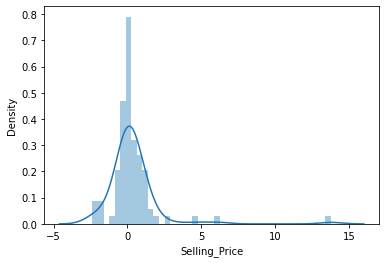

In [78]:
sns.distplot(y_test-predictions)

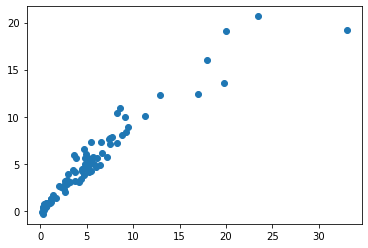

In [79]:
plt.scatter(y_test,predictions)

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8568669682476366
MSE: 3.4731227057809524
RMSE: 1.8636315906801302


Using LGBM Regressor

In [83]:
!pip install lightGBM
from lightgbm import LGBMRegressor

In [84]:
lb=LGBMRegressor()  

In [85]:
lb.fit(X_train,y_train)

LGBMRegressor()

In [86]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [87]:
lb = RandomizedSearchCV(estimator = lb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [88]:
lb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.0s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.0s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.0s
[CV] gamma=0.07800932022121826, learning_rate=0.

[CV]  gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282, total=   0.0s
[CV] gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282, total=   0.0s
[CV] gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282, total=   0.0s
[CV] gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.0453032172664104, learning_rate=0.2155158027999

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018436EB3430>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018436EB36D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018436EB3940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018436EB3A90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018436EB3DC0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
lb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 3,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [90]:
lb.best_score_

-5.776105814158411

In [91]:
predictions=lb.predict(X_test)

C:\Users\Shaddy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

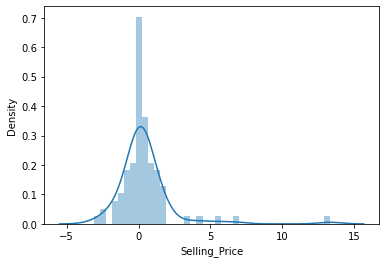

In [92]:
sns.distplot(y_test-predictions)

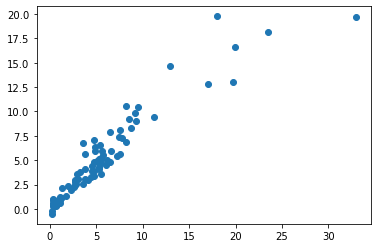

In [93]:
plt.scatter(y_test,predictions)

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0132939743818592
MSE: 3.934934144002637
RMSE: 1.9836668429962319
